In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
file_path = r"D:\CLOUD\MCS-Alles\SABI\Aufträge2.csv"  # Replace with the correct file path
data = pd.read_csv(file_path, sep=";")



# Überprüfen der Spaltennamen in der CSV-Datei
print(data.columns)  # Überprüfen der Spaltennamen


# Data Cleaning and Preprocessing
# Convert non-numeric columns to numeric where necessary
data['MarktsegmentID'] = pd.to_numeric(data['MarktsegmentID'], errors='coerce')
data['AnzahlSchichten'] = pd.to_numeric(data['AnzahlSchichten'], errors='coerce')
data['Termintreue'] = data['Termintreue'].apply(lambda x: 1 if str(x).strip().lower() == 'ja' else 0)

# Drop rows with missing values
data = data.dropna()

# Features and target variable
features = ["MarktsegmentID", "AnzahlSchichten"]  # Define features based on your dataset structure
target = "Termintreue"

# Split data into training and testing sets
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Gradient Boosting Classifier
gbc = GradientBoostingClassifier(random_state=42)
param_grid_gbc = {
    "learning_rate": [0.01, 0.1],
    "n_estimators": [100, 200],
    "max_depth": [5, 7]
}
grid_search_gbc = GridSearchCV(gbc, param_grid_gbc, cv=3, scoring="accuracy")
grid_search_gbc.fit(X_train, y_train)

# Best Gradient Boosting model
best_gbc = grid_search_gbc.best_estimator_
y_pred_gbc = best_gbc.predict(X_test)
print("Gradient Boosting Classifier")
print(f"Accuracy: {accuracy_score(y_test, y_pred_gbc)}")
print(classification_report(y_test, y_pred_gbc))

# Neural Network (MLP Classifier)
mlp = MLPClassifier(random_state=42, max_iter=300)
param_grid_mlp = {
    "hidden_layer_sizes": [(100,), (100, 50)],
    "activation": ["relu", "tanh"],
    "solver": ["adam"],
    "alpha": [0.0001, 0.001]
}
grid_search_mlp = GridSearchCV(mlp, param_grid_mlp, cv=3, scoring="accuracy")
grid_search_mlp.fit(X_train, y_train)

# Best Neural Network model
best_mlp = grid_search_mlp.best_estimator_
y_pred_mlp = best_mlp.predict(X_test)
print("\nNeural Network Classifier")
print(f"Accuracy: {accuracy_score(y_test, y_pred_mlp)}")
print(classification_report(y_test, y_pred_mlp))


Index(['AuftragID', 'Anlagedatum', 'Gestartetam', 'Wunschtermin', 'Priorität',
       'Beendetam', 'BusinessUnitID', 'VeranlasendeAbteilungID',
       'AuftragsgrundID', 'Wertigkeit', 'Dringlichkeit', 'MarktsegmentID',
       'WiederholauftragJa/Nein', 'UrsprungfürWiederholung',
       'AusführendeAbteilungID', 'KundeID', 'AnzahlSchichten',
       'InBearbeitungab', 'Eingeplantam', 'WarteaufRückmeldungab',
       'WarteaufMaterialab', 'WarteaufVorlageab', 'VerwendungID',
       'Bearbeitungszeit', 'Termintreue'],
      dtype='object')
Gradient Boosting Classifier
Accuracy: 0.7207093096896771
              precision    recall  f1-score   support

           0       0.72      0.98      0.83      1117
           1       0.66      0.10      0.17       462

    accuracy                           0.72      1579
   macro avg       0.69      0.54      0.50      1579
weighted avg       0.70      0.72      0.64      1579


Neural Network Classifier
Accuracy: 0.7010766307789741
              prec

In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, f1_score
from sklearn.pipeline import Pipeline

# Klassifikatoren
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neural_network import MLPClassifier

# Optional: Bei stark unbalancierten Daten
# from imblearn.over_sampling import SMOTE

# ---------------------------------------------------------------------------
# 1. Daten laden und Grund-Preprocessing
# ---------------------------------------------------------------------------

file_path = r"D:\CLOUD\MCS-Alles\SABI\Aufträge2.csv"  # Datei anpassen
data = pd.read_csv(file_path, sep=";")

print("Spaltennamen:", data.columns)

# Beispiel: Typkonversion
data['MarktsegmentID'] = pd.to_numeric(data['MarktsegmentID'], errors='coerce')
data['AnzahlSchichten'] = pd.to_numeric(data['AnzahlSchichten'], errors='coerce')

# Ziel-Spalte in 0/1 konvertieren
data['Termintreue'] = data['Termintreue'].apply(lambda x: 1 if str(x).strip().lower() == 'ja' else 0)

# Fehlende Werte untersuchen
print("Anzahl fehlender Werte pro Spalte:\n", data.isna().sum())

# Beispiel-Strategie: Zeilen mit fehlenden Werten löschen
data = data.dropna()

# Features definieren (ggf. mehr hinzufügen)
features = ["MarktsegmentID", "AnzahlSchichten"]
target = "Termintreue"

# Split in Training / Test
X = data[features]
y = data[target]

# Optional: Falls das Verhältnis der Klassen stark unbalanced ist:
# print("Klassenverteilung:\n", y.value_counts())

# ---------------------------------------------------------------------------
# 2. Modelle definieren: Pipeline mit Skalierung + Klassifikator
# ---------------------------------------------------------------------------
# Wir bauen eine Pipeline, um Standardisierung und Modell zu kombinieren.

pipeline_gbc = Pipeline([
    ('scaler', StandardScaler()),                # Schritt 1: Skalierung
    ('clf', GradientBoostingClassifier())        # Schritt 2: Klassifikator
])

param_grid_gbc = {
    "clf__learning_rate": [0.01, 0.1, 0.2],
    "clf__n_estimators": [100, 200],
    "clf__max_depth": [3, 5, 7]
}

# Für das MLP definieren wir eine eigene Pipeline
pipeline_mlp = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', MLPClassifier(max_iter=500, random_state=42))
])

param_grid_mlp = {
    "clf__hidden_layer_sizes": [(100,), (100, 50)],
    "clf__activation": ["relu", "tanh"],
    "clf__alpha": [0.0001, 0.001, 0.01],
    "clf__solver": ["adam"]
}

# Optional: ein weiterer Klassifikator, z. B. RandomForest
pipeline_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', RandomForestClassifier(random_state=42))
])

param_grid_rf = {
    "clf__n_estimators": [100, 200],
    "clf__max_depth": [None, 5, 10],
    "clf__min_samples_split": [2, 5]
}

# ---------------------------------------------------------------------------
# 3. Grid Search mit Cross-Validation
# ---------------------------------------------------------------------------
# StratifiedKFold sorgt dafür, dass im Training-Test-Split das Klassenverhältnis konstant bleibt.
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Gradient Boosting
grid_search_gbc = GridSearchCV(
    estimator=pipeline_gbc,
    param_grid=param_grid_gbc,
    scoring="accuracy",       # alternativ "f1", "precision", "recall", "roc_auc" usw.
    cv=cv,
    n_jobs=-1
)

grid_search_gbc.fit(X, y)
print("Best Score GBC:", grid_search_gbc.best_score_)
print("Best Params GBC:", grid_search_gbc.best_params_)

# MLP
grid_search_mlp = GridSearchCV(
    estimator=pipeline_mlp,
    param_grid=param_grid_mlp,
    scoring="accuracy",
    cv=cv,
    n_jobs=-1
)

grid_search_mlp.fit(X, y)
print("Best Score MLP:", grid_search_mlp.best_score_)
print("Best Params MLP:", grid_search_mlp.best_params_)

# RandomForest (optional)
grid_search_rf = GridSearchCV(
    estimator=pipeline_rf,
    param_grid=param_grid_rf,
    scoring="accuracy",
    cv=cv,
    n_jobs=-1
)

grid_search_rf.fit(X, y)
print("Best Score RF:", grid_search_rf.best_score_)
print("Best Params RF:", grid_search_rf.best_params_)

# ---------------------------------------------------------------------------
# 4. finales Modell evaluieren auf einem separaten Testset
# ---------------------------------------------------------------------------
# Für ein echtes Hold-out-Set sollten Sie vorher ein train_test_split durchführen.
# In diesem Beispiel ziehen wir das final beste Modell aus dem GridSearchCV.

# Beispiel: Wir nehmen das beste GBC-Modell
best_gbc = grid_search_gbc.best_estimator_

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

best_gbc.fit(X_train, y_train)
y_pred_gbc = best_gbc.predict(X_test)

accuracy_gbc = accuracy_score(y_test, y_pred_gbc)
f1_gbc = f1_score(y_test, y_pred_gbc)
print("\nGradient Boosting (Bestes Modell)")
print("Accuracy:", accuracy_gbc)
print("F1-Score:", f1_gbc)
print(classification_report(y_test, y_pred_gbc))

# Als Vergleich: Bestes MLP
best_mlp = grid_search_mlp.best_estimator_
best_mlp.fit(X_train, y_train)
y_pred_mlp = best_mlp.predict(X_test)

accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
f1_mlp = f1_score(y_test, y_pred_mlp)
print("\nMLP (Bestes Modell)")
print("Accuracy:", accuracy_mlp)
print("F1-Score:", f1_mlp)
print(classification_report(y_test, y_pred_mlp))


Spaltennamen: Index(['AuftragID', 'Anlagedatum', 'Gestartetam', 'Wunschtermin', 'Priorität',
       'Beendetam', 'BusinessUnitID', 'VeranlasendeAbteilungID',
       'AuftragsgrundID', 'Wertigkeit', 'Dringlichkeit', 'MarktsegmentID',
       'WiederholauftragJa/Nein', 'UrsprungfürWiederholung',
       'AusführendeAbteilungID', 'KundeID', 'AnzahlSchichten',
       'InBearbeitungab', 'Eingeplantam', 'WarteaufRückmeldungab',
       'WarteaufMaterialab', 'WarteaufVorlageab', 'VerwendungID',
       'Bearbeitungszeit', 'Termintreue'],
      dtype='object')
Anzahl fehlender Werte pro Spalte:
 AuftragID                     0
Anlagedatum                   0
Gestartetam                   0
Wunschtermin                  0
Priorität                     0
Beendetam                     0
BusinessUnitID                0
VeranlasendeAbteilungID       0
AuftragsgrundID               0
Wertigkeit                    0
Dringlichkeit                 0
MarktsegmentID                0
WiederholauftragJa/Nein  

In [3]:
import optuna
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier

# Unser X, y stammt aus dem oben definierten Datensatz
# X_train, y_train stehen bereit

def objective(trial):
    # Parameter vorschlagen lassen
    learning_rate = trial.suggest_float("learning_rate", 1e-4, 0.2, log=True)
    n_estimators = trial.suggest_int("n_estimators", 50, 300)
    max_depth = trial.suggest_int("max_depth", 2, 10)
    subsample = trial.suggest_float("subsample", 0.5, 1.0)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 10)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 5)
    
    model = GradientBoostingClassifier(
        learning_rate=learning_rate,
        n_estimators=n_estimators,
        max_depth=max_depth,
        subsample=subsample,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )
    
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(model, X_train, y_train, scoring="accuracy", cv=cv, n_jobs=-1)
    
    return scores.mean()

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)  # Anzahl der Versuche anpassen

print("Optuna Best Trial:", study.best_trial)
print("Optuna Best Params:", study.best_params)

# Bestes Modell trainieren & testen
best_params = study.best_params
best_model = GradientBoostingClassifier(**best_params, random_state=42)
best_model.fit(X_train, y_train)

y_pred_optuna = best_model.predict(X_test)
print("Optuna-Accuracy:", accuracy_score(y_test, y_pred_optuna))
print("Optuna-F1:", f1_score(y_test, y_pred_optuna))
print(classification_report(y_test, y_pred_optuna))


d:\CLOUD\MCS-Alles\SABI\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2025-02-27 21:14:50,268] A new study created in memory with name: no-name-6cc07a17-2d20-4793-b638-0efe8e9d4b1a
[I 2025-02-27 21:14:50,752] Trial 0 finished with value: 0.721931908155186 and parameters: {'learning_rate': 0.1498492238200588, 'n_estimators': 197, 'max_depth': 6, 'subsample': 0.8697859499185204, 'min_samples_split': 4, 'min_samples_leaf': 4}. Best is trial 0 with value: 0.721931908155186.
[I 2025-02-27 21:14:51,434] Trial 1 finished with value: 0.7121140142517814 and parameters: {'learning_rate': 0.000664084803161203, 'n_estimators': 292, 'max_depth': 6, 'subsample': 0.9267468600602371, 'min_samples_split': 7, 'min_samples_leaf': 5}. Best is trial 0 with value: 0.721931908155186.
[I 2025-02-27 21:14:51,595] Trial 2 finishe

Optuna Best Trial: FrozenTrial(number=14, state=1, values=[0.7246239113222487], datetime_start=datetime.datetime(2025, 2, 27, 21, 14, 56, 93966), datetime_complete=datetime.datetime(2025, 2, 27, 21, 14, 56, 321780), params={'learning_rate': 0.03552500943868826, 'n_estimators': 110, 'max_depth': 4, 'subsample': 0.9309133715434916, 'min_samples_split': 4, 'min_samples_leaf': 3}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'learning_rate': FloatDistribution(high=0.2, log=True, low=0.0001, step=None), 'n_estimators': IntDistribution(high=300, log=False, low=50, step=1), 'max_depth': IntDistribution(high=10, log=False, low=2, step=1), 'subsample': FloatDistribution(high=1.0, log=False, low=0.5, step=None), 'min_samples_split': IntDistribution(high=10, log=False, low=2, step=1), 'min_samples_leaf': IntDistribution(high=5, log=False, low=1, step=1)}, trial_id=14, value=None)
Optuna Best Params: {'learning_rate': 0.03552500943868826, 'n_estimators': 110, 'max_depth':

In [4]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, f1_score
from sklearn.neural_network import MLPClassifier

# ---------------------------------------------------------------------------
# 1. Daten laden und aufteilen (vereinfacht)
# ---------------------------------------------------------------------------
file_path = r"D:\CLOUD\MCS-Alles\SABI\Aufträge2.csv"
data = pd.read_csv(file_path, sep=";")

# Beispiel: Numerische Umwandlungen
data['MarktsegmentID'] = pd.to_numeric(data['MarktsegmentID'], errors='coerce')
data['AnzahlSchichten'] = pd.to_numeric(data['AnzahlSchichten'], errors='coerce')
data['Termintreue'] = data['Termintreue'].apply(lambda x: 1 if str(x).strip().lower() == 'ja' else 0)

# NaNs rausschmeißen, nur als Beispiel
data = data.dropna()

features = ["MarktsegmentID", "AnzahlSchichten"]
target = "Termintreue"

X = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# ---------------------------------------------------------------------------
# 2. Pipeline: StandardScaler + MLPClassifier
# ---------------------------------------------------------------------------
pipeline_mlp = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', MLPClassifier(random_state=42))
])

# ---------------------------------------------------------------------------
# 3. Parameter-Grid erweitern
# ---------------------------------------------------------------------------
param_grid_mlp = {
    "clf__hidden_layer_sizes": [(100,), (100,50), (200,), (200,100)],
    "clf__activation": ["relu", "tanh"],
    "clf__solver": ["adam"],  # 'lbfgs', 'sgd' sind weitere Optionen
    "clf__alpha": [0.0001, 0.001, 0.01],
    "clf__learning_rate_init": [0.001, 0.01],
    "clf__max_iter": [500], 
    "clf__early_stopping": [True],  # Early Stopping aktivieren
    # "clf__class_weight": [None, "balanced"] # Optional bei Klassenungleichheit
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search_mlp = GridSearchCV(
    estimator=pipeline_mlp,
    param_grid=param_grid_mlp,
    scoring="accuracy",  # oder "f1", "precision", "recall", ...
    cv=cv,
    n_jobs=-1
)

grid_search_mlp.fit(X_train, y_train)

print("Best Score MLP:", grid_search_mlp.best_score_)
print("Best Params MLP:", grid_search_mlp.best_params_)

# ---------------------------------------------------------------------------
# 4. Evaluierung mit Custom-Threshold
# ---------------------------------------------------------------------------
best_mlp = grid_search_mlp.best_estimator_
best_mlp.fit(X_train, y_train)  # bestes Modell auf gesamten Trainingsdaten

# Standard-Vorhersage (Threshold=0.5)
y_pred = best_mlp.predict(X_test)
print("\nStandard Threshold (0.5)")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Alternative: Custom Threshold
import numpy as np

y_proba = best_mlp.predict_proba(X_test)[:, 1]
threshold = 0.7  # hier spielen!
y_pred_custom = np.where(y_proba >= threshold, 1, 0)

print(f"\nCustom Threshold ({threshold})")
print("Accuracy:", accuracy_score(y_test, y_pred_custom))
print("F1:", f1_score(y_test, y_pred_custom))
print(classification_report(y_test, y_pred_custom))


Best Score MLP: 0.7121140142517814
Best Params MLP: {'clf__activation': 'relu', 'clf__alpha': 0.0001, 'clf__early_stopping': True, 'clf__hidden_layer_sizes': (100,), 'clf__learning_rate_init': 0.001, 'clf__max_iter': 500, 'clf__solver': 'adam'}

Standard Threshold (0.5)
Accuracy: 0.7118429385687144
F1: 0.0
              precision    recall  f1-score   support

           0       0.71      1.00      0.83      1124
           1       0.00      0.00      0.00       455

    accuracy                           0.71      1579
   macro avg       0.36      0.50      0.42      1579
weighted avg       0.51      0.71      0.59      1579


Custom Threshold (0.7)
Accuracy: 0.7118429385687144
F1: 0.0
              precision    recall  f1-score   support

           0       0.71      1.00      0.83      1124
           1       0.00      0.00      0.00       455

    accuracy                           0.71      1579
   macro avg       0.36      0.50      0.42      1579
weighted avg       0.51      0.7

d:\CLOUD\MCS-Alles\SABI\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\CLOUD\MCS-Alles\SABI\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\CLOUD\MCS-Alles\SABI\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\CLOUD\MCS-Alles\SABI\venv

In [5]:
import pandas as pd
import numpy as np

# Wichtig: imblearn muss installiert sein, z.B. via "pip install imblearn"
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier

# --------------------------------------------------------------------------
# 1) Daten laden
# --------------------------------------------------------------------------
file_path = r"D:\CLOUD\MCS-Alles\SABI\Aufträge2.csv"  # Pfad anpassen
data = pd.read_csv(file_path, sep=";")

# Annahme: 'Termintreue' ist 0/1-kodiert oder 'Ja'/'Nein'.
# Wenn noch nicht, bitte entsprechend umwandeln:
data['Termintreue'] = data['Termintreue'].apply(lambda x: 1 if str(x).strip().lower() == 'ja' else 0)

# Hier beispielhafte Features:
data['MarktsegmentID']   = pd.to_numeric(data['MarktsegmentID'], errors='coerce')
data['AnzahlSchichten']  = pd.to_numeric(data['AnzahlSchichten'], errors='coerce')

# Fehlende Werte entfernen
data = data.dropna(subset=['MarktsegmentID', 'AnzahlSchichten', 'Termintreue'])

X = data[['MarktsegmentID', 'AnzahlSchichten']]
y = data['Termintreue']

print("Klassenverteilung im Gesamtdatensatz:\n", y.value_counts())

# --------------------------------------------------------------------------
# 2) Trainings- und Test-Set bilden
# --------------------------------------------------------------------------
# stratify=y sorgt dafür, dass die Klassenverteilung in beiden Splits ähnlich bleibt
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("\nKlassenverteilung im Training:\n", y_train.value_counts())
print("Klassenverteilung im Test:\n", y_test.value_counts())

# --------------------------------------------------------------------------
# 3) SMOTE nur auf das Trainingsset anwenden (zur Bekämpfung von Klassen-Ungleichgewicht)
# --------------------------------------------------------------------------
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("\nKlassenverteilung NACH SMOTE im Training:\n", pd.Series(y_train_res).value_counts())

# --------------------------------------------------------------------------
# 4) Pipeline definieren (StandardScaler + MLPClassifier)
# --------------------------------------------------------------------------
pipeline_mlp = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', MLPClassifier(random_state=42))
])

# --------------------------------------------------------------------------
# 5) Hyperparameter-Raum für GridSearchCV
# --------------------------------------------------------------------------
# ACHTUNG: MLPClassifier in scikit-learn kennt KEIN "class_weight".
# Deshalb NICHT clf__class_weight verwenden!
param_grid_mlp = {
    "clf__hidden_layer_sizes": [(100,), (100, 50)],
    "clf__activation": ["relu", "tanh"],
    "clf__solver": ["adam"],       # oder "sgd", "lbfgs"
    "clf__alpha": [0.0001, 0.001],  # Regularisierung
    "clf__learning_rate_init": [0.001, 0.01],
    "clf__max_iter": [500],
    "clf__early_stopping": [True]  # Early Stopping kann helfen
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search_mlp = GridSearchCV(
    estimator=pipeline_mlp,
    param_grid=param_grid_mlp,
    scoring="accuracy",  # oder "f1_macro", "precision_macro", etc.
    cv=cv,
    n_jobs=-1
)

# --------------------------------------------------------------------------
# 6) Training via GridSearchCV (auf den SMOTE-resampleten Daten)
# --------------------------------------------------------------------------
grid_search_mlp.fit(X_train_res, y_train_res)

print("\nBestes Ergebnis (CV-Score):", grid_search_mlp.best_score_)
print("Beste Hyperparameter:", grid_search_mlp.best_params_)

# --------------------------------------------------------------------------
# 7) Finales Modell & Test-Evaluation
# --------------------------------------------------------------------------
best_mlp = grid_search_mlp.best_estimator_
best_mlp.fit(X_train_res, y_train_res)  # trainiert auf SMOTE-Daten

# Vorhersage auf dem originalen Testset (ohne SMOTE)
y_pred = best_mlp.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"\nErgebnisse auf dem Testset:")
print(f"Accuracy: {accuracy:.3f}")
print(f"F1-Score: {f1:.3f}\n")

print(classification_report(y_test, y_pred))


Klassenverteilung im Gesamtdatensatz:
 Termintreue
0    5621
1    2273
Name: count, dtype: int64

Klassenverteilung im Training:
 Termintreue
0    4497
1    1818
Name: count, dtype: int64
Klassenverteilung im Test:
 Termintreue
0    1124
1     455
Name: count, dtype: int64

Klassenverteilung NACH SMOTE im Training:
 Termintreue
0    4497
1    4497
Name: count, dtype: int64

Bestes Ergebnis (CV-Score): 0.5500342236850159
Beste Hyperparameter: {'clf__activation': 'relu', 'clf__alpha': 0.0001, 'clf__early_stopping': True, 'clf__hidden_layer_sizes': (100, 50), 'clf__learning_rate_init': 0.01, 'clf__max_iter': 500, 'clf__solver': 'adam'}

Ergebnisse auf dem Testset:
Accuracy: 0.514
F1-Score: 0.430

              precision    recall  f1-score   support

           0       0.76      0.46      0.58      1124
           1       0.32      0.64      0.43       455

    accuracy                           0.51      1579
   macro avg       0.54      0.55      0.50      1579
weighted avg       0.63  

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

# 1. Datensatz laden
file_path = r"D:\CLOUD\MCS-Alles\SABI\Aufträge2.csv"  # Pfad anpassen
data = pd.read_csv(file_path, sep=";")

# print("Spalten im Datensatz:")
# print(data.columns)

# 2. Datensatzvorbereitung
data['MarktsegmentID'] = pd.to_numeric(data['MarktsegmentID'], errors='coerce')
data['AnzahlSchichten'] = pd.to_numeric(data['AnzahlSchichten'], errors='coerce')
data['Termintreue'] = data['Termintreue'].apply(lambda x: 1 if str(x).strip().lower() == 'ja' else 0)

# Zeilen mit fehlenden Werten droppen
data = data.dropna()

# Features und Ziel definieren
features = ["MarktsegmentID", "AnzahlSchichten"]
target = "Termintreue"
X = data[features]
y = data[target]

# Train-/Test-Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ----------------------------------------------------------------------------
# Helper-Funktion, um ein Modell auszuwerten und als Tabellen darzustellen
# ----------------------------------------------------------------------------
def evaluate_and_show_results(model_name, grid_search, X_test, y_test):
    """
    Erstellt zwei Tabellen:
      1) Modellkonfiguration & Performance
      2) Klassifikationsreport (Precision, Recall, F1 etc.) je Klasse
    """
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    
    # Genauigkeit auf dem Testset
    test_accuracy = accuracy_score(y_test, y_pred)
    
    # Classification Report als dict (Precision, Recall, F1, Support)
    report_dict = classification_report(y_test, y_pred, output_dict=True)
    # In DataFrame umwandeln
    report_df = pd.DataFrame(report_dict).transpose()
    
    # Tabelle 1: Modell-Infos
    # --------------------------------------------------
    # best_params_ ist ein Dict. Wir wandeln es in eine flache Form um
    params_dict = grid_search.best_params_.copy()
    params_dict.update({
        "cv_best_score": grid_search.best_score_,
        "test_accuracy": test_accuracy
    })
    
    # 1 Zeile: {param1: val1, param2: val2, cv_best_score:..., test_accuracy: ...}
    config_df = pd.DataFrame([params_dict])
    
    print(f"\n{'='*60}")
    print(f"{model_name.upper()} - BESTE KONFIGURATION & PERFORMANCE")
    print(config_df)
    
    # Tabelle 2: Classification-Report
    # --------------------------------------------------
    print(f"\n{model_name.upper()} - KLASSIFIKATIONSMETRIKEN (TESTSET)")
    print(report_df)
    print('='*60)

# ----------------------------------------------------------------------------
# 3. Gradient Boosting GridSearch
# ----------------------------------------------------------------------------
gbc = GradientBoostingClassifier(random_state=42)
param_grid_gbc = {
    "learning_rate": [0.01, 0.1],
    "n_estimators": [100, 200],
    "max_depth": [5, 7]
}
grid_search_gbc = GridSearchCV(
    gbc, 
    param_grid_gbc, 
    cv=3, 
    scoring="accuracy",
    n_jobs=-1
)
grid_search_gbc.fit(X_train, y_train)

# Auswertung
evaluate_and_show_results("Gradient Boosting", grid_search_gbc, X_test, y_test)


# ----------------------------------------------------------------------------
# 4. MLPClassifier GridSearch
# ----------------------------------------------------------------------------
mlp = MLPClassifier(random_state=42, max_iter=300)
param_grid_mlp = {
    "hidden_layer_sizes": [(100,), (100, 50)],
    "activation": ["relu", "tanh"],
    "solver": ["adam"],
    "alpha": [0.0001, 0.001]
}
grid_search_mlp = GridSearchCV(
    mlp, 
    param_grid_mlp, 
    cv=3, 
    scoring="accuracy",
    n_jobs=-1
)
grid_search_mlp.fit(X_train, y_train)

# Auswertung
evaluate_and_show_results("Neural Network (MLP)", grid_search_mlp, X_test, y_test)



GRADIENT BOOSTING - BESTE KONFIGURATION & PERFORMANCE
   learning_rate  max_depth  n_estimators  cv_best_score  test_accuracy
0           0.01          5           100       0.727949       0.720709

GRADIENT BOOSTING - KLASSIFIKATIONSMETRIKEN (TESTSET)
              precision    recall  f1-score      support
0              0.723545  0.979409  0.832256  1117.000000
1              0.656716  0.095238  0.166352   462.000000
accuracy       0.720709  0.720709  0.720709     0.720709
macro avg      0.690131  0.537324  0.499304  1579.000000
weighted avg   0.703992  0.720709  0.637419  1579.000000

NEURAL NETWORK (MLP) - BESTE KONFIGURATION & PERFORMANCE
  activation   alpha hidden_layer_sizes solver  cv_best_score  test_accuracy
0       tanh  0.0001          (100, 50)   adam       0.722407       0.701077

NEURAL NETWORK (MLP) - KLASSIFIKATIONSMETRIKEN (TESTSET)
              precision    recall  f1-score      support
0              0.716008  0.957028  0.819157  1117.000000
1              0.441

In [7]:
# Beispiel: pro Tag zählen, wie viele Aufträge neu angelegt wurden
df=data
daily_counts = df.groupby("Anlagedatum")["s"].count().reset_index()
daily_counts.columns = ["Anlagedatum", "AuftragseingangCount"]


KeyError: 'Column not found: s'

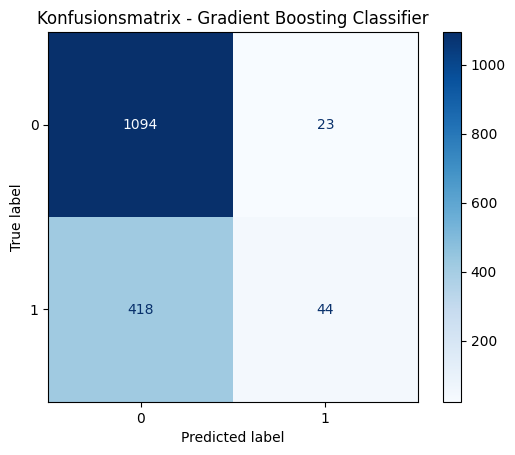

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import numpy as np
import pandas as pd

# Falls du die Modelle schon trainiert hast und z. B. die besten gefundenen Modelle besitzt
best_gbc = grid_search_gbc.best_estimator_
best_mlp = grid_search_mlp.best_estimator_

# Vorhersagen auf den Testdaten
y_pred_gbc = best_gbc.predict(X_test)
y_pred_mlp = best_mlp.predict(X_test)

cm_gbc = confusion_matrix(y_test, y_pred_gbc)
disp_gbc = ConfusionMatrixDisplay(cm_gbc, display_labels=[0, 1])
disp_gbc.plot(cmap=plt.cm.Blues)
plt.title('Konfusionsmatrix - Gradient Boosting Classifier')
plt.show()



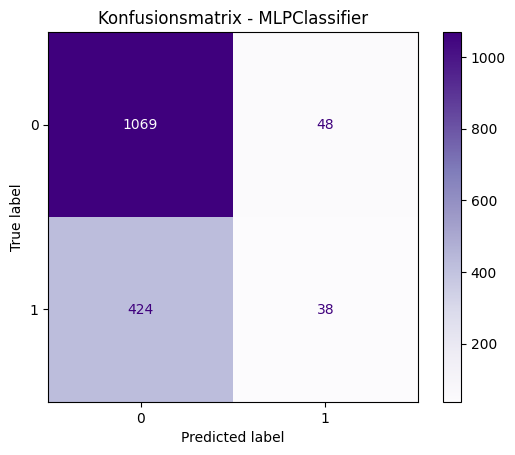

In [9]:
cm_mlp = confusion_matrix(y_test, y_pred_mlp)
disp_mlp = ConfusionMatrixDisplay(cm_mlp, display_labels=[0, 1])
disp_mlp.plot(cmap=plt.cm.Purples)
plt.title('Konfusionsmatrix - MLPClassifier')
plt.show()


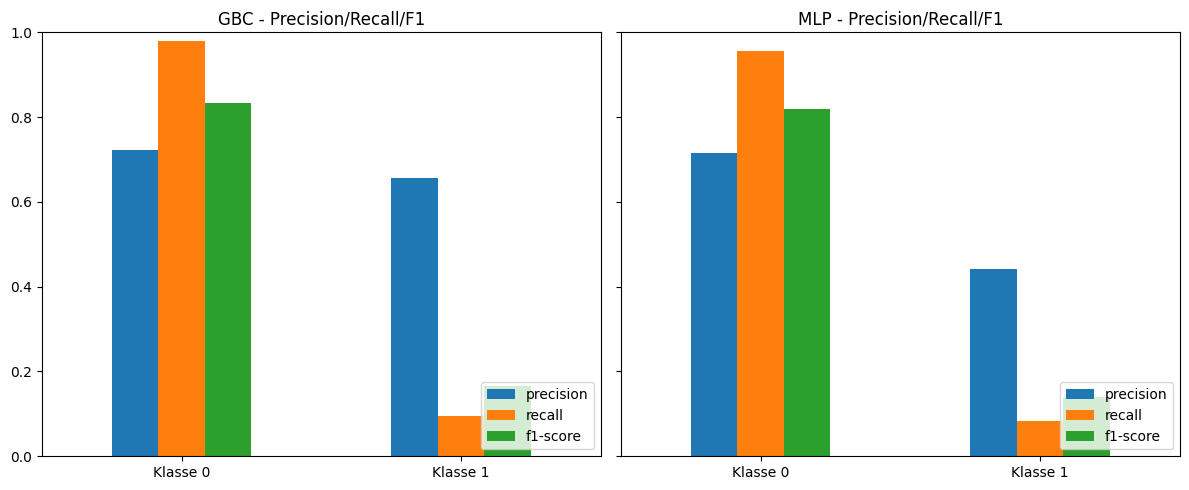

In [10]:
# Classification Report als DataFrame für GBC
report_dict_gbc = classification_report(y_test, y_pred_gbc, output_dict=True)
report_df_gbc = pd.DataFrame(report_dict_gbc).transpose()

# Classification Report als DataFrame für MLP
report_dict_mlp = classification_report(y_test, y_pred_mlp, output_dict=True)
report_df_mlp = pd.DataFrame(report_dict_mlp).transpose()

metrics = ["precision", "recall", "f1-score"]
classes = ["0", "1"]  # Klassen in String-Form im Report-DataFrame

fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# --- Plot für GBC ---
report_gbc_filtered = report_df_gbc.loc[classes, metrics]
report_gbc_filtered.plot.bar(ax=axes[0])
axes[0].set_ylim([0, 1])  # Wertebereich für Metriken
axes[0].set_title("GBC - Precision/Recall/F1")
axes[0].set_xticklabels(["Klasse 0", "Klasse 1"], rotation=0)
axes[0].legend(loc='lower right')

# --- Plot für MLP ---
report_mlp_filtered = report_df_mlp.loc[classes, metrics]
report_mlp_filtered.plot.bar(ax=axes[1])
axes[1].set_ylim([0, 1])
axes[1].set_title("MLP - Precision/Recall/F1")
axes[1].set_xticklabels(["Klasse 0", "Klasse 1"], rotation=0)
axes[1].legend(loc='lower right')

plt.tight_layout()
plt.show()



C:\Users\Eugen Lieder\AppData\Local\Temp\ipykernel_38436\3961396966.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=fi_df, x='Importance', y='Feature', palette='Blues_r')


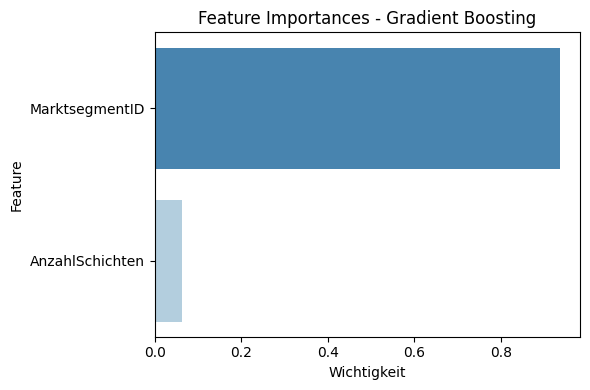

In [11]:
# Feature-Importances vom besten GBC-Modell:
importances = best_gbc.feature_importances_
feature_names = X_train.columns  # Spaltennamen deiner Features

# Als DataFrame
fi_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values('Importance', ascending=False)

# Plot
plt.figure(figsize=(6, 4))
sns.barplot(data=fi_df, x='Importance', y='Feature', palette='Blues_r')
plt.title('Feature Importances - Gradient Boosting')
plt.xlabel('Wichtigkeit')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


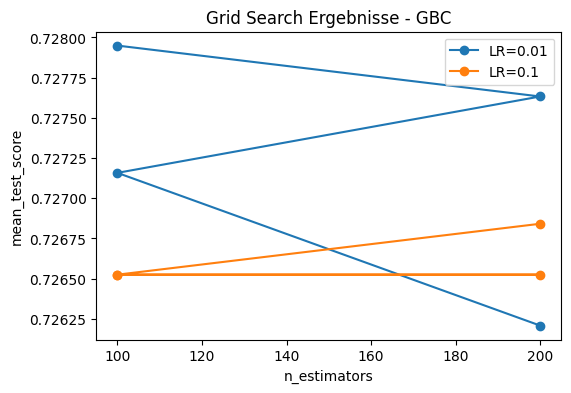

In [12]:
results_gbc = pd.DataFrame(grid_search_gbc.cv_results_)
results_mlp = pd.DataFrame(grid_search_mlp.cv_results_)

# Beispiel: Plotten von n_estimators vs. mean_test_score für verschiedene learning_rates
plt.figure(figsize=(6,4))

for lr in results_gbc['param_learning_rate'].unique():
    subset = results_gbc[results_gbc['param_learning_rate'] == lr]
    plt.plot(
        subset['param_n_estimators'],
        subset['mean_test_score'],
        marker='o',
        label=f'LR={lr}'
    )
    
plt.title('Grid Search Ergebnisse - GBC')
plt.xlabel('n_estimators')
plt.ylabel('mean_test_score')
plt.legend()
plt.show()


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Beispiel: CSV-Datei einlesen
# df = pd.read_csv("data.csv")  # Pfad anpassen


In [14]:
# ------------------------------------------------------------
# 1) Filtern nach AusführendeAbteilungID
# ------------------------------------------------------------
print("\n=== 1) FILTERN NACH AUSFÜHRENDEABTEILUNGID ===")
selected_abteilung_id = 345  # Beispielwert
print(f"Filter auf AusführendeAbteilungID = {selected_abteilung_id}")

# Überprüfen, ob die Spalte 'AusführendeAbteilungID' vorhanden ist
if "AusführendeAbteilungID" not in data.columns:
    raise ValueError("Spalte 'AusführendeAbteilungID' nicht vorhanden!")

# Filtern des Datensatzes
data = data[data["AusführendeAbteilungID"] == selected_abteilung_id]

# Prüfen, ob nach dem Filtern noch Daten vorhanden sind
if data.empty:
    raise ValueError(f"Keine Daten für AusführendeAbteilungID = {selected_abteilung_id} vorhanden!")

print(f"Nach Filter: {data.shape[0]} Zeilen, {data.shape[1]} Spalten.")



=== 1) FILTERN NACH AUSFÜHRENDEABTEILUNGID ===
Filter auf AusführendeAbteilungID = 345
Nach Filter: 2665 Zeilen, 25 Spalten.


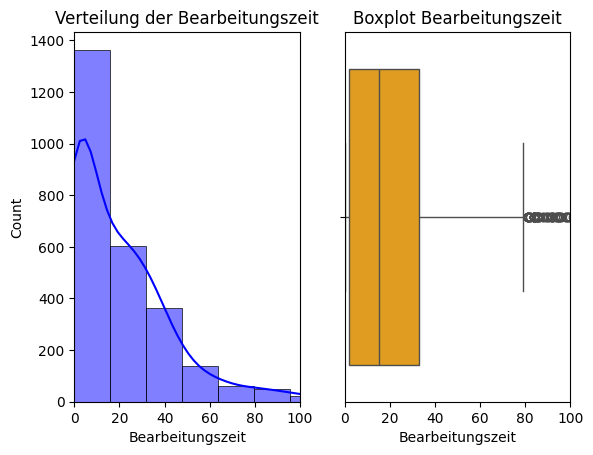

In [16]:
plt.subplot(1, 2, 1)
sns.histplot(data=data, x='Bearbeitungszeit', bins=30, kde=True, color='blue')
plt.title('Verteilung der Bearbeitungszeit')

# z. B. Begrenze x-Achse auf Werte zwischen 0 und 1000
plt.xlim(0, 100)

plt.subplot(1, 2, 2)
sns.boxplot(data=data, x='Bearbeitungszeit', color='orange')
plt.title('Boxplot Bearbeitungszeit')

# z. B. Begrenze x-Achse auf Werte zwischen 0 und 1000
plt.xlim(0, 100)
plt.show()


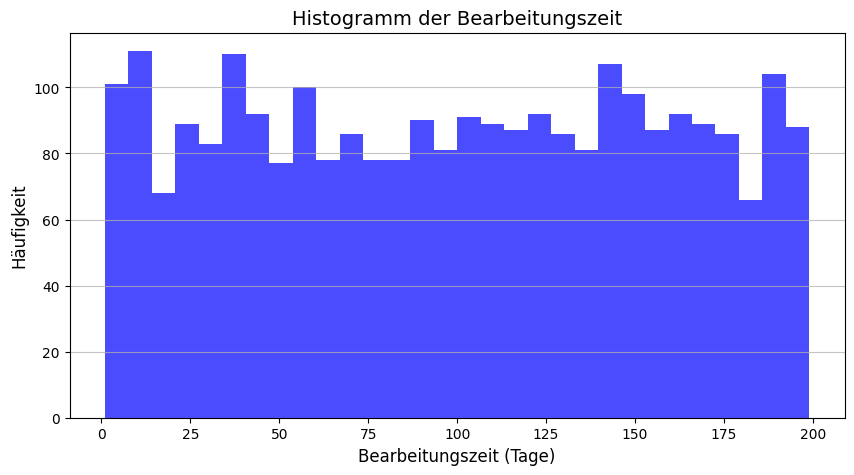

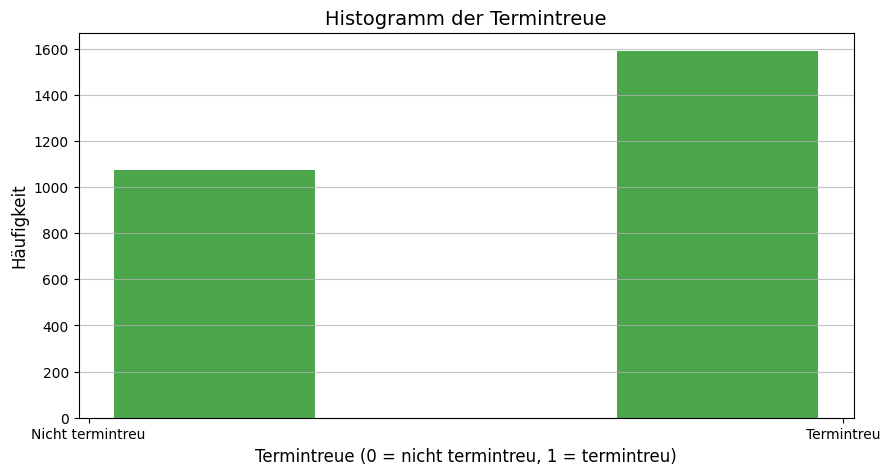

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Beispiel-Daten
# Ersetze dies durch deine echten Daten
np.random.seed(42)
data = pd.DataFrame({
    "Bearbeitungszeit": np.random.randint(1, 200, 2665),
    "Termintreue": np.random.choice([0, 1], size=2665, p=[0.4, 0.6])  # 40% nicht termintreu, 60% termintreu
})

# Histogramm für Bearbeitungszeit
plt.figure(figsize=(10, 5))
plt.hist(data["Bearbeitungszeit"], bins=30, color='blue', alpha=0.7)
plt.title("Histogramm der Bearbeitungszeit", fontsize=14)
plt.xlabel("Bearbeitungszeit (Tage)", fontsize=12)
plt.ylabel("Häufigkeit", fontsize=12)
plt.grid(axis='y', alpha=0.75)
plt.show()

# Histogramm für Termintreue
plt.figure(figsize=(10, 5))
plt.hist(data["Termintreue"], bins=3, color='green', alpha=0.7, rwidth=0.8)
plt.title("Histogramm der Termintreue", fontsize=14)
plt.xlabel("Termintreue (0 = nicht termintreu, 1 = termintreu)", fontsize=12)
plt.ylabel("Häufigkeit", fontsize=12)
plt.xticks([0, 1], ['Nicht termintreu', 'Termintreu'])
plt.grid(axis='y', alpha=0.75)
plt.show()


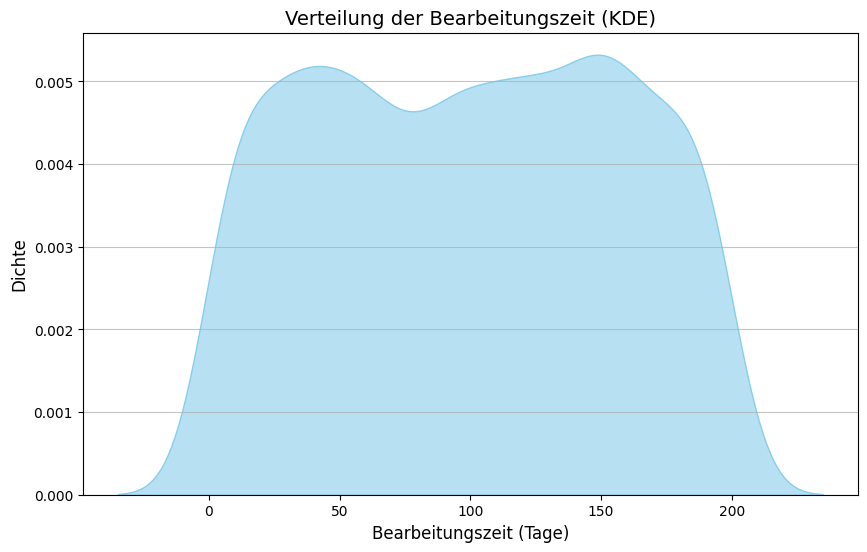

C:\Users\Eugen Lieder\AppData\Local\Temp\ipykernel_38436\3580145308.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=termintreue_counts.index, y=termintreue_counts.values, palette="viridis")


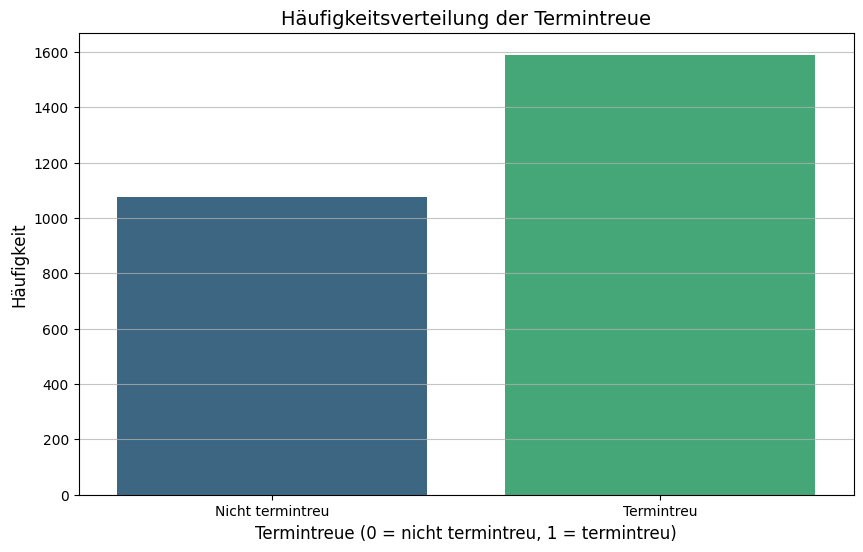

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Beispiel-Daten
# Ersetze dies durch deine echten Daten
np.random.seed(42)
data = pd.DataFrame({
    "Bearbeitungszeit": np.random.randint(1, 200, 2665),
    "Termintreue": np.random.choice([0, 1], size=2665, p=[0.4, 0.6])  # 40% nicht termintreu, 60% termintreu
})

# KDE-Plot für Bearbeitungszeit
plt.figure(figsize=(10, 6))
sns.kdeplot(data=data, x="Bearbeitungszeit", fill=True, color="skyblue", alpha=0.6)
plt.title("Verteilung der Bearbeitungszeit (KDE)", fontsize=14)
plt.xlabel("Bearbeitungszeit (Tage)", fontsize=12)
plt.ylabel("Dichte", fontsize=12)
plt.grid(axis='y', alpha=0.75)
plt.show()

# Gestapelte Barplot für Termintreue
termintreue_counts = data["Termintreue"].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=termintreue_counts.index, y=termintreue_counts.values, palette="viridis")
plt.title("Häufigkeitsverteilung der Termintreue", fontsize=14)
plt.xlabel("Termintreue (0 = nicht termintreu, 1 = termintreu)", fontsize=12)
plt.ylabel("Häufigkeit", fontsize=12)
plt.xticks([0, 1], ['Nicht termintreu', 'Termintreu'])
plt.grid(axis='y', alpha=0.75)
plt.show()


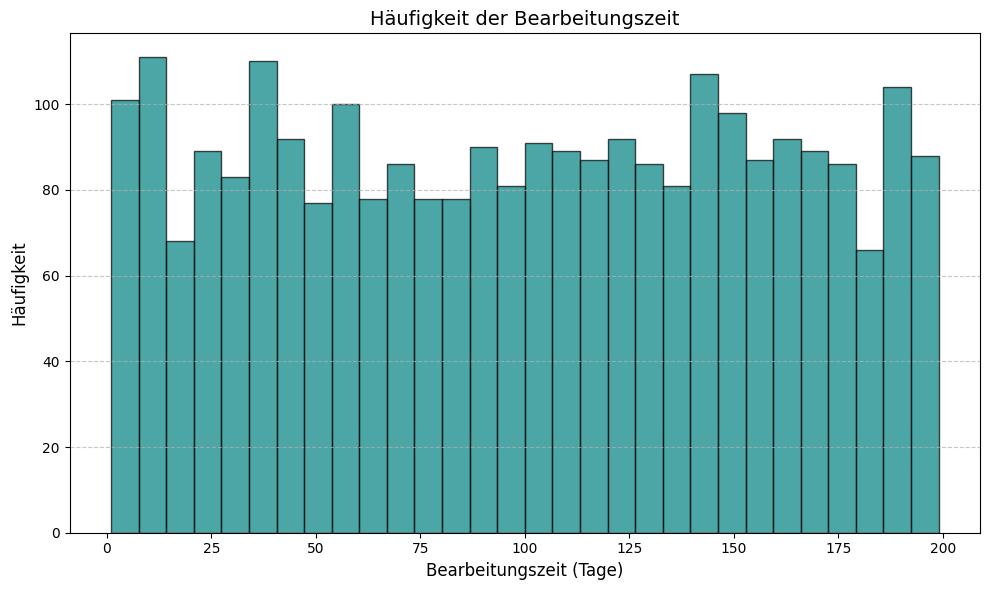

In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Beispiel-Daten
# Ersetze dies durch deine echten Daten
np.random.seed(42)
data = pd.DataFrame({
    "Bearbeitungszeit": np.random.randint(1, 200, 2665)
})

# Histogramm für die Verteilung der Bearbeitungszeit
plt.figure(figsize=(10, 6))
plt.hist(data["Bearbeitungszeit"], bins=30, color='teal', alpha=0.7, edgecolor='black')
plt.title("Häufigkeit der Bearbeitungszeit", fontsize=14)
plt.xlabel("Bearbeitungszeit (Tage)", fontsize=12)
plt.ylabel("Häufigkeit", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [20]:
# ------------------------------------------------------------
# 1) Filtern nach AusführendeAbteilungID
# ------------------------------------------------------------
print("\n=== 1) FILTERN NACH AUSFÜHRENDEABTEILUNGID ===")
selected_abteilung_id = 345  # Beispielwert
print(f"Filter auf AusführendeAbteilungID = {selected_abteilung_id}")

# Überprüfen, ob die Spalte 'AusführendeAbteilungID' vorhanden ist
if "AusführendeAbteilungID" not in data.columns:
    raise ValueError("Spalte 'AusführendeAbteilungID' nicht vorhanden!")

# Filtern des Datensatzes
data = data[data["AusführendeAbteilungID"] == selected_abteilung_id]

# Prüfen, ob nach dem Filtern noch Daten vorhanden sind
if data.empty:
    raise ValueError(f"Keine Daten für AusführendeAbteilungID = {selected_abteilung_id} vorhanden!")

print(f"Nach Filter: {data.shape[0]} Zeilen, {data.shape[1]} Spalten.")



=== 1) FILTERN NACH AUSFÜHRENDEABTEILUNGID ===
Filter auf AusführendeAbteilungID = 345


ValueError: Spalte 'AusführendeAbteilungID' nicht vorhanden!

In [21]:
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='Termintreue', palette='viridis')
plt.title('Häufigkeit von Termintreue')
plt.xlabel('Termintreue (0 = Nein, 1 = Ja)')
plt.ylabel('Anzahl')
plt.show()


ValueError: Could not interpret value `Termintreue` for `x`. An entry with this name does not appear in `data`.

<Figure size 600x400 with 0 Axes>

In [22]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=data, x='Priorität', y='Bearbeitungszeit', palette='Set2')
plt.title('Bearbeitungszeit nach Priorität')
plt.xlabel('Priorität')
plt.ylabel('Bearbeitungszeit (Tage)')
# Begrenze die y-Achse, z. B. von 0 bis 1000
plt.ylim(0, 100)
plt.show()


ValueError: Could not interpret value `Priorität` for `x`. An entry with this name does not appear in `data`.

<Figure size 800x500 with 0 Axes>

In [23]:
crosstab_segment = pd.crosstab(data['MarktsegmentID'], data['Termintreue'])
crosstab_segment.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='Accent')
plt.title('Termintreue pro Marktsegment')
plt.xlabel('Marktsegment-ID')
plt.ylabel('Anzahl')
plt.legend(title='Termintreue', labels=['Nicht termintreu (0)', 'Termintreu (1)'])
plt.show()



KeyError: 'MarktsegmentID'

In [24]:
# Angenommen, df hat eine Spalte "Jahr" und "AnzahlAuftragseingänge"
annual_orders = data.groupby('Jahr')['AuftragseingangCount'].sum().reset_index()

plt.figure(figsize=(6, 4))
sns.barplot(data=annual_orders, x='Jahr', y='AnzahlAuftragseingänge', color='teal')
plt.title('Anzahl der Auftragseingänge pro Jahr')
plt.xlabel('Jahr')
plt.ylabel('Auftragseingänge')
plt.show()


KeyError: 'Jahr'

In [25]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=data, x='AusführendeAbteilungID', y='Bearbeitungszeit', palette='husl')
plt.title('Bearbeitungszeiten pro Abteilung')
plt.xlabel('Abteilung ID')
plt.ylabel('Bearbeitungszeit (Tage)')

# Begrenze die y-Achse, z. B. von 0 bis 1000
plt.ylim(0, 100)

plt.show()




ValueError: Could not interpret value `AusführendeAbteilungID` for `x`. An entry with this name does not appear in `data`.

<Figure size 800x500 with 0 Axes>

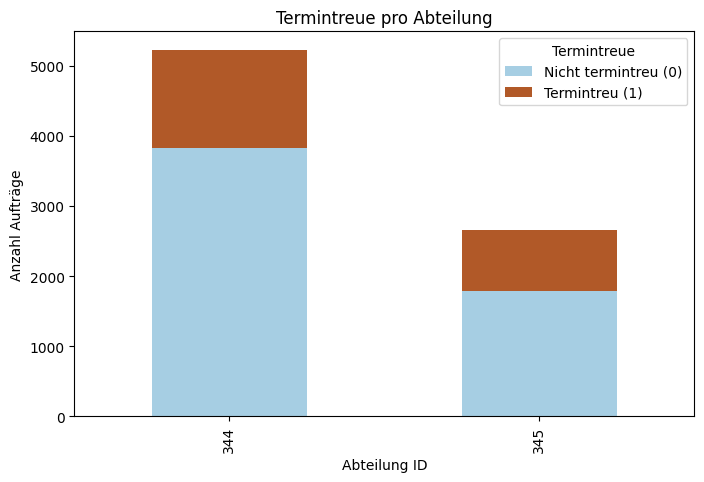

In [ ]:
crosstab_abt = pd.crosstab(data['AusführendeAbteilungID'], data['Termintreue'])
crosstab_abt.plot(kind='bar', stacked=True, figsize=(8, 5), colormap='Paired')
plt.title('Termintreue pro Abteilung')
plt.xlabel('Abteilung ID')
plt.ylabel('Anzahl Aufträge')
plt.legend(title='Termintreue', labels=['Nicht termintreu (0)', 'Termintreu (1)'])
plt.show()


In [ ]:
# Auswahl potenziell relevanter numerischer Spalten
num_cols = ['Bearbeitungszeit', 'AuftragseingangCount', 'Termintreue'] 
corr_matrix = data[num_cols].corr()

plt.figure(figsize=(5, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Korrelationsmatrix')
plt.show()


KeyError: "['AnzahlAuftragseingänge'] not in index"

C:\Users\Eugen Lieder\AppData\Local\Temp\ipykernel_52700\4272672127.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x='Priorität', y='Bearbeitungszeit', palette='Set3')


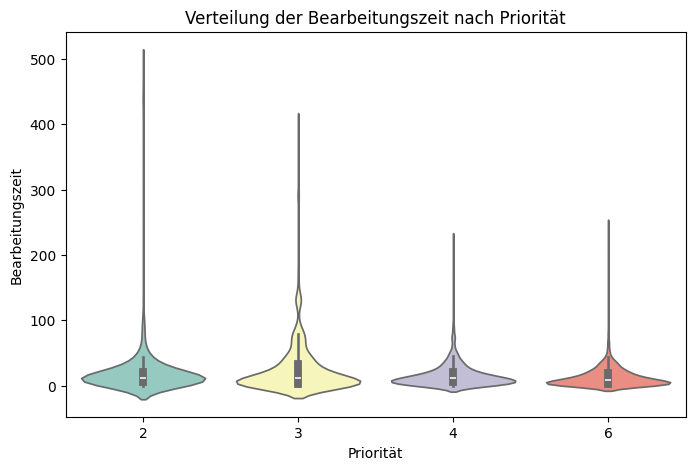

In [ ]:
plt.figure(figsize=(8, 5))
sns.violinplot(data=data, x='Priorität', y='Bearbeitungszeit', palette='Set3')
plt.title('Verteilung der Bearbeitungszeit nach Priorität')
plt.show()


In [ ]:
df=data

In [ ]:
# Beispiel: pro Tag zählen, wie viele Aufträge neu angelegt wurden
daily_counts = df.groupby("Anlagedatum")["s"].count().reset_index()
daily_counts.columns = ["Anlagedatum", "AuftragseingangCount"]
df = df.merge(daily_counts, on="Anlagedatum", how="left")
concurrency_list = []
for i in df.index:
    start_i = df.loc[i, "Gestartetam"]
    end_i   = df.loc[i, "Beendetam"]

    # Anzahl Aufträge j != i, die gleichzeitig laufen
    count_overlap = ((df["Gestartetam"] < end_i) & 
                     (df["Beendetam"] > start_i)).sum() - 1
    concurrency_list.append(count_overlap)

df["Concurrency"] = concurrency_list



In [27]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import datetime

# 1) Daten laden
file_path = r"D:\CLOUD\MCS-Alles\SABI\Aufträge2.csv"  # Pfad anpassen
data = pd.read_csv(file_path, sep=";")

# ---------------------------------------------------------
# 2) Datumsfelder parsen
# ---------------------------------------------------------
# Wir gehen davon aus, dass folgende Spalten Datumswerte (dd.mm.yyyy) enthalten.
# Du kannst hier anpassen, falls bestimmte Zeilen "none" enthalten etc.
# set errors='coerce', damit ungültige Einträge zu NaT werden.
def parse_date_serie(series):
    return pd.to_datetime(series, format="%d.%m.%Y", errors='coerce')

data["Anlagedatum_dt"]    = parse_date_serie(data["Anlagedatum"])
data["Gestartetam_dt"]    = parse_date_serie(data["Gestartetam"])
data["Beendetam_dt"]      = parse_date_serie(data["Beendetam"])
data["InBearbeitungab_dt"] = parse_date_serie(data["InBearbeitungab"])
data["Eingeplantam_dt"]   = parse_date_serie(data["Eingeplantam"])
data["WarteaufRückmeldungab_dt"] = parse_date_serie(data["WarteaufRückmeldungab"])
data["WarteaufMaterialab_dt"]    = parse_date_serie(data["WarteaufMaterialab"])
data["WarteaufVorlageab_dt"]     = parse_date_serie(data["WarteaufVorlageab"])
data["Wunschtermin_dt"]   = parse_date_serie(data["Wunschtermin"])

# ---------------------------------------------------------
# 3) Bearbeitungszeit prüfen / neu berechnen (optional)
# ---------------------------------------------------------
# Im Datensatz existiert bereits "Bearbeitungszeit".
# Falls du die Plausibilität prüfen möchtest, könntest du sie
# aus Beendetam_dt - Gestartetam_dt in Tagen berechnen:

# Falls "Bearbeitungszeit" im Datensatz in Tagen ist, 
# kannst du unten im Modell wahlweise "Bearbeitungszeit" 
# oder "Bearbeitungszeit_neu" verwenden.
data["Bearbeitungszeit_neu"] = (
    data["Beendetam_dt"] - data["Gestartetam_dt"]
).dt.days

# Achtung: Falls negative oder NaN-Werte entstehen, 
# solltest du diese Einträge ggf. filtern oder korrigieren.
# Beispiel: Filtern, dass Bearbeitungszeit >= 0:
data = data[data["Bearbeitungszeit_neu"] >= 0].copy()

# ---------------------------------------------------------
# 4) "AnzahlAuftragseingänge" = parallele Aufträge berechnen (Naive O(n^2))
# ---------------------------------------------------------
# Für jeden Auftrag ermitteln wir, wie viele andere Aufträge 
# sich zeitlich überlappen: 
# (Gestartet_j < Beendet_i) & (Beendet_j > Gestartet_i)

# Erst Index zurücksetzen, um Schleifen zu vereinfachen
data.reset_index(drop=True, inplace=True)

concurrency_list = []
for i in range(len(data)):
    start_i = data.loc[i, "Gestartetam_dt"]
    end_i   = data.loc[i, "Beendetam_dt"]
    # Overlap-Bedingung für alle j != i
    mask_overlap = (data["Gestartetam_dt"] < end_i) & (data["Beendetam_dt"] > start_i)
    # count() oder sum() - wir ziehen 1 ab, um den eigenen Auftrag i nicht mitzuzählen
    concurrency_count = mask_overlap.sum() - 1
    concurrency_list.append(concurrency_count)

data["AnzahlAuftragseingänge"] = concurrency_list

# ---------------------------------------------------------
# 5) Feature-Auswahl
# ---------------------------------------------------------
# Wir nehmen als Ziel "Bearbeitungszeit" (oder "Bearbeitungszeit_neu") an.
target_col = "Bearbeitungszeit_neu"  # oder "Bearbeitungszeit"

# Beispiel-Features (kannst du erweitern/ändern):
# - Priorität
# - MarktsegmentID
# - AusführendeAbteilungID
# - AnzahlSchichten
# - LA_IsFastLane
# - AnzahlAuftragseingänge (neu berechnet)
feature_cols = [
    "Priorität",
    "MarktsegmentID",
    "AusführendeAbteilungID",
    "AnzahlSchichten",
    "LA_IsFastLane",
    "AnzahlAuftragseingänge"
]

# Achtung: Datentypen anpassen
# - Numerische Spalten in float/int konvertieren, 
# - Kategorische Spalten in str konvertieren 
#   (damit One-Hot-Encoder / Label-Encoding funktioniert).

# Beispiel: Priorität & LA_IsFastLane könnte int/float sein.
# MarktsegmentID, AusführendeAbteilungID eher kategorisch:
for col in ["MarktsegmentID", "AusführendeAbteilungID", "Priorität"]:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# LA_IsFastLane: falls 'none', 'Ja', 'Nein', etc. => umwandeln
# Hier als Bsp.: 'Ja' -> 1, sonst 0
data["LA_IsFastLane"] = data["LA_IsFastLane"].apply(lambda x: 1 if str(x).lower() == 'ja' else 0)

# AnzahlSchichten 
data["AnzahlSchichten"] = pd.to_numeric(data["AnzahlSchichten"], errors='coerce')

# Filter raus, wo target NaN ist:
data = data.dropna(subset=[target_col])

# X und y erstellen
X = data[feature_cols].copy()
y = data[target_col].copy()

# ---------------------------------------------------------
# 6) One-Hot-Encoding oder Label-Encoding
# ---------------------------------------------------------
# Hier ein einfaches Beispiel: "MarktsegmentID" und "AusführendeAbteilungID" 
# sind numerisch, könnten aber je nach Datenlage 
# eher kategorisch sein. Wenn du sie als kategorisch behandeln willst, 
# kannst du sie in Strings umwandeln und dann one-hot-encoden.

# Falls du sie lieber als numerischen Wert interpretierst, 
# kannst du das OHE weglassen.
categorical_cols = []  # z. B. ["MarktsegmentID", "AusführendeAbteilungID"] => optional

# Falls du diese Spalten one-hot-encoden willst, hebe sie in 
# categorical_cols = ["MarktsegmentID", "AusführendeAbteilungID"] o. ä. 
# Dann:
# for c in categorical_cols:
#     X[c] = X[c].astype(str)

# X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# ---------------------------------------------------------
# 7) Train/Test-Split
# ---------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    random_state=42
)

# ---------------------------------------------------------
# 8) Skalierung (optional, aber nützlich für MLP)
# ---------------------------------------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# ---------------------------------------------------------
# 9) Modelltraining: GradientBoostingRegressor
# ---------------------------------------------------------
from sklearn.model_selection import GridSearchCV

gbr = GradientBoostingRegressor(random_state=42)
param_grid_gbr = {
    "learning_rate": [0.01, 0.1],
    "n_estimators": [100, 200],
    "max_depth": [3, 5]
}

grid_search_gbr = GridSearchCV(
    gbr, 
    param_grid_gbr, 
    cv=3, 
    scoring="neg_mean_absolute_error", 
    n_jobs=-1
)
grid_search_gbr.fit(X_train, y_train)

best_gbr = grid_search_gbr.best_estimator_
y_pred_gbr = best_gbr.predict(X_test)

mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
rmse_gbr = np.sqrt(mse_gbr)

print("=== Gradient Boosting Regressor ===")
print("Beste Hyperparameter:", grid_search_gbr.best_params_)
print(f"MAE:  {mae_gbr:.3f}")
print(f"MSE:  {mse_gbr:.3f}")
print(f"RMSE: {rmse_gbr:.3f}")

# ---------------------------------------------------------
# 10) Modelltraining: MLPRegressor
# ---------------------------------------------------------
mlp = MLPRegressor(random_state=42, max_iter=500)
param_grid_mlp = {
    "hidden_layer_sizes": [(100,), (50, 50)],
    "activation": ["relu", "tanh"],
    "alpha": [0.0001, 0.001],
    "solver": ["adam"]
}

grid_search_mlp = GridSearchCV(
    mlp,
    param_grid_mlp,
    cv=3,
    scoring="neg_mean_absolute_error",
    n_jobs=-1
)
grid_search_mlp.fit(X_train_scaled, y_train)  # ACHTUNG: Skalierte Daten!
best_mlp = grid_search_mlp.best_estimator_

y_pred_mlp = best_mlp.predict(X_test_scaled)

mae_mlp = mean_absolute_error(y_test, y_pred_mlp)
mse_mlp = mean_squared_error(y_test, y_pred_mlp)
rmse_mlp = np.sqrt(mse_mlp)

print("\n=== MLP Regressor ===")
print("Beste Hyperparameter:", grid_search_mlp.best_params_)
print(f"MAE:  {mae_mlp:.3f}")
print(f"MSE:  {mse_mlp:.3f}")
print(f"RMSE: {rmse_mlp:.3f}")


KeyError: 'LA_IsFastLane'


--- Spaltennamen und Datentypen ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8982 entries, 0 to 8981
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   AuftragID                8982 non-null   int64 
 1   Anlagedatum              8982 non-null   object
 2   Gestartetam              8982 non-null   object
 3   Wunschtermin             8982 non-null   object
 4   Priorität                8982 non-null   int64 
 5   Beendetam                8982 non-null   object
 6   BusinessUnitID           8982 non-null   int64 
 7   VeranlasendeAbteilungID  8982 non-null   object
 8   AuftragsgrundID          8982 non-null   int64 
 9   Wertigkeit               8982 non-null   int64 
 10  Dringlichkeit            8982 non-null   int64 
 11  MarktsegmentID           8982 non-null   int64 
 12  WiederholauftragJa/Nein  8982 non-null   int64 
 13  UrsprungfürWiederholung  8982 non-null   object
 14  Aus

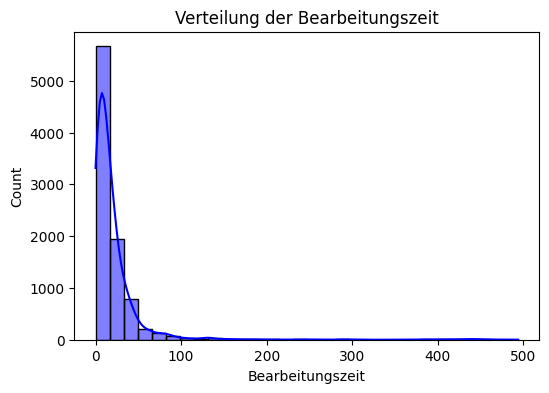

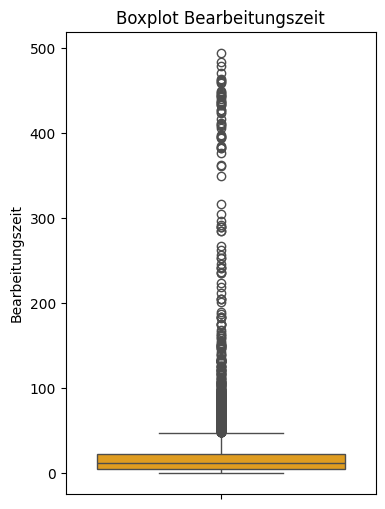

C:\Users\Eugen Lieder\AppData\Local\Temp\ipykernel_38436\1723283938.py:111: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x="Termintreue", palette="viridis")


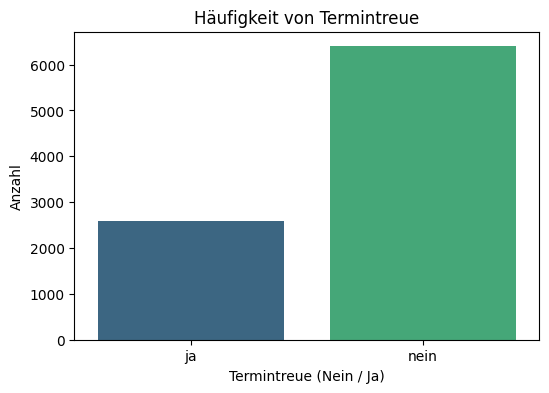

C:\Users\Eugen Lieder\AppData\Local\Temp\ipykernel_38436\1723283938.py:120: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x="Termintreue", y="Bearbeitungszeit", palette="Set2")


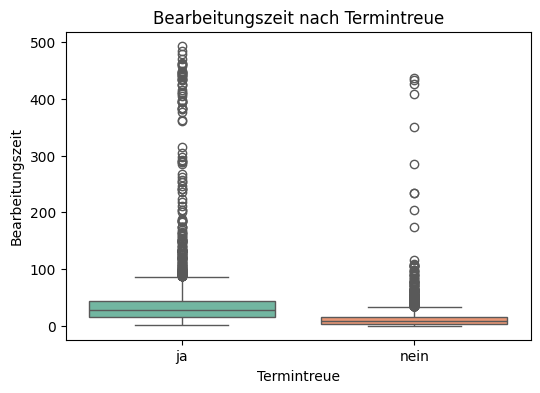

C:\Users\Eugen Lieder\AppData\Local\Temp\ipykernel_38436\1723283938.py:129: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x="Priorität", y="Bearbeitungszeit", palette="Set3")


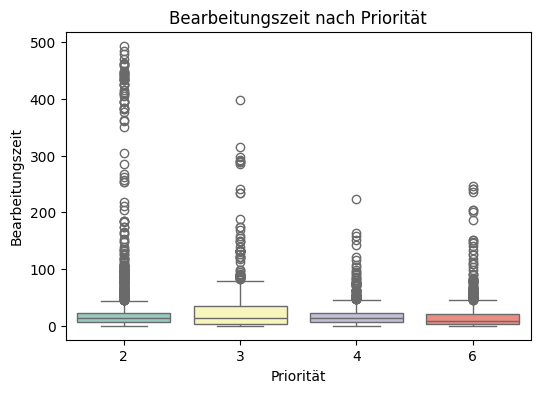

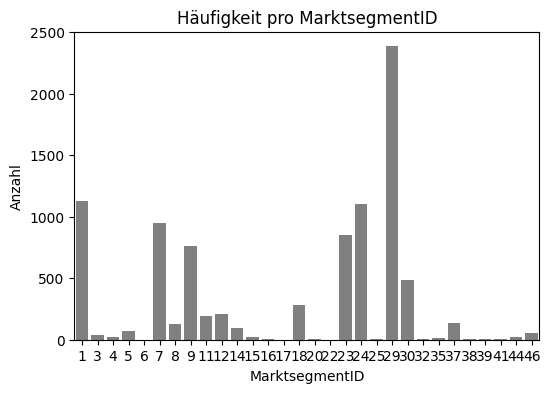

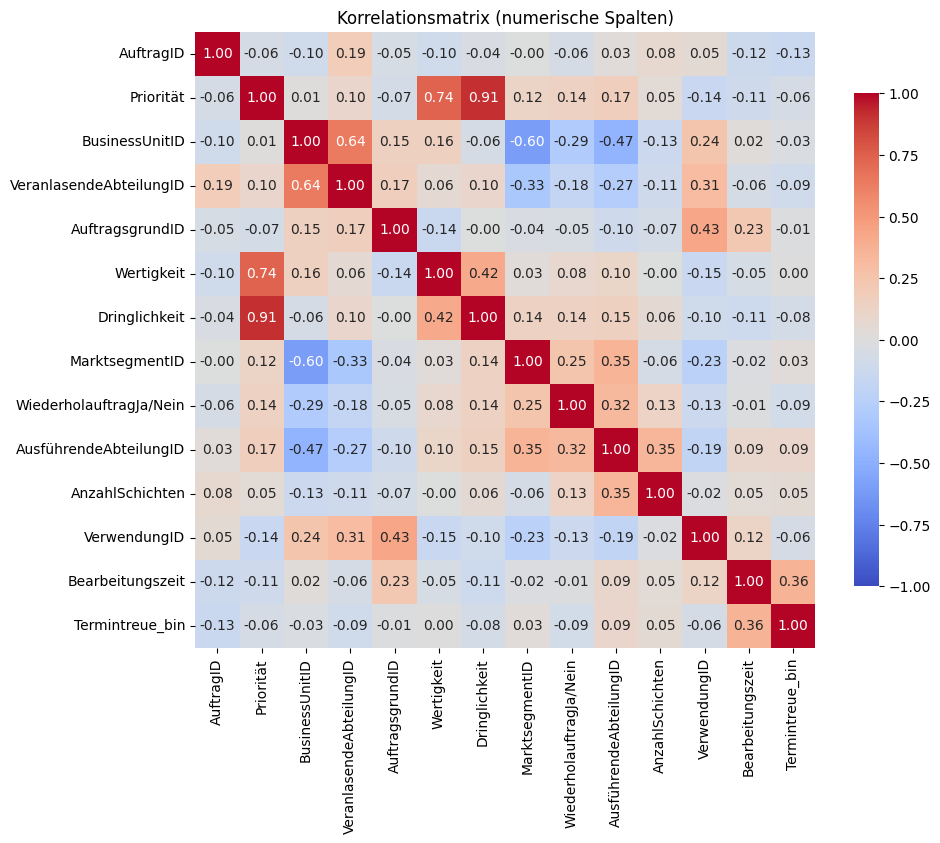

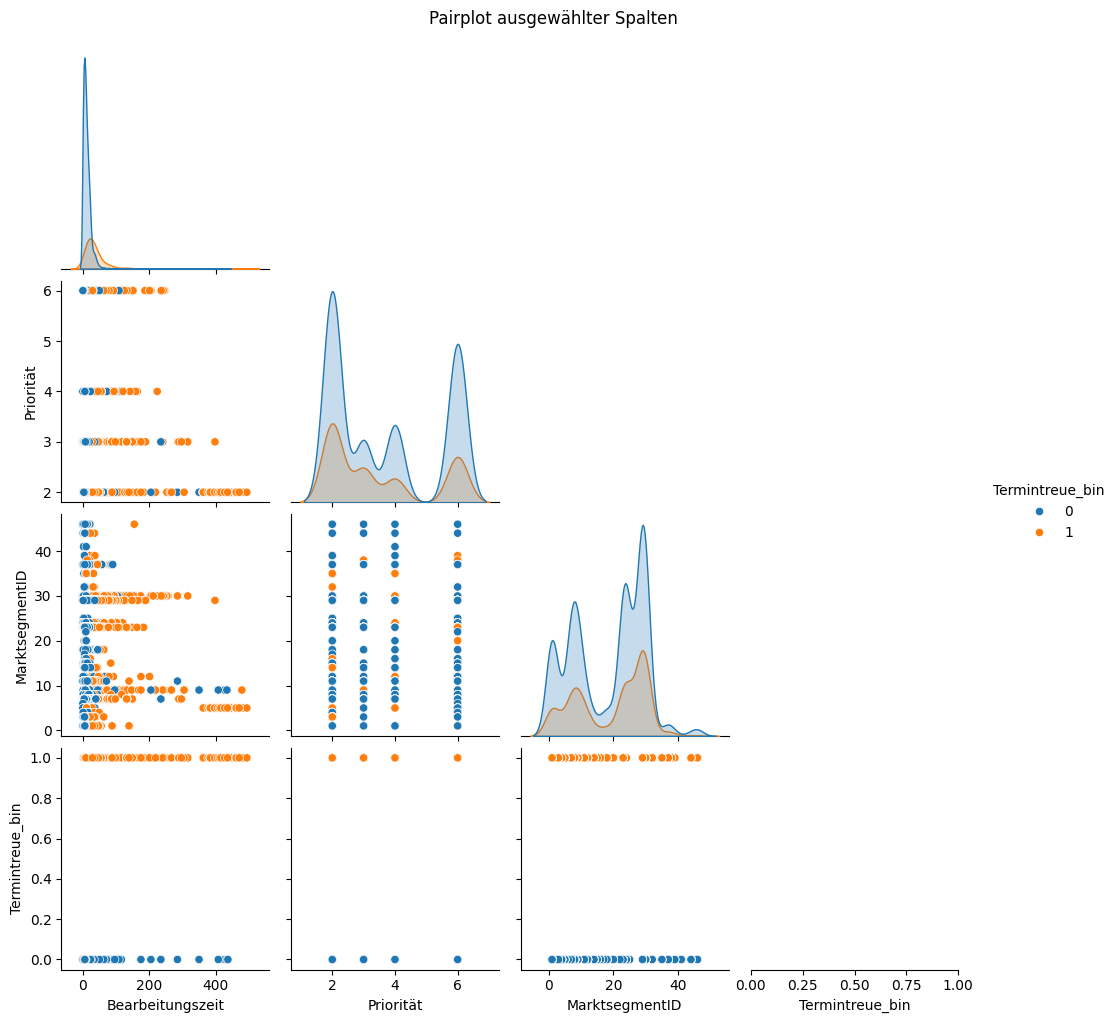


=== Abschluss der explorativen Datenanalyse ===
Mit obigen Plots und Statistiken hast du einen ersten Eindruck von deinen Daten.
Weiterführend könntest du z.B. Feature Engineering, Modelltraining und Validierung durchführen.


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --------------------------------------------------
# 1) Daten einlesen
# --------------------------------------------------
file_path = r"D:\CLOUD\MCS-Alles\SABI\Aufträge2.csv"  # Replace with the correct file path
data = pd.read_csv(file_path, sep=";")

# --------------------------------------------------
# 2) Überblick über die Daten
# --------------------------------------------------
print("\n--- Spaltennamen und Datentypen ---")
print(data.info())

print("\n--- Erste Zeilen ---")
print(data.head())

# --------------------------------------------------
# 3) Optional: Datumsfelder parsen
#    Spalten: Anlagedatum, Gestartetam, Beendetam, usw.
# --------------------------------------------------
# Wenn dein Datumsformat 'TT.MM.JJJJ' ist, verwende:
def parse_date(series):
    return pd.to_datetime(series, format="%d.%m.%Y", errors='coerce')

datumsspalten = ["Anlagedatum", "Gestartetam", "Wunschtermin",
                 "Beendetam", "InBearbeitungab", "Eingeplantam",
                 "WarteaufRückmeldungab", "WarteaufMaterialab", "WarteaufVorlageab"]

for spalte in datumsspalten:
    if spalte in data.columns:
        data[spalte + "_dt"] = parse_date(data[spalte])

# --------------------------------------------------
# 4) Datentypen für numerische Spalten konvertieren
# --------------------------------------------------
# Beispiel: Priorität, BusinessUnitID, MarktsegmentID, usw. 
# (anpassen je nachdem, was in deinem Datensatz numerisch ist)
numerische_spalten = [
    "Priorität",
    "BusinessUnitID",
    "VeranlasendeAbteilungID",
    "AuftragsgrundID",
    "Wertigkeit",
    "Dringlichkeit",
    "PlanstatusID",
    "MarktsegmentID",
    "WiederholauftragJa/Nein",
    "AusführendeAbteilungID",
    "AnzahlSchichten",
    "VerwendungID",
    "Bearbeitungszeit"
]

for spalte in numerische_spalten:
    if spalte in data.columns:
        data[spalte] = pd.to_numeric(data[spalte], errors="coerce")

# Bei LA_IsFastLane steht "none" und evtl. "Ja", "Nein":
# -> binär umwandeln: 1=Ja, 0=Nein
if "LA_IsFastLane" in data.columns:
    data["LA_IsFastLane"] = data["LA_IsFastLane"].apply(lambda x: 1 if str(x).lower() == "ja" else 0)

# Bei Termintreue: 1=Ja, 0=Nein
# (Optional, wenn du es als binäre Zahl brauchst)
if "Termintreue" in data.columns:
    data["Termintreue_bin"] = data["Termintreue"].apply(lambda x: 1 if str(x).lower() == "ja" else 0)

# --------------------------------------------------
# 5) Allgemeine Statistiken
# --------------------------------------------------
print("\n--- Beschreibende Statistik (numerische Spalten) ---")
print(data.describe())

print("\n--- Wertetabelle Termintreue ---")
if "Termintreue" in data.columns:
    print(data["Termintreue"].value_counts(dropna=False))

# --------------------------------------------------
# 6) Fehlende Werte untersuchen
# --------------------------------------------------
print("\n--- Fehlende Werte pro Spalte ---")
print(data.isna().sum())

# Optional: Du kannst z. B. Zeilen mit zu vielen fehlenden Einträgen droppen:
# data = data.dropna(subset=["Bearbeitungszeit", "Priorität", "MarktsegmentID"])
# oder im größeren Umfang mit Strategien wie Mean/Median-Imputation umgehen.

# --------------------------------------------------
# 7) Explorative Plots
# --------------------------------------------------
# a) Histogramm für Bearbeitungszeit
if "Bearbeitungszeit" in data.columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=data, x="Bearbeitungszeit", kde=True, bins=30, color="blue")
    plt.title("Verteilung der Bearbeitungszeit")
    plt.show()

# b) Boxplot Bearbeitungszeit
    plt.figure(figsize=(4, 6))
    sns.boxplot(data=data, y="Bearbeitungszeit", color="orange")
    plt.title("Boxplot Bearbeitungszeit")
    plt.show()

# c) Countplot für Termintreue (Ja/Nein), falls vorhanden
if "Termintreue" in data.columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=data, x="Termintreue", palette="viridis")
    plt.title("Häufigkeit von Termintreue")
    plt.xlabel("Termintreue (Nein / Ja)")
    plt.ylabel("Anzahl")
    plt.show()

# d) Bearbeitungszeit nach Termintreue
if "Bearbeitungszeit" in data.columns and "Termintreue" in data.columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=data, x="Termintreue", y="Bearbeitungszeit", palette="Set2")
    plt.title("Bearbeitungszeit nach Termintreue")
    plt.xlabel("Termintreue")
    plt.ylabel("Bearbeitungszeit")
    plt.show()

# e) Bearbeitungszeit nach Priorität
if "Bearbeitungszeit" in data.columns and "Priorität" in data.columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=data, x="Priorität", y="Bearbeitungszeit", palette="Set3")
    plt.title("Bearbeitungszeit nach Priorität")
    plt.xlabel("Priorität")
    plt.ylabel("Bearbeitungszeit")
    plt.show()

# f) Verteilung MarktsegmentID
if "MarktsegmentID" in data.columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=data, x="MarktsegmentID", color="gray")
    plt.title("Häufigkeit pro MarktsegmentID")
    plt.xlabel("MarktsegmentID")
    plt.ylabel("Anzahl")
    plt.show()

# --------------------------------------------------
# 8) Korrelationsmatrix (für numerische Spalten)
# --------------------------------------------------
# Wir schauen nur auf die numerischen Spalten
numeric_cols = data.select_dtypes(include=[np.number]).columns
corr_matrix = data[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f",
            cbar_kws={"shrink": .8}, vmin=-1, vmax=1)
plt.title("Korrelationsmatrix (numerische Spalten)")
plt.show()

# --------------------------------------------------
# 9) Optional: Pairplot für ausgewählte Spalten
# --------------------------------------------------
# Achtung: Pairplot kann bei vielen Spalten sehr groß werden. 
# Wir wählen beispielhaft ein kleines Subset.
auswahl_spalten = ["Bearbeitungszeit", "Priorität", "MarktsegmentID", "Termintreue_bin"]
vorhande_spalten = [sp for sp in auswahl_spalten if sp in data.columns]

if len(vorhande_spalten) > 1:
    sns.pairplot(data=data, vars=vorhande_spalten, hue="Termintreue_bin", corner=True)
    plt.suptitle("Pairplot ausgewählter Spalten", y=1.02)
    plt.show()

# --------------------------------------------------
# 10) Ausblick
# --------------------------------------------------
print("\n=== Abschluss der explorativen Datenanalyse ===")
print("Mit obigen Plots und Statistiken hast du einen ersten Eindruck von deinen Daten.")
print("Weiterführend könntest du z.B. Feature Engineering, Modelltraining und Validierung durchführen.")


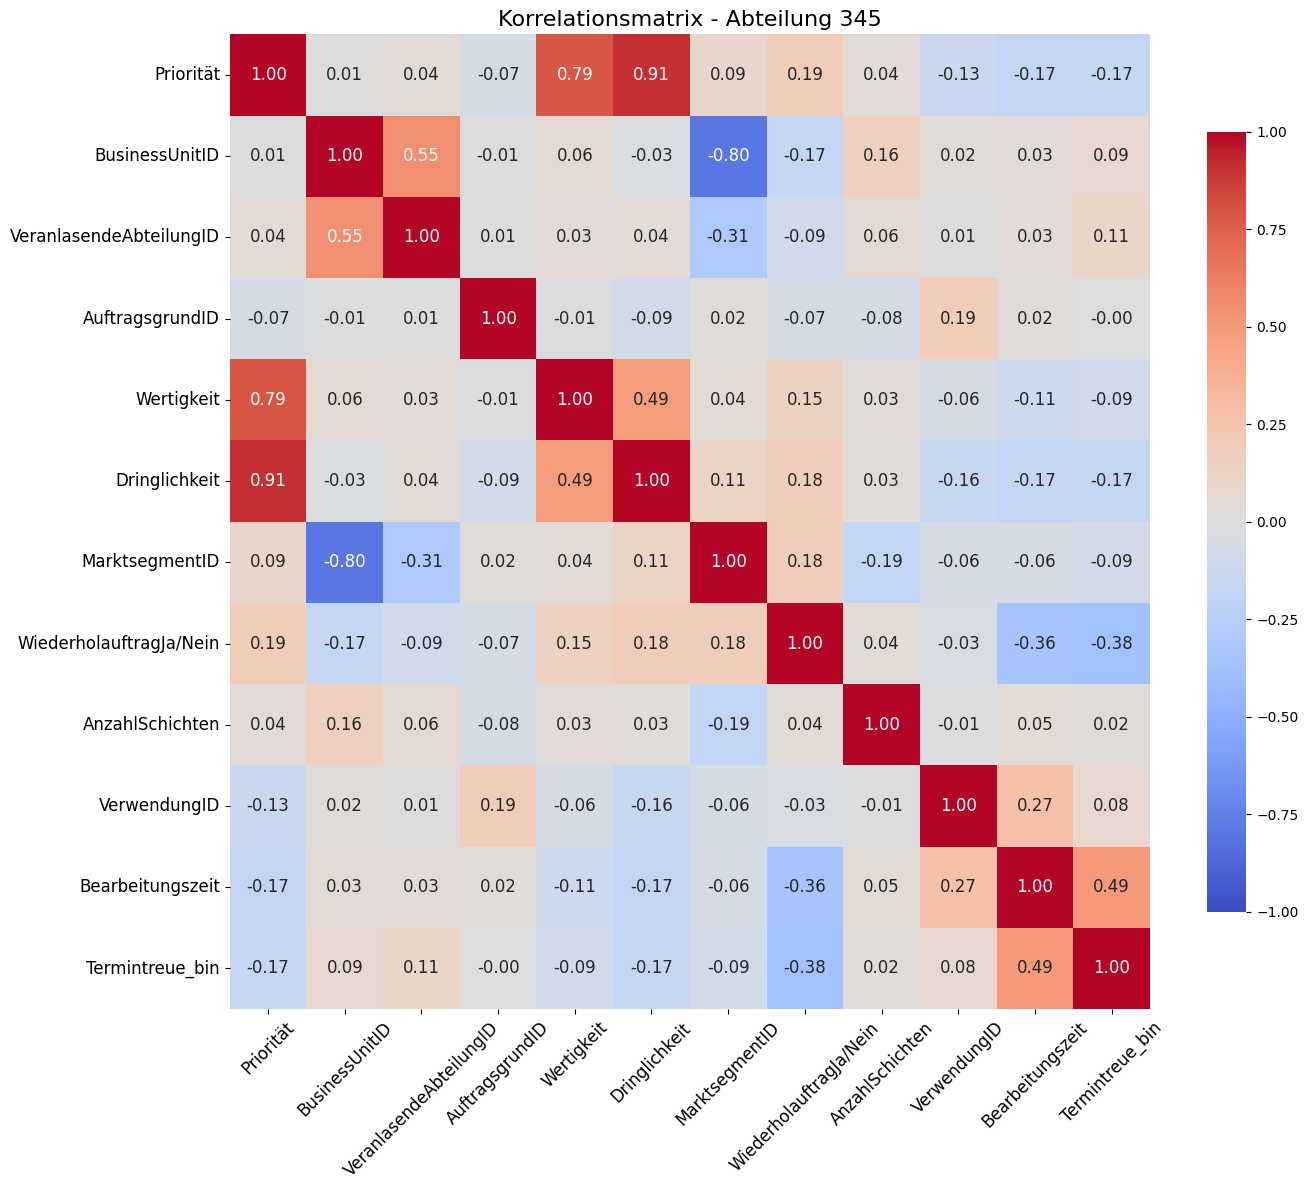

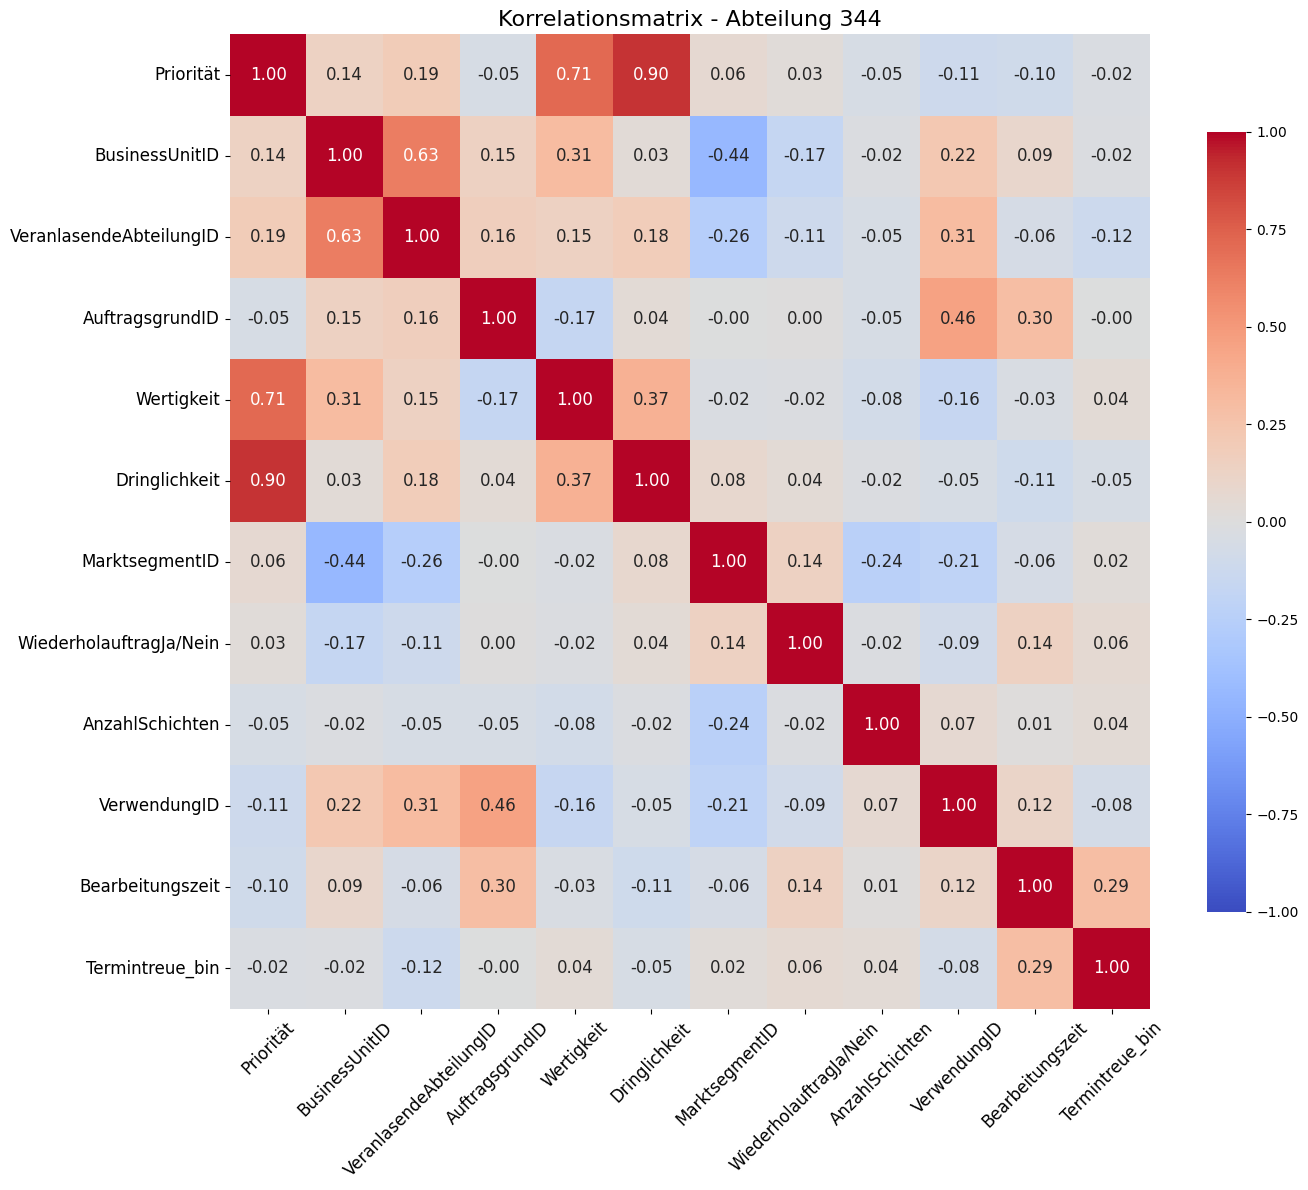

In [29]:
# Überprüfen, ob die Daten geladen und die relevante Spalte vorhanden ist
if isinstance(data, pd.DataFrame) and "AusführendeAbteilungID" in data.columns:
    unique_departments = data["AusführendeAbteilungID"].dropna().unique()  # Einzigartige Abteilungen
   
    numeric_cols = data.select_dtypes(include=[np.number]).columns  # Numerische Spalten

    # Entferne "AusführendeAbteilungID" aus den numerischen Spalten, falls vorhanden
    numeric_cols = numeric_cols.drop("AusführendeAbteilungID", errors='ignore')
    numeric_cols = numeric_cols.drop("AuftragID", errors='ignore')

    # Iteration über jede Abteilung
    for dept in unique_departments:
        dept_data = data[data["AusführendeAbteilungID"] == dept]  # Daten der Abteilung filtern

        # Berechnung der Korrelationsmatrix
        corr_matrix = dept_data[numeric_cols].corr()

        # Plot der Korrelationsmatrix
        plt.figure(figsize=(14, 12))  # Größerer Plot für bessere Lesbarkeit
        sns.heatmap(
            corr_matrix, 
            annot=True, 
            cmap="coolwarm", 
            fmt=".2f",
            cbar_kws={"shrink": .8}, 
            vmin=-1, 
            vmax=1, 
            annot_kws={"size": 12}  # Kleinere Schriftgröße für Zahlen
        )
        plt.title(f"Korrelationsmatrix - Abteilung {dept}", fontsize=16)
        plt.xticks(fontsize=12, rotation=45)
        plt.yticks(fontsize=12, rotation=0)
        plt.tight_layout()  # Optimiert die Abstände für größere Plots
        plt.show()
else:
    print("Die Spalte 'AusführendeAbteilungID' existiert nicht oder die Daten sind nicht korrekt geladen.")



--- Spaltennamen und Datentypen ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8982 entries, 0 to 8981
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   AuftragID                8982 non-null   int64 
 1   Anlagedatum              8982 non-null   object
 2   Gestartetam              8982 non-null   object
 3   Wunschtermin             8982 non-null   object
 4   Priorität                8982 non-null   int64 
 5   Beendetam                8982 non-null   object
 6   BusinessUnitID           8982 non-null   int64 
 7   VeranlasendeAbteilungID  8982 non-null   object
 8   AuftragsgrundID          8982 non-null   int64 
 9   Wertigkeit               8982 non-null   int64 
 10  Dringlichkeit            8982 non-null   int64 
 11  MarktsegmentID           8982 non-null   int64 
 12  WiederholauftragJa/Nein  8982 non-null   int64 
 13  UrsprungfürWiederholung  8982 non-null   object
 14  Aus

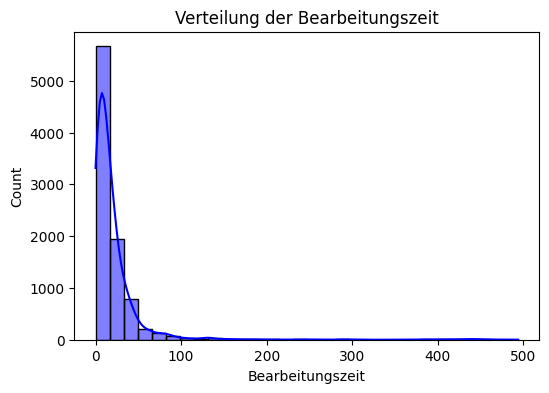

C:\Users\Eugen Lieder\AppData\Local\Temp\ipykernel_38436\1547439565.py:88: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x="Termintreue_bin", y="Bearbeitungszeit", palette="Set2")


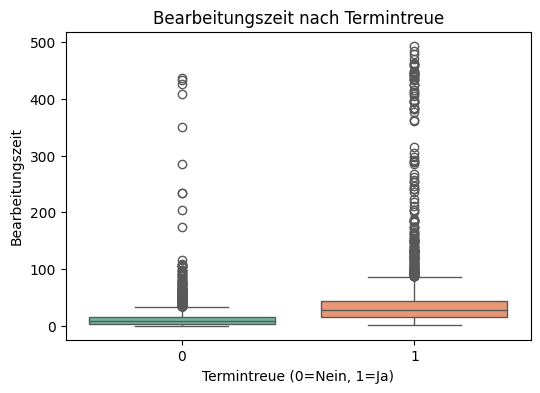

C:\Users\Eugen Lieder\AppData\Local\Temp\ipykernel_38436\1547439565.py:96: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x="Priorität", y="Bearbeitungszeit", palette="Set3")


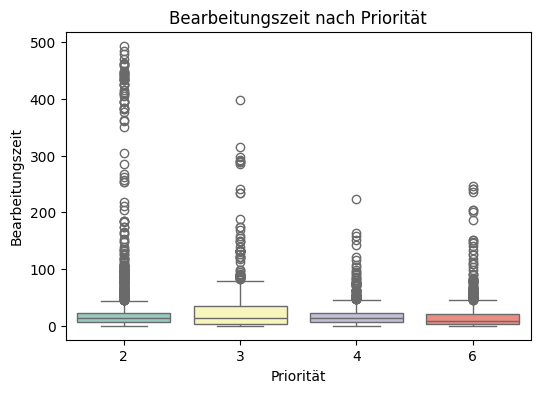

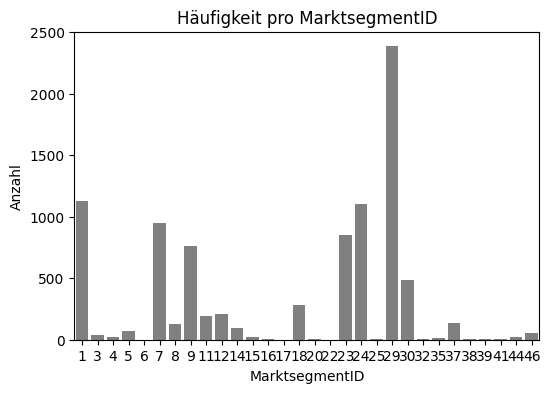

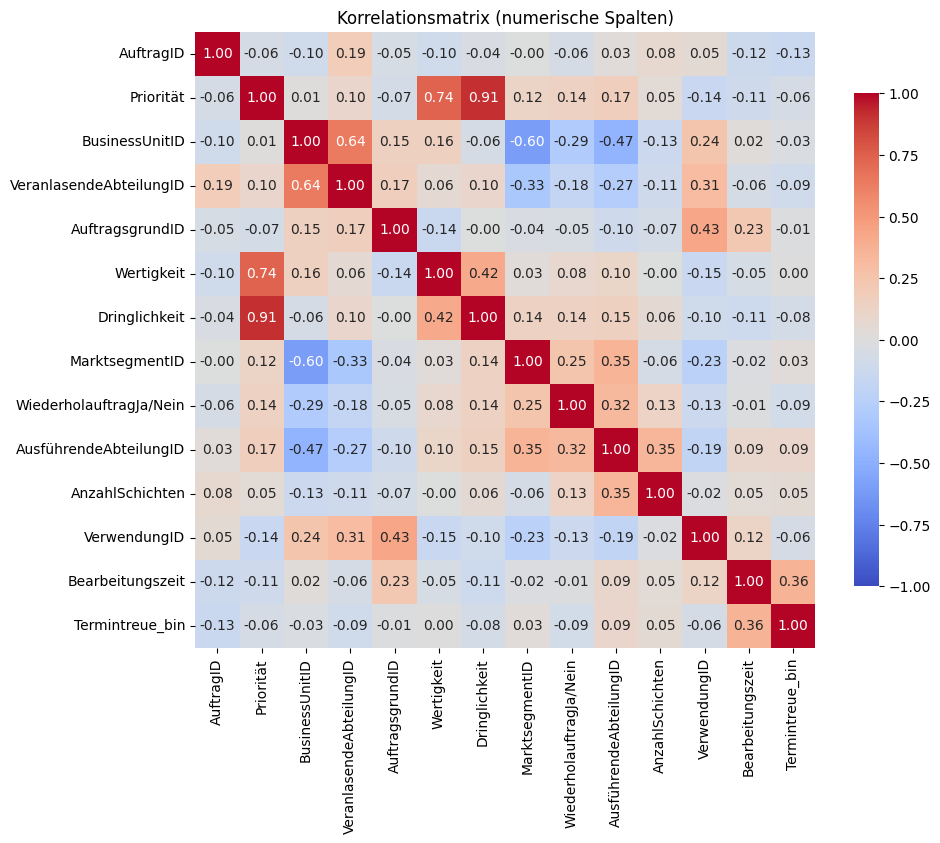


--- Überprüfung der Varianz in Termintreue_bin ---
Termintreue_bin
0    6396
1    2586
Name: count, dtype: int64


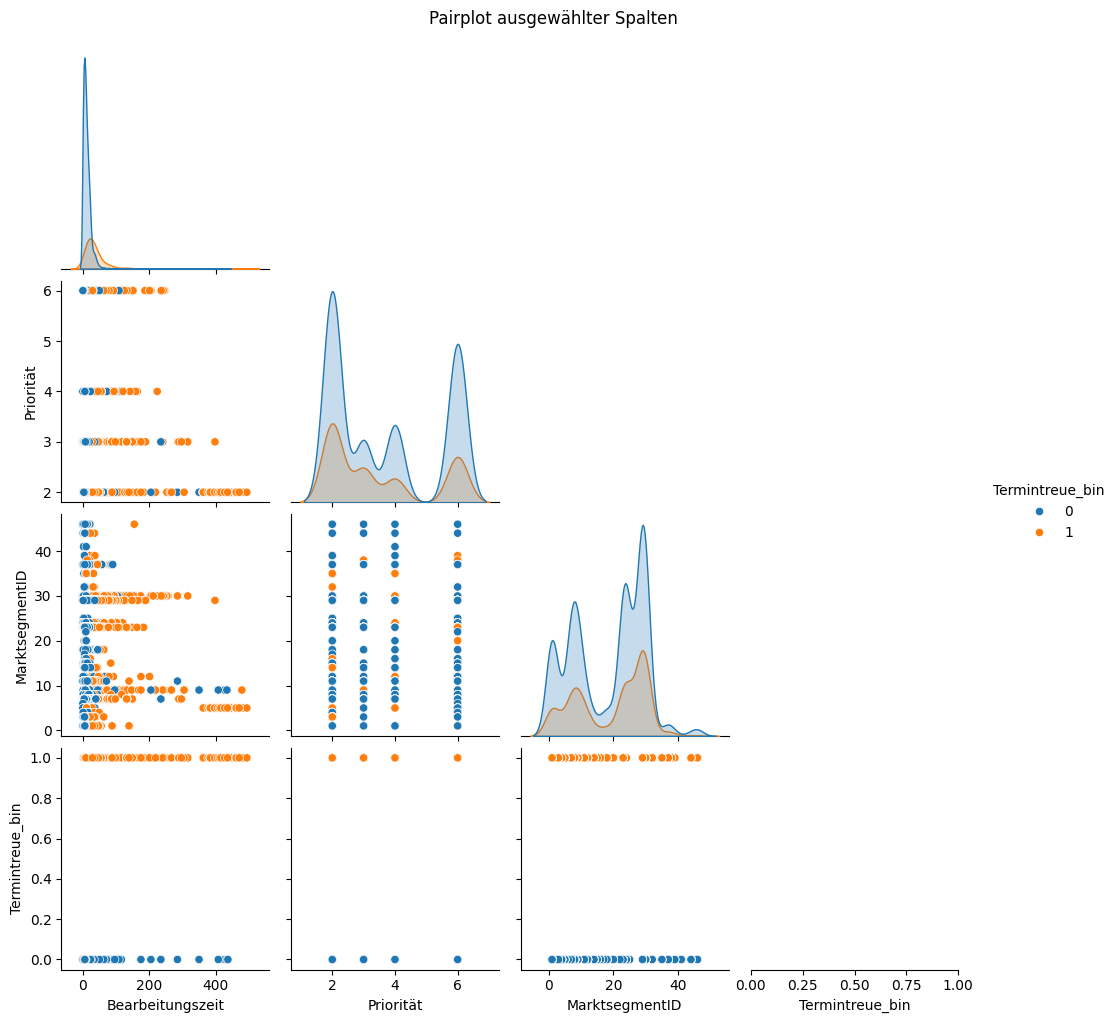


=== Abschluss der explorativen Datenanalyse ===
Plots und Statistiken geben dir einen umfassenden Überblick über deine Daten.


In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --------------------------------------------------
# 1) Daten einlesen
# --------------------------------------------------
file_path = r"D:\CLOUD\MCS-Alles\SABI\Aufträge2.csv"  # Passe den Dateipfad an
data = pd.read_csv(file_path, sep=";")

# --------------------------------------------------
# 2) Überblick über die Daten
# --------------------------------------------------
print("\n--- Spaltennamen und Datentypen ---")
print(data.info())

print("\n--- Erste Zeilen ---")
print(data.head())

# --------------------------------------------------
# 3) Datumsfelder parsen
# --------------------------------------------------
def parse_date(series):
    return pd.to_datetime(series, format="%d.%m.%Y", errors='coerce')

datumsspalten = ["Anlagedatum", "Gestartetam", "Wunschtermin",
                 "Beendetam", "InBearbeitungab", "Eingeplantam",
                 "WarteaufRückmeldungab", "WarteaufMaterialab", "WarteaufVorlageab"]

for spalte in datumsspalten:
    if spalte in data.columns:
        data[spalte + "_dt"] = parse_date(data[spalte])

# --------------------------------------------------
# 4) Datentypen für numerische Spalten konvertieren
# --------------------------------------------------
numerische_spalten = [
    "Priorität",
    "BusinessUnitID",
    "VeranlasendeAbteilungID",
    "AuftragsgrundID",
    "Wertigkeit",
    "Dringlichkeit",
    "PlanstatusID",
    "MarktsegmentID",
    "WiederholauftragJa/Nein",
    "AusführendeAbteilungID",
    "AnzahlSchichten",
    "VerwendungID",
    "Bearbeitungszeit"
]

for spalte in numerische_spalten:
    if spalte in data.columns:
        data[spalte] = pd.to_numeric(data[spalte], errors="coerce")

# Umwandlung von Termintreue in binäre Werte (1=Ja, 0=Nein)
if "Termintreue" in data.columns:
    data["Termintreue_bin"] = data["Termintreue"].apply(lambda x: 1 if str(x).lower() == "ja" else 0)

# Überprüfung der einzigartigen Werte
print("\n--- Einzigartige Werte von Termintreue_bin ---")
if "Termintreue_bin" in data.columns:
    print(data["Termintreue_bin"].unique())

# --------------------------------------------------
# 5) Fehlende Werte untersuchen und bereinigen
# --------------------------------------------------
print("\n--- Fehlende Werte pro Spalte ---")
print(data.isna().sum())

# Optional: Zeilen mit fehlenden Werten in relevanten Spalten entfernen
auswahl_spalten = ["Bearbeitungszeit", "Priorität", "MarktsegmentID", "Termintreue_bin"]
data = data.dropna(subset=auswahl_spalten)

# --------------------------------------------------
# 6) Explorative Plots
# --------------------------------------------------
# Histogramm für Bearbeitungszeit
plt.figure(figsize=(6, 4))
sns.histplot(data=data, x="Bearbeitungszeit", kde=True, bins=30, color="blue")
plt.title("Verteilung der Bearbeitungszeit")
plt.show()

# Boxplot Bearbeitungszeit nach Termintreue
plt.figure(figsize=(6, 4))
sns.boxplot(data=data, x="Termintreue_bin", y="Bearbeitungszeit", palette="Set2")
plt.title("Bearbeitungszeit nach Termintreue")
plt.xlabel("Termintreue (0=Nein, 1=Ja)")
plt.ylabel("Bearbeitungszeit")
plt.show()

# Boxplot Bearbeitungszeit nach Priorität
plt.figure(figsize=(6, 4))
sns.boxplot(data=data, x="Priorität", y="Bearbeitungszeit", palette="Set3")
plt.title("Bearbeitungszeit nach Priorität")
plt.xlabel("Priorität")
plt.ylabel("Bearbeitungszeit")
plt.show()

# Countplot für MarktsegmentID
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x="MarktsegmentID", color="gray")
plt.title("Häufigkeit pro MarktsegmentID")
plt.xlabel("MarktsegmentID")
plt.ylabel("Anzahl")
plt.show()

# --------------------------------------------------
# 7) Korrelationsmatrix (für numerische Spalten)
# --------------------------------------------------
numeric_cols = data.select_dtypes(include=[np.number]).columns
corr_matrix = data[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f",
            cbar_kws={"shrink": .8}, vmin=-1, vmax=1)
plt.title("Korrelationsmatrix (numerische Spalten)")
plt.show()

# --------------------------------------------------
# 8) Pairplot für ausgewählte Spalten
# --------------------------------------------------
# Sicherstellen, dass keine fehlerhaften Werte vorhanden sind
print("\n--- Überprüfung der Varianz in Termintreue_bin ---")
print(data["Termintreue_bin"].value_counts())

# Pairplot erstellen
if len(auswahl_spalten) > 1:
    sns.pairplot(data=data, vars=auswahl_spalten, hue="Termintreue_bin", diag_kind="kde", corner=True)
    plt.suptitle("Pairplot ausgewählter Spalten", y=1.02)
    plt.show()

# --------------------------------------------------
# 9) Abschluss der EDA
# --------------------------------------------------
print("\n=== Abschluss der explorativen Datenanalyse ===")
print("Plots und Statistiken geben dir einen umfassenden Überblick über deine Daten.")



--- Spaltennamen und Datentypen ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8982 entries, 0 to 8981
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   AuftragID                8982 non-null   int64 
 1   Anlagedatum              8982 non-null   object
 2   Gestartetam              8982 non-null   object
 3   Wunschtermin             8982 non-null   object
 4   Priorität                8982 non-null   int64 
 5   Beendetam                8982 non-null   object
 6   BusinessUnitID           8982 non-null   int64 
 7   VeranlasendeAbteilungID  8982 non-null   object
 8   AuftragsgrundID          8982 non-null   int64 
 9   Wertigkeit               8982 non-null   int64 
 10  Dringlichkeit            8982 non-null   int64 
 11  MarktsegmentID           8982 non-null   int64 
 12  WiederholauftragJa/Nein  8982 non-null   int64 
 13  UrsprungfürWiederholung  8982 non-null   object
 14  Aus

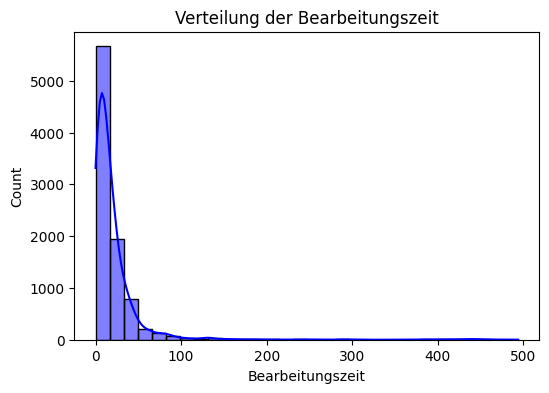

C:\Users\Eugen Lieder\AppData\Local\Temp\ipykernel_38436\558724038.py:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x="Termintreue_bin", y="Bearbeitungszeit", palette="Set2")


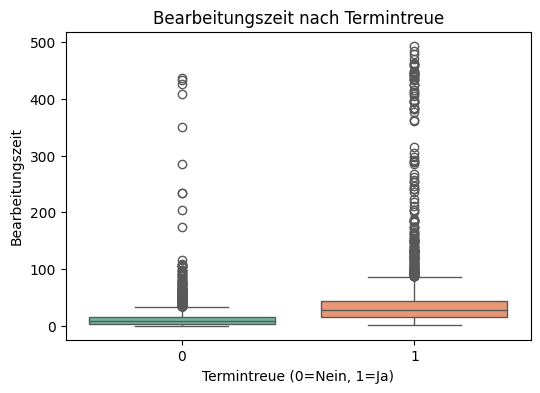

C:\Users\Eugen Lieder\AppData\Local\Temp\ipykernel_38436\558724038.py:91: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x="Priorität", y="Bearbeitungszeit", palette="Set3")


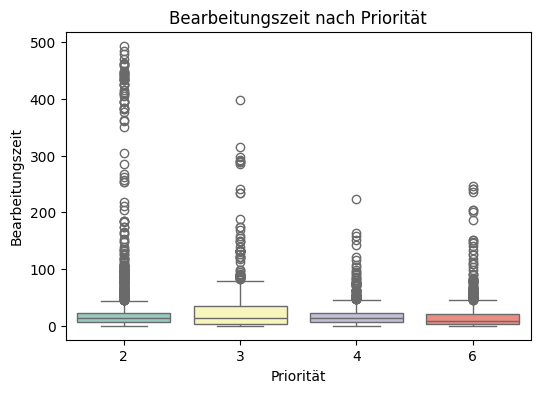

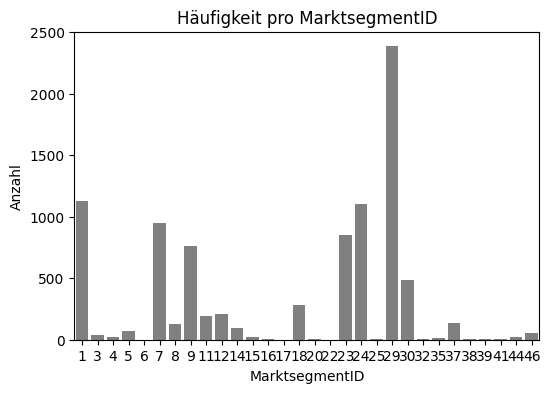

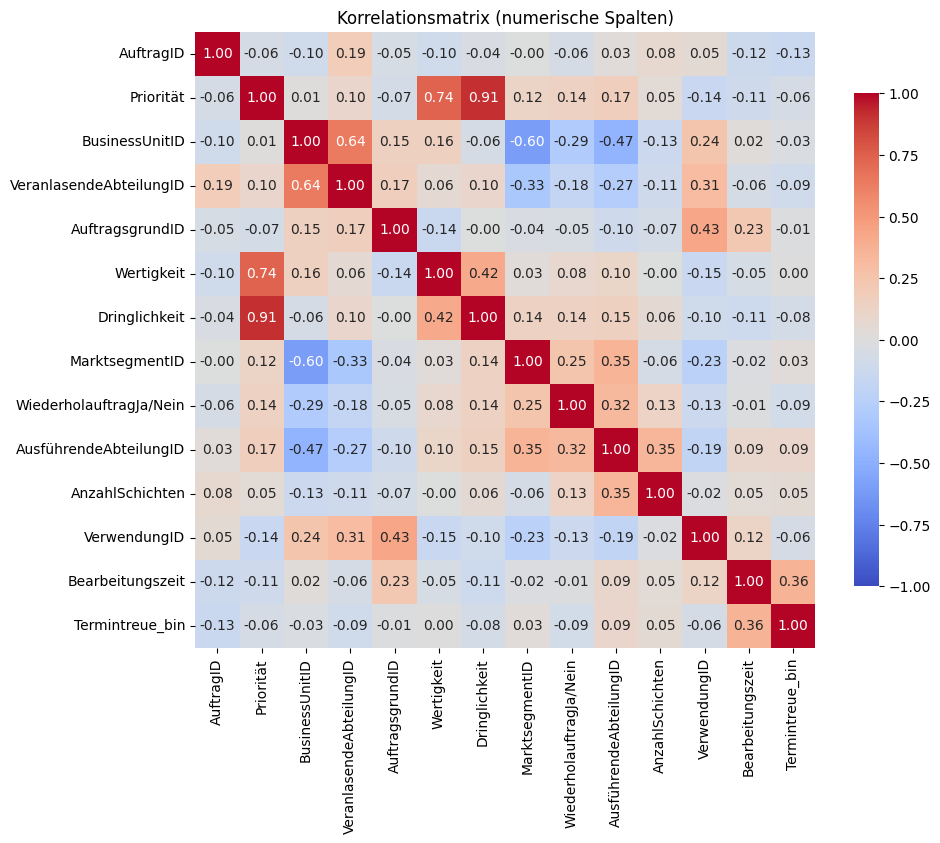


--- Überprüfung der Verteilung in Termintreue_bin ---
Termintreue_bin
0    6396
1    2586
Name: count, dtype: int64


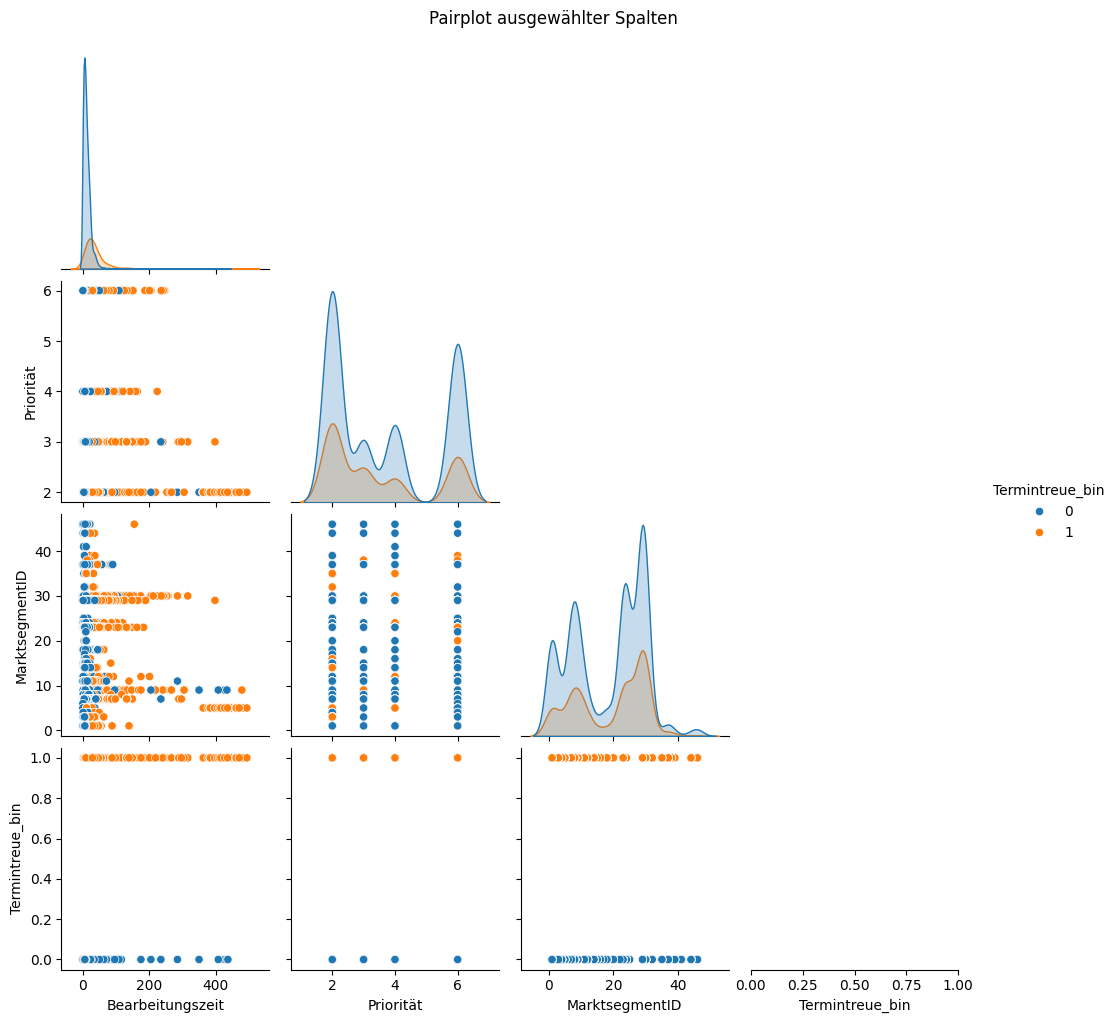


=== Abschluss der explorativen Datenanalyse ===
Die Plots und Analysen bieten eine Übersicht über die wichtigsten Beziehungen und Verteilungen.


In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --------------------------------------------------
# 1) Daten einlesen und Überblick
# --------------------------------------------------
file_path = r"D:\CLOUD\MCS-Alles\SABI\Aufträge2.csv"  # Passe den Dateipfad an
data = pd.read_csv(file_path, sep=";")

# Überblick über die Datenstruktur
print("\n--- Spaltennamen und Datentypen ---")
print(data.info())
print("\n--- Erste Zeilen der Daten ---")
print(data.head())

# --------------------------------------------------
# 2) Datumsfelder parsen
# --------------------------------------------------
# Datumsfelder erkennen und konvertieren
def parse_date(series):
    return pd.to_datetime(series, format="%d.%m.%Y", errors='coerce')

datumsspalten = [
    "Anlagedatum", "Gestartetam", "Wunschtermin", "Beendetam", 
    "InBearbeitungab", "Eingeplantam", "WarteaufRückmeldungab", 
    "WarteaufMaterialab", "WarteaufVorlageab"
]

for spalte in datumsspalten:
    if spalte in data.columns:
        data[spalte + "_dt"] = parse_date(data[spalte])

# --------------------------------------------------
# 3) Konvertierung von numerischen Werten
# --------------------------------------------------
# Umwandlung relevanter Spalten in numerische Werte
numerische_spalten = [
    "Priorität", "BusinessUnitID", "VeranlasendeAbteilungID", "AuftragsgrundID",
    "Wertigkeit", "Dringlichkeit", "PlanstatusID", "MarktsegmentID", 
    "WiederholauftragJa/Nein", "AusführendeAbteilungID", "AnzahlSchichten",
    "VerwendungID", "Bearbeitungszeit"
]

for spalte in numerische_spalten:
    if spalte in data.columns:
        data[spalte] = pd.to_numeric(data[spalte], errors="coerce")

# --------------------------------------------------
# 4) Binäre Umwandlung von Termintreue
# --------------------------------------------------
# Umwandlung der Termintreue-Spalte in binäre Werte (1=Ja, 0=Nein)
if "Termintreue" in data.columns:
    data["Termintreue_bin"] = data["Termintreue"].apply(lambda x: 1 if str(x).lower() == "ja" else 0)

# Überprüfung der umgewandelten Spalte
if "Termintreue_bin" in data.columns:
    print("\n--- Einzigartige Werte in Termintreue_bin ---")
    print(data["Termintreue_bin"].unique())

# --------------------------------------------------
# 5) Fehlende Werte analysieren und bereinigen
# --------------------------------------------------
print("\n--- Fehlende Werte pro Spalte ---")
print(data.isna().sum())

# Bereinigung: Zeilen mit fehlenden Werten in relevanten Spalten entfernen
relevante_spalten = ["Bearbeitungszeit", "Priorität", "MarktsegmentID", "Termintreue_bin"]
data = data.dropna(subset=relevante_spalten)

# --------------------------------------------------
# 6) Explorative Datenanalyse
# --------------------------------------------------
# a) Histogramm für Bearbeitungszeit
plt.figure(figsize=(6, 4))
sns.histplot(data=data, x="Bearbeitungszeit", kde=True, bins=30, color="blue")
plt.title("Verteilung der Bearbeitungszeit")
plt.show()

# b) Boxplot Bearbeitungszeit nach Termintreue
plt.figure(figsize=(6, 4))
sns.boxplot(data=data, x="Termintreue_bin", y="Bearbeitungszeit", palette="Set2")
plt.title("Bearbeitungszeit nach Termintreue")
plt.xlabel("Termintreue (0=Nein, 1=Ja)")
plt.ylabel("Bearbeitungszeit")
plt.show()

# c) Boxplot Bearbeitungszeit nach Priorität
plt.figure(figsize=(6, 4))
sns.boxplot(data=data, x="Priorität", y="Bearbeitungszeit", palette="Set3")
plt.title("Bearbeitungszeit nach Priorität")
plt.xlabel("Priorität")
plt.ylabel("Bearbeitungszeit")
plt.show()

# d) Countplot für MarktsegmentID
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x="MarktsegmentID", color="gray")
plt.title("Häufigkeit pro MarktsegmentID")
plt.xlabel("MarktsegmentID")
plt.ylabel("Anzahl")
plt.show()

# --------------------------------------------------
# 7) Korrelationsanalyse
# --------------------------------------------------
# Korrelationsmatrix für numerische Spalten
numeric_cols = data.select_dtypes(include=[np.number]).columns
corr_matrix = data[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f",
            cbar_kws={"shrink": .8}, vmin=-1, vmax=1)
plt.title("Korrelationsmatrix (numerische Spalten)")
plt.show()

# --------------------------------------------------
# 8) Pairplot
# --------------------------------------------------
# Sicherstellen, dass Termintreue_bin Varianz hat
print("\n--- Überprüfung der Verteilung in Termintreue_bin ---")
print(data["Termintreue_bin"].value_counts())

# Pairplot für ausgewählte Spalten erstellen
pairplot_spalten = ["Bearbeitungszeit", "Priorität", "MarktsegmentID", "Termintreue_bin"]
sns.pairplot(data=data, vars=pairplot_spalten, hue="Termintreue_bin", diag_kind="kde", corner=True)
plt.suptitle("Pairplot ausgewählter Spalten", y=1.02)
plt.show()

# --------------------------------------------------
# 9) Abschluss der Analyse
# --------------------------------------------------
print("\n=== Abschluss der explorativen Datenanalyse ===")
print("Die Plots und Analysen bieten eine Übersicht über die wichtigsten Beziehungen und Verteilungen.")


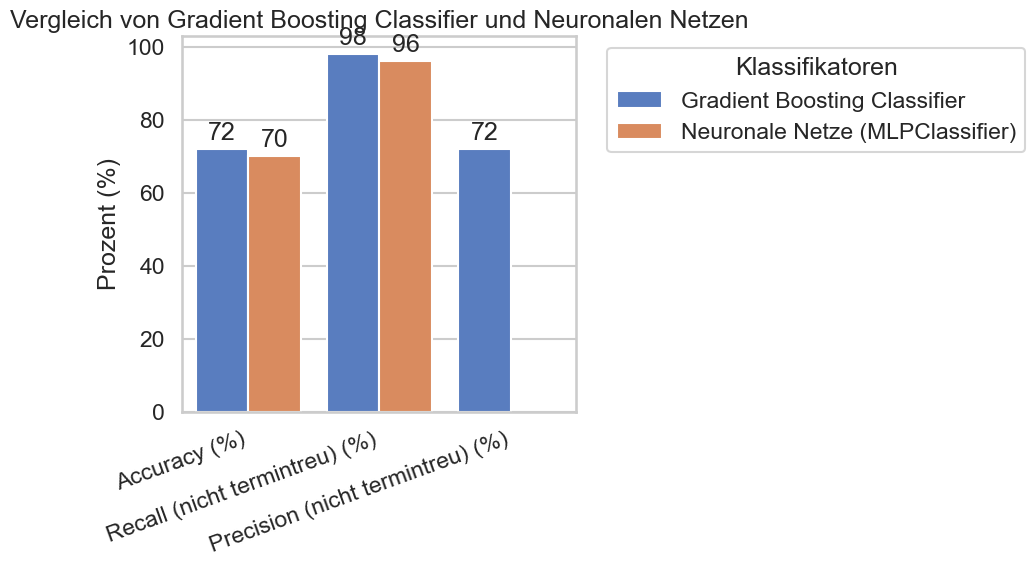

C:\Users\Eugen Lieder\AppData\Local\Temp\ipykernel_38436\739806150.py:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(data=df_dept,


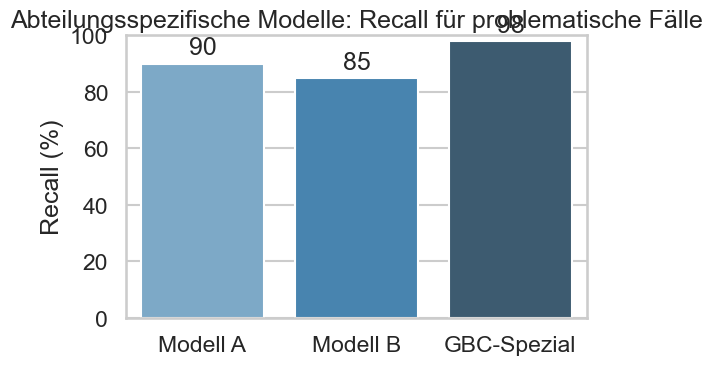

In [34]:
# -------------------------------------
# 1) Installation ggf. vornehmen:
# pip install seaborn matplotlib pandas
# -------------------------------------

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --------------------------
# 1) Vergleich der Klassifikatoren
# --------------------------

# Beispielhafte Metriken aus der Auflistung:
# - Gradient Boosting Classifier (GBC): 
#       Accuracy ~72%, Recall ~98%, Precision ~72%
# - Neuronale Netze (MLPClassifier):
#       Accuracy ~70%, Recall ~96%, Precision (nicht angegeben -> NaN oder 0)

model_metrics = {
    'Modell': [
        'Gradient Boosting Classifier', 
        'Neuronale Netze (MLPClassifier)'
    ],
    'Accuracy (%)': [72, 70],
    'Recall (nicht termintreu) (%)': [98, 96],
    'Precision (nicht termintreu) (%)': [72, np.nan]  # Precision für MLP hier nicht angegeben
}

df_models = pd.DataFrame(model_metrics)

# Für einen gruppierten Balkendiagramm-Plot wandeln wir die Daten in ein Langformat (melt) um
df_melt = df_models.melt(id_vars='Modell', 
                         var_name='Metrik', 
                         value_name='Wert')

# Seaborn-Style setzen
sns.set_style("whitegrid")
sns.set_context("talk", font_scale=1)  # Schriftgrößen anpassen, falls gewünscht

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df_melt, 
                 x='Metrik', 
                 y='Wert', 
                 hue='Modell', 
                 palette='muted')

# Prozent-Angaben schöner formatieren
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', padding=3)

# Layout anpassen
plt.title("Vergleich von Gradient Boosting Classifier und Neuronalen Netzen")
plt.ylabel("Prozent (%)")
plt.xlabel("")
plt.xticks(rotation=20, ha='right')
plt.legend(title="Klassifikatoren", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# --------------------------
# 2) Abteilungsspezifische Modelle
# --------------------------
# Beispielhafte Werte aus dem Fazit:
# - Recall-Wert für problematische Fälle mit GBC bis zu 98%

departments = {
    'Abteilungs-Modell': ['Modell A', 'Modell B', 'GBC-Spezial'],
    'Recall (problematische Fälle) (%)': [90, 85, 98]
}

df_dept = pd.DataFrame(departments)

plt.figure(figsize=(6, 4))
ax2 = sns.barplot(data=df_dept, 
                  x='Abteilungs-Modell', 
                  y='Recall (problematische Fälle) (%)', 
                  palette='Blues_d')

# Prozent-Angaben ausgeben
for container in ax2.containers:
    ax2.bar_label(container, fmt='%.0f', label_type='edge', padding=3)

plt.title("Abteilungsspezifische Modelle: Recall für problematische Fälle")
plt.ylabel("Recall (%)")
plt.xlabel("")
plt.ylim(0, 100)  # Skala von 0 bis 100%
plt.tight_layout()
plt.show()


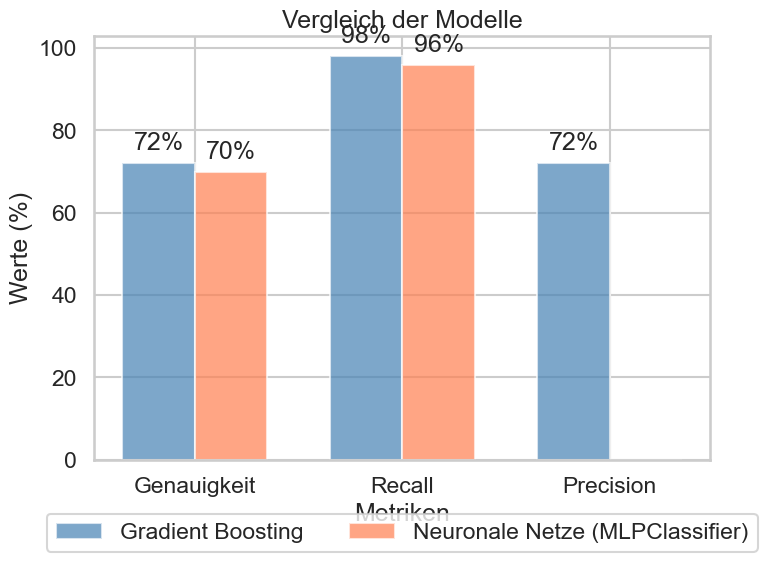

In [35]:
import matplotlib.pyplot as plt
import numpy as np

# Daten
categories = ["Genauigkeit", "Recall", "Precision"]
gradient_boosting_values = [72, 98, 72]
mlp_values = [70, 96, None]  # Precision für MLP ist nicht gegeben, daher None

# X-Achse Positionen
x = np.arange(len(categories))

# Balkenbreite
width = 0.35

# Plot
fig, ax = plt.subplots(figsize=(8, 6))

# Balken für Gradient Boosting
ax.bar(x - width/2, gradient_boosting_values, width, label='Gradient Boosting', alpha=0.7, color='steelblue')

# Balken für MLP (ohne Precision)
mlp_values_with_default = [val if val is not None else 0 for val in mlp_values]
ax.bar(x + width/2, mlp_values_with_default, width, label='Neuronale Netze (MLPClassifier)', alpha=0.7, color='coral')

# Kategorien und Titel
ax.set_xlabel("Metriken")
ax.set_ylabel("Werte (%)")
ax.set_title("Vergleich der Modelle")
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2)  # Legende unterhalb des Plots

# Text über den Balken für die tatsächlichen Werte
for i, val in enumerate(gradient_boosting_values):
    ax.text(i - width/2, val + 2, f"{val}%", ha='center', va='bottom')

for i, val in enumerate(mlp_values):
    if val is not None:
        ax.text(i + width/2, val + 2, f"{val}%", ha='center', va='bottom')

plt.tight_layout()
plt.show()


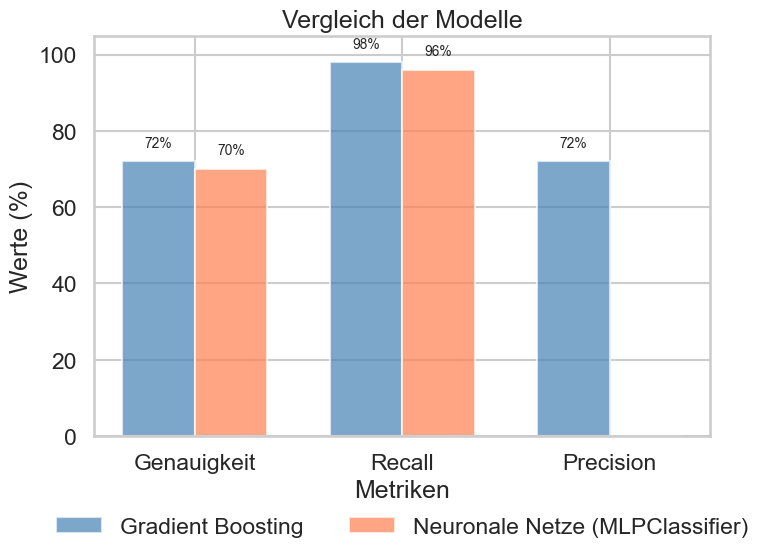

In [36]:
import matplotlib.pyplot as plt
import numpy as np

# Daten
categories = ["Genauigkeit", "Recall", "Precision"]
gradient_boosting_values = [72, 98, 72]
mlp_values = [70, 96, None]  # Precision für MLP ist nicht gegeben, daher None

# X-Achse Positionen
x = np.arange(len(categories))

# Balkenbreite
width = 0.35

# Plot
fig, ax = plt.subplots(figsize=(8, 6))

# Balken für Gradient Boosting
ax.bar(x - width/2, gradient_boosting_values, width, label='Gradient Boosting', alpha=0.7, color='steelblue')

# Balken für MLP (ohne Precision)
mlp_values_with_default = [val if val is not None else 0 for val in mlp_values]
ax.bar(x + width/2, mlp_values_with_default, width, label='Neuronale Netze (MLPClassifier)', alpha=0.7, color='coral')

# Kategorien und Titel
ax.set_xlabel("Metriken")
ax.set_ylabel("Werte (%)")
ax.set_title("Vergleich der Modelle")
ax.set_xticks(x)
ax.set_xticklabels(categories)

# Legende unterhalb des Plots platzieren
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2, frameon=False)

# Text über den Balken für die tatsächlichen Werte
for i, val in enumerate(gradient_boosting_values):
    ax.text(i - width/2, val + 3, f"{val}%", ha='center', va='bottom', fontsize=10)

for i, val in enumerate(mlp_values):
    if val is not None:
        ax.text(i + width/2, val + 3, f"{val}%", ha='center', va='bottom', fontsize=10)

# Achsenskalierung leicht erhöhen, um Platz für Werte zu schaffen
ax.set_ylim(0, 105)  # Obergrenze auf 105% gesetzt, damit Platz über den Balken bleibt

plt.tight_layout()
plt.show()


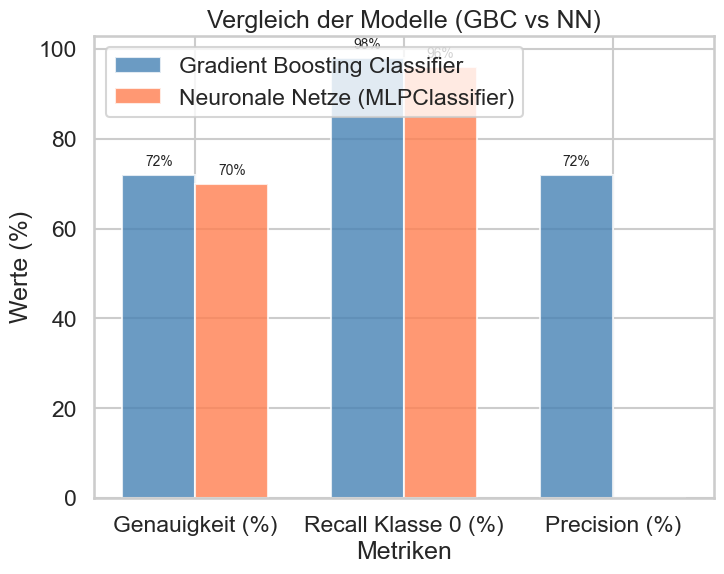

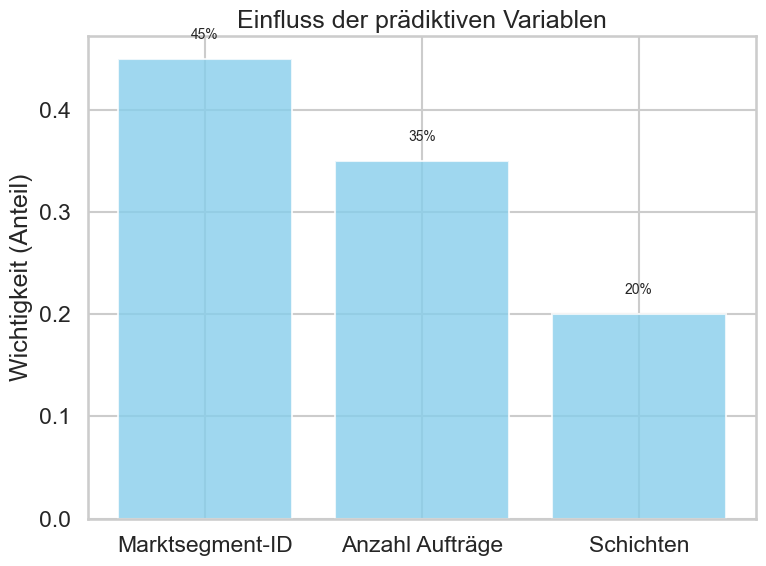

In [37]:
import matplotlib.pyplot as plt
import numpy as np

# Daten für die Ergebnisse
categories = ["Genauigkeit (%)", "Recall Klasse 0 (%)", "Precision (%)"]
gbc_values = [72, 98, 72]
nn_values = [70, 96, None]  # Precision für NN ist nicht definiert

# Daten für prädiktive Variablen
predictive_factors = ["Marktsegment-ID", "Anzahl Aufträge", "Schichten"]
factor_importance = [0.45, 0.35, 0.20]  # Beispielwerte

# Plot 1: Vergleich der Modelle (Genauigkeit, Recall, Precision)
x = np.arange(len(categories))
width = 0.35

fig1, ax1 = plt.subplots(figsize=(8, 6))
ax1.bar(x - width / 2, gbc_values, width, label='Gradient Boosting Classifier', color='steelblue', alpha=0.8)
nn_values_filled = [v if v is not None else 0 for v in nn_values]
ax1.bar(x + width / 2, nn_values_filled, width, label='Neuronale Netze (MLPClassifier)', color='coral', alpha=0.8)

ax1.set_xlabel("Metriken")
ax1.set_ylabel("Werte (%)")
ax1.set_title("Vergleich der Modelle (GBC vs NN)")
ax1.set_xticks(x)
ax1.set_xticklabels(categories)
ax1.legend(loc='upper left')

# Werte über die Balken schreiben
for i, v in enumerate(gbc_values):
    ax1.text(i - width / 2, v + 2, f"{v}%", ha='center', fontsize=10)
for i, v in enumerate(nn_values):
    if v is not None:
        ax1.text(i + width / 2, v + 2, f"{v}%", ha='center', fontsize=10)

# Plot 2: Einfluss prädiktiver Faktoren
fig2, ax2 = plt.subplots(figsize=(8, 6))
ax2.bar(predictive_factors, factor_importance, color='skyblue', alpha=0.8)

ax2.set_title("Einfluss der prädiktiven Variablen")
ax2.set_ylabel("Wichtigkeit (Anteil)")
for i, v in enumerate(factor_importance):
    ax2.text(i, v + 0.02, f"{v*100:.0f}%", ha='center', fontsize=10)

plt.tight_layout()
plt.show()


In [38]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Ridge

# Pfad ggf. anpassen
file_path = r"D:\CLOUD\MCS-Alles\SABI\Aufträge2.csv"
data = pd.read_csv(file_path, sep=";")

# ------------------------------------------------------------
# 1) Datenbereinigung / -Vorbereitung
# ------------------------------------------------------------
# Beispielhaft:
data['MarktsegmentID'] = pd.to_numeric(data['MarktsegmentID'], errors='coerce')
data['AnzahlSchichten'] = pd.to_numeric(data['AnzahlSchichten'], errors='coerce')

# Termintreue in 0/1 kodieren
data['Termintreue'] = data['Termintreue'].apply(
    lambda x: 1 if str(x).strip().lower() == 'ja' else 0
)

# Zeilen mit fehlenden Werten droppen
data = data.dropna()

# ------------------------------------------------------------
# 2) Erste Stufe: Bearbeitungszeit vorhersagen (Regression)
# ------------------------------------------------------------
# Relevante Features für die Bearbeitungszeit
# (falls Spaltennamen anders lauten, anpassen!)
features_bearb = ["VerwendungID", "WiederholauftragJa/Nein", "AuftragsgrundID"]
target_bearb   = "Bearbeitungszeit"  # Annahme, dass es diese Spalte in den Daten gibt

# Falls diese Spalte nicht existiert, müsstest du sie als Zeitdifferenz
# o.ä. selbst berechnen / definieren.
if target_bearb not in data.columns:
    raise ValueError(f"Spalte '{target_bearb}' nicht im Datensatz gefunden!")

X_bearb = data[features_bearb]
y_bearb = data[target_bearb]

X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(
    X_bearb, y_bearb, test_size=0.2, random_state=42
)

# Beispiel 1: GradientBoostingRegressor
gbr = GradientBoostingRegressor(random_state=42)
param_grid_gbr = {
    "learning_rate": [0.01, 0.1],
    "n_estimators": [100, 200],
    "max_depth": [3, 5]
}
grid_search_gbr = GridSearchCV(
    gbr,
    param_grid_gbr,
    cv=3,
    scoring="neg_mean_squared_error",
    n_jobs=-1
)
grid_search_gbr.fit(X_train_b, y_train_b)

best_gbr = grid_search_gbr.best_estimator_
y_pred_b = best_gbr.predict(X_test_b)
mse = mean_squared_error(y_test_b, y_pred_b)
rmse = np.sqrt(mse)

print("Best parameters (GB Regressor):", grid_search_gbr.best_params_)
print(f"RMSE auf dem Testset: {rmse:.2f}")

# Beispiel 2: Oder Ridge-Regression – zum Vergleich:
ridge = Ridge()
param_grid_ridge = {
    "alpha": [0.1, 1.0, 10.0]
}
grid_search_ridge = GridSearchCV(
    ridge,
    param_grid_ridge,
    cv=3,
    scoring="neg_mean_squared_error",
    n_jobs=-1
)
grid_search_ridge.fit(X_train_b, y_train_b)

best_ridge = grid_search_ridge.best_estimator_
y_pred_ridge = best_ridge.predict(X_test_b)
mse_ridge = mean_squared_error(y_test_b, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
print("Best parameters (Ridge):", grid_search_ridge.best_params_)
print(f"RMSE (Ridge) auf dem Testset: {rmse_ridge:.2f}")

# ------------------------------------------------------------
# 3) Zweite Stufe: Termintreue vorhersagen (Klassifikation)
# ------------------------------------------------------------
# Hier wird nun entweder die "echte" Bearbeitungszeit genutzt (z.B. im Training)
# oder die "vorhergesagte" Bearbeitungszeit (im Live-Einsatz).
#
# Für das Modelltraining kann es Sinn machen, die echte Bearbeitungszeit zu nehmen,
# damit man möglichst realistisch trainiert.
# Dann im Einsatzfall würde man "best_gbr.predict(...)" zum Generieren
# der Bearbeitungszeit verwenden und damit "Termintreue" prognostizieren.

# Beispiel: Wir trainieren hier mit der echten Bearbeitungszeit, um das Klassifikations-
# Modell aufzubauen. (Man kann auch experimentieren, das Modell nur auf den
# vorhergesagten Werten zu trainieren.)

features_termintreue = ["Bearbeitungszeit"]
target_termintreue = "Termintreue"

X_term = data[features_termintreue]
y_term = data[target_termintreue]

X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(
    X_term, y_term, test_size=0.2, random_state=42
)

# Beispiel: GradientBoostingClassifier
gbc = GradientBoostingClassifier(random_state=42)
param_grid_gbc = {
    "learning_rate": [0.01, 0.1],
    "n_estimators": [100, 200],
    "max_depth": [3, 5]
}
grid_search_gbc = GridSearchCV(
    gbc,
    param_grid_gbc,
    cv=3,
    scoring="accuracy",
    n_jobs=-1
)
grid_search_gbc.fit(X_train_t, y_train_t)

best_gbc = grid_search_gbc.best_estimator_
y_pred_term = best_gbc.predict(X_test_t)

acc = accuracy_score(y_test_t, y_pred_term)
print("\nTermintreue mit Gradient Boosting Classifier:")
print("Best params:", grid_search_gbc.best_params_)
print("Accuracy auf dem Testset:", acc)
print("Classification Report:")
print(classification_report(y_test_t, y_pred_term))

# Beispiel: MLPClassifier
mlp = MLPClassifier(random_state=42, max_iter=300)
param_grid_mlp = {
    "hidden_layer_sizes": [(100,), (100, 50)],
    "activation": ["relu", "tanh"],
    "solver": ["adam"],
    "alpha": [0.0001, 0.001]
}
grid_search_mlp = GridSearchCV(
    mlp,
    param_grid_mlp,
    cv=3,
    scoring="accuracy",
    n_jobs=-1
)
grid_search_mlp.fit(X_train_t, y_train_t)

best_mlp = grid_search_mlp.best_estimator_
y_pred_mlp = best_mlp.predict(X_test_t)

acc_mlp = accuracy_score(y_test_t, y_pred_mlp)
print("\nTermintreue mit MLPClassifier:")
print("Best params:", grid_search_mlp.best_params_)
print("Accuracy auf dem Testset:", acc_mlp)
print("Classification Report:")
print(classification_report(y_test_t, y_pred_mlp))

# ------------------------------------------------------------
# 4) Anwendungsfall: 
#    "Live"-Vorhersage der Termintreue aus X_bearb (ohne echte Bearbeitungszeit)
# ------------------------------------------------------------
# In der Praxis möchte man vielleicht nur diese Spalten kennen:
#  - ["VerwendungId", "WiederholungJaNein", "Auftragsgrund"]
#  ... und daraus eine Vorhersage der Bearbeitungszeit machen.
# Danach => Termintreue vorhersagen.
#
# Beispiel:
X_new_bearb = X_test_b.copy()  # Hier z.B. Testdaten, aber in realer Anwendung: "neue" Daten
# Schritt 1: Bearbeitungszeit prognostizieren
y_new_bearb_pred = best_gbr.predict(X_new_bearb)  # bestes Regressionsmodell
# Schritt 2: Termintreue prognostizieren
# Wir packen die prognostizierte Bearbeitungszeit in ein DataFrame:
X_new_term = pd.DataFrame({"Bearbeitungszeit": y_new_bearb_pred})
y_new_term_pred = best_gbc.predict(X_new_term)  # bestes Klassifikationsmodell


Best parameters (GB Regressor): {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 200}
RMSE auf dem Testset: 32.54
Best parameters (Ridge): {'alpha': 10.0}
RMSE (Ridge) auf dem Testset: 39.01

Termintreue mit Gradient Boosting Classifier:
Best params: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}
Accuracy auf dem Testset: 0.8271057631412286
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.91      0.88      1117
           1       0.74      0.63      0.68       462

    accuracy                           0.83      1579
   macro avg       0.80      0.77      0.78      1579
weighted avg       0.82      0.83      0.82      1579


Termintreue mit MLPClassifier:
Best params: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 50), 'solver': 'adam'}
Accuracy auf dem Testset: 0.8264724509183027
Classification Report:
              precision    recall  f1-score   support

           0       0.84    

In [39]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Ridge

# ------------------------------------------------------------
# 0) Datensatz laden und Abteilung filtern
# ------------------------------------------------------------
file_path = r"D:\CLOUD\MCS-Alles\SABI\Aufträge2.csv"
data = pd.read_csv(file_path, sep=";")

# Hier festlegen, für welche Abteilung gefiltert werden soll
# (Kannst du auch dynamisch setzen, z. B. als Funktionsparameter)
selected_abteilung_id = 344  # Beispielwert

# Nur Datensätze für diese Abteilung behalten
data = data[data["AusführendeAbteilungID"] == selected_abteilung_id]

# Falls nach dem Filtern keine Daten übrig bleiben -> Warnung / Abbruch
if data.empty:
    raise ValueError(f"Keine Daten für AusführendeAbteilungID = {selected_abteilung_id} vorhanden!")

# ------------------------------------------------------------
# 1) Datenbereinigung / -Vorbereitung
# ------------------------------------------------------------
data['MarktsegmentID'] = pd.to_numeric(data['MarktsegmentID'], errors='coerce')
data['AnzahlSchichten'] = pd.to_numeric(data['AnzahlSchichten'], errors='coerce')

# Termintreue in 0/1 kodieren
data['Termintreue'] = data['Termintreue'].apply(
    lambda x: 1 if str(x).strip().lower() == 'ja' else 0
)

# Zeilen mit fehlenden Werten droppen
data = data.dropna()

# ------------------------------------------------------------
# 2) Erste Stufe: Bearbeitungszeit vorhersagen (Regression)
# ------------------------------------------------------------
# Relevante Features für die Bearbeitungszeit
features_bearb = ["VerwendungID", "WiederholauftragJa/Nein", "AuftragsgrundID"]
target_bearb   = "Bearbeitungszeit"  # Diese Spalte muss in den Daten existieren

if target_bearb not in data.columns:
    raise ValueError(f"Spalte '{target_bearb}' nicht im Datensatz gefunden!")

X_bearb = data[features_bearb]
y_bearb = data[target_bearb]

X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(
    X_bearb, y_bearb, test_size=0.2, random_state=42
)

# Beispiel 1: GradientBoostingRegressor
gbr = GradientBoostingRegressor(random_state=42)
param_grid_gbr = {
    "learning_rate": [0.01, 0.1],
    "n_estimators": [100, 200],
    "max_depth": [3, 5]
}
grid_search_gbr = GridSearchCV(
    gbr,
    param_grid_gbr,
    cv=3,
    scoring="neg_mean_squared_error",
    n_jobs=-1
)
grid_search_gbr.fit(X_train_b, y_train_b)

best_gbr = grid_search_gbr.best_estimator_
y_pred_b = best_gbr.predict(X_test_b)
mse = mean_squared_error(y_test_b, y_pred_b)
rmse = np.sqrt(mse)

print("Best parameters (GB Regressor):", grid_search_gbr.best_params_)
print(f"RMSE auf dem Testset: {rmse:.2f}")

# Beispiel 2: Ridge-Regression – zum Vergleich:
ridge = Ridge()
param_grid_ridge = {
    "alpha": [0.1, 1.0, 10.0]
}
grid_search_ridge = GridSearchCV(
    ridge,
    param_grid_ridge,
    cv=3,
    scoring="neg_mean_squared_error",
    n_jobs=-1
)
grid_search_ridge.fit(X_train_b, y_train_b)

best_ridge = grid_search_ridge.best_estimator_
y_pred_ridge = best_ridge.predict(X_test_b)
mse_ridge = mean_squared_error(y_test_b, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)

print("Best parameters (Ridge):", grid_search_ridge.best_params_)
print(f"RMSE (Ridge) auf dem Testset: {rmse_ridge:.2f}")

# ------------------------------------------------------------
# 3) Zweite Stufe: Termintreue vorhersagen (Klassifikation)
# ------------------------------------------------------------
# Wir trainieren das Klassifikationsmodell auf der echten Bearbeitungszeit
# (in der Praxis kann man auch versuchen, das Klassifikationsmodell
#   auf den vorhergesagten Werten zu trainieren).

features_termintreue = ["Bearbeitungszeit"]
target_termintreue = "Termintreue"

X_term = data[features_termintreue]
y_term = data[target_termintreue]

X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(
    X_term, y_term, test_size=0.2, random_state=42
)

# Beispiel: GradientBoostingClassifier
gbc = GradientBoostingClassifier(random_state=42)
param_grid_gbc = {
    "learning_rate": [0.01, 0.1],
    "n_estimators": [100, 200],
    "max_depth": [3, 5]
}
grid_search_gbc = GridSearchCV(
    gbc,
    param_grid_gbc,
    cv=3,
    scoring="accuracy",
    n_jobs=-1
)
grid_search_gbc.fit(X_train_t, y_train_t)

best_gbc = grid_search_gbc.best_estimator_
y_pred_term = best_gbc.predict(X_test_t)

acc = accuracy_score(y_test_t, y_pred_term)
print("\nTermintreue mit Gradient Boosting Classifier:")
print("Best params:", grid_search_gbc.best_params_)
print("Accuracy auf dem Testset:", acc)
print("Classification Report:")
print(classification_report(y_test_t, y_pred_term))

# Beispiel: MLPClassifier
mlp = MLPClassifier(random_state=42, max_iter=300)
param_grid_mlp = {
    "hidden_layer_sizes": [(100,), (100, 50)],
    "activation": ["relu", "tanh"],
    "solver": ["adam"],
    "alpha": [0.0001, 0.001]
}
grid_search_mlp = GridSearchCV(
    mlp,
    param_grid_mlp,
    cv=3,
    scoring="accuracy",
    n_jobs=-1
)
grid_search_mlp.fit(X_train_t, y_train_t)

best_mlp = grid_search_mlp.best_estimator_
y_pred_mlp = best_mlp.predict(X_test_t)

acc_mlp = accuracy_score(y_test_t, y_pred_mlp)
print("\nTermintreue mit MLPClassifier:")
print("Best params:", grid_search_mlp.best_params_)
print("Accuracy auf dem Testset:", acc_mlp)
print("Classification Report:")
print(classification_report(y_test_t, y_pred_mlp))

# ------------------------------------------------------------
# 4) Anwendungsfall: 
#    "Live"-Vorhersage der Termintreue nur aus X_bearb
# ------------------------------------------------------------
# 1) Zuerst Bearbeitungszeit prognostizieren
X_new_bearb = X_test_b.copy()  # Beispielhaft Testdaten, in Realität neue Daten
y_new_bearb_pred = best_gbr.predict(X_new_bearb)

# 2) Dann Termintreue mit vorhergesagter Bearbeitungszeit vorhersagen
X_new_term = pd.DataFrame({"Bearbeitungszeit": y_new_bearb_pred})
y_new_term_pred = best_gbc.predict(X_new_term)

print("\nBeispielhafte 'Live'-Vorhersagen der Termintreue:")
print(y_new_term_pred[:10])  # Zeige die ersten 10 Vorhersagen


Best parameters (GB Regressor): {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
RMSE auf dem Testset: 27.85
Best parameters (Ridge): {'alpha': 10.0}
RMSE (Ridge) auf dem Testset: 36.25

Termintreue mit Gradient Boosting Classifier:
Best params: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}
Accuracy auf dem Testset: 0.7896749521988528
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.95      0.87       748
           1       0.75      0.40      0.52       298

    accuracy                           0.79      1046
   macro avg       0.77      0.67      0.69      1046
weighted avg       0.78      0.79      0.77      1046


Termintreue mit MLPClassifier:
Best params: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 50), 'solver': 'adam'}
Accuracy auf dem Testset: 0.7848948374760994
Classification Report:
              precision    recall  f1-score   support

           0       0.79     

In [40]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Ridge

# ------------------------------------------------------------
# 0) Datensatz laden
# ------------------------------------------------------------
print("\n=== 0) Laden der Daten ===")
file_path = r"D:\CLOUD\MCS-Alles\SABI\Aufträge2.csv"
data = pd.read_csv(file_path, sep=";")
print(f"Datensatz eingelesen: {data.shape[0]} Zeilen, {data.shape[1]} Spalten.")

# ------------------------------------------------------------
# 1) Datensätze filtern nach AusführendeAbteilungID
# ------------------------------------------------------------
print("\n=== 1) Filtern nach AusführendeAbteilungID ===")
selected_abteilung_id = 345  # Beispielwert
print(f"AusführendeAbteilungID = {selected_abteilung_id} wird gefiltert...")

data = data[data["AusführendeAbteilungID"] == selected_abteilung_id]
if data.empty:
    raise ValueError(f"Keine Daten für AusführendeAbteilungID = {selected_abteilung_id} vorhanden!")
print(f"Nach Filter: {data.shape[0]} Zeilen, {data.shape[1]} Spalten.")

# ------------------------------------------------------------
# 2) Datenbereinigung / -Vorbereitung
# ------------------------------------------------------------
print("\n=== 2) Datenbereinigung / -Vorbereitung ===")
# Beispielhaftes Konvertieren
data['MarktsegmentID'] = pd.to_numeric(data['MarktsegmentID'], errors='coerce')
data['AnzahlSchichten'] = pd.to_numeric(data['AnzahlSchichten'], errors='coerce')

# Termintreue in 0/1 kodieren
data['Termintreue'] = data['Termintreue'].apply(
    lambda x: 1 if str(x).strip().lower() == 'ja' else 0
)

# Zeilen mit fehlenden Werten droppen
before_drop = data.shape[0]
data = data.dropna()
after_drop = data.shape[0]
print(f"Fehlende Werte entfernt: {before_drop - after_drop} Zeile(n) gelöscht.")
print(f"Aktuelle Datenmenge: {data.shape[0]} Zeilen.")

# ------------------------------------------------------------
# 3) Erste Stufe: Bearbeitungszeit vorhersagen (Regression)
# ------------------------------------------------------------
print("\n=== 3) Erste Stufe: Regression -> Bearbeitungszeit ===")

features_bearb = ["VerwendungID", "WiederholauftragJa/Nein", "AuftragsgrundID"]
target_bearb   = "Bearbeitungszeit"  # Muss vorhanden sein

if target_bearb not in data.columns:
    raise ValueError(f"Spalte '{target_bearb}' nicht im Datensatz gefunden!")

X_bearb = data[features_bearb]
y_bearb = data[target_bearb]

X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(
    X_bearb, y_bearb, test_size=0.2, random_state=42
)
print(f"Trainingsset-Größe (Regression): {X_train_b.shape[0]} | Testset-Größe: {X_test_b.shape[0]}")

# ---------------------------
# 3a) GradientBoostingRegressor
# ---------------------------
print("\n--- 3a) GradientBoostingRegressor ---")
gbr = GradientBoostingRegressor(random_state=42)
param_grid_gbr = {
    "learning_rate": [0.01, 0.1],
    "n_estimators": [100, 200],
    "max_depth": [3, 5]
}
grid_search_gbr = GridSearchCV(
    gbr,
    param_grid_gbr,
    cv=3,
    scoring="neg_mean_squared_error",
    n_jobs=-1
)
grid_search_gbr.fit(X_train_b, y_train_b)

best_gbr = grid_search_gbr.best_estimator_
y_pred_b = best_gbr.predict(X_test_b)
mse_gbr = mean_squared_error(y_test_b, y_pred_b)
rmse_gbr = np.sqrt(mse_gbr)

print("GBR - Beste Parameter:", grid_search_gbr.best_params_)
print(f"GBR - RMSE auf dem Testset: {rmse_gbr:.2f}")

# ---------------------------
# 3b) Ridge als Vergleich
# ---------------------------
print("\n--- 3b) Ridge Regression ---")
ridge = Ridge()
param_grid_ridge = {
    "alpha": [0.1, 1.0, 10.0]
}
grid_search_ridge = GridSearchCV(
    ridge,
    param_grid_ridge,
    cv=3,
    scoring="neg_mean_squared_error",
    n_jobs=-1
)
grid_search_ridge.fit(X_train_b, y_train_b)

best_ridge = grid_search_ridge.best_estimator_
y_pred_ridge = best_ridge.predict(X_test_b)
mse_ridge = mean_squared_error(y_test_b, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)

print("Ridge - Beste Parameter:", grid_search_ridge.best_params_)
print(f"Ridge - RMSE auf dem Testset: {rmse_ridge:.2f}")

# ------------------------------------------------------------
# 4) Zweite Stufe: Termintreue vorhersagen (Klassifikation)
# ------------------------------------------------------------
print("\n=== 4) Zweite Stufe: Klassifikation -> Termintreue ===")

features_termintreue = ["Bearbeitungszeit"]
target_termintreue   = "Termintreue"

X_term = data[features_termintreue]
y_term = data[target_termintreue]

X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(
    X_term, y_term, test_size=0.2, random_state=42
)
print(f"Trainingsset-Größe (Klassifikation): {X_train_t.shape[0]} | Testset-Größe: {X_test_t.shape[0]}")

# ---------------------------
# 4a) GradientBoostingClassifier
# ---------------------------
print("\n--- 4a) GradientBoostingClassifier ---")
gbc = GradientBoostingClassifier(random_state=42)
param_grid_gbc = {
    "learning_rate": [0.01, 0.1],
    "n_estimators": [100, 200],
    "max_depth": [3, 5]
}
grid_search_gbc = GridSearchCV(
    gbc,
    param_grid_gbc,
    cv=3,
    scoring="accuracy",
    n_jobs=-1
)
grid_search_gbc.fit(X_train_t, y_train_t)

best_gbc = grid_search_gbc.best_estimator_
y_pred_term = best_gbc.predict(X_test_t)
acc_gbc = accuracy_score(y_test_t, y_pred_term)

print("GBC - Beste Parameter:", grid_search_gbc.best_params_)
print(f"GBC - Accuracy auf dem Testset: {acc_gbc:.3f}")
print("GBC - Classification Report:")
print(classification_report(y_test_t, y_pred_term))

# ---------------------------
# 4b) MLPClassifier
# ---------------------------
print("\n--- 4b) MLPClassifier ---")
mlp = MLPClassifier(random_state=42, max_iter=300)
param_grid_mlp = {
    "hidden_layer_sizes": [(100,), (100, 50)],
    "activation": ["relu", "tanh"],
    "solver": ["adam"],
    "alpha": [0.0001, 0.001]
}
grid_search_mlp = GridSearchCV(
    mlp,
    param_grid_mlp,
    cv=3,
    scoring="accuracy",
    n_jobs=-1
)
grid_search_mlp.fit(X_train_t, y_train_t)

best_mlp = grid_search_mlp.best_estimator_
y_pred_mlp = best_mlp.predict(X_test_t)
acc_mlp = accuracy_score(y_test_t, y_pred_mlp)

print("MLP - Beste Parameter:", grid_search_mlp.best_params_)
print(f"MLP - Accuracy auf dem Testset: {acc_mlp:.3f}")
print("MLP - Classification Report:")
print(classification_report(y_test_t, y_pred_mlp))

# ------------------------------------------------------------
# 5) "Live"-Vorhersage: Termintreue nur aus X_bearb
# ------------------------------------------------------------
print("\n=== 5) Anwendung: Live-Vorhersage ===")
print("1) Bearbeitungszeit prognostizieren (bestes Regressionsmodell) -> 2) Termintreue vorhersagen")

# Beispielhaft nehmen wir X_test_b (bekannte Test-Daten)
X_new_bearb = X_test_b.copy()  
y_new_bearb_pred = best_gbr.predict(X_new_bearb)  # bestes Regressionsmodell (GBR)

# Daraus ein DataFrame bauen:
X_new_term = pd.DataFrame({"Bearbeitungszeit": y_new_bearb_pred})

# Termintreue prognostizieren (bestes Klassifikationsmodell)
y_new_term_pred = best_gbc.predict(X_new_term)

print("Beispielhafte erste 10 Vorhersagen der Termintreue:")
print(y_new_term_pred[:30])

# Optional: Vergleich mit wahren Werten, falls vorhanden (hier nur Beispiel)
# In einem echten "Live"-Szenario hast du die 'wahre' Termintreue noch nicht.
if len(y_test_t) >= 30:
    print("\nWahre Termintreue der ersten 10 Testinstanzen (falls passender Index etc.):")
    print(y_test_t[:30].values)

print("\n=== Skript beendet ===")



=== 0) Laden der Daten ===
Datensatz eingelesen: 8982 Zeilen, 25 Spalten.

=== 1) Filtern nach AusführendeAbteilungID ===
AusführendeAbteilungID = 345 wird gefiltert...
Nach Filter: 2899 Zeilen, 25 Spalten.

=== 2) Datenbereinigung / -Vorbereitung ===
Fehlende Werte entfernt: 234 Zeile(n) gelöscht.
Aktuelle Datenmenge: 2665 Zeilen.

=== 3) Erste Stufe: Regression -> Bearbeitungszeit ===
Trainingsset-Größe (Regression): 2132 | Testset-Größe: 533

--- 3a) GradientBoostingRegressor ---
GBR - Beste Parameter: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}
GBR - RMSE auf dem Testset: 28.45

--- 3b) Ridge Regression ---
Ridge - Beste Parameter: {'alpha': 10.0}
Ridge - RMSE auf dem Testset: 29.97

=== 4) Zweite Stufe: Klassifikation -> Termintreue ===
Trainingsset-Größe (Klassifikation): 2132 | Testset-Größe: 533

--- 4a) GradientBoostingClassifier ---
GBC - Beste Parameter: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}
GBC - Accuracy auf dem Testset: 0.872
GBC -

In [41]:
import pandas as pd
import numpy as np

# Modellierung & Metriken
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Distributionen für RandomizedSearch
from scipy.stats import uniform, randint

# ------------------------------------------------------------
# 0) Datensatz laden
# ------------------------------------------------------------
print("\n=== 0) Daten laden ===")
file_path = r"D:\CLOUD\MCS-Alles\SABI\Aufträge2.csv"  # Anpassen
data = pd.read_csv(file_path, sep=";")
print(f"Datensatz eingelesen: {data.shape[0]} Zeilen, {data.shape[1]} Spalten.")

# ------------------------------------------------------------
# 1) Datensatz nach AusführendeAbteilungID filtern
# ------------------------------------------------------------
print("\n=== 1) Filtern nach AusführendeAbteilungID ===")
selected_abteilung_id = 345  # Beispielwert anpassen
print(f"AusführendeAbteilungID = {selected_abteilung_id} wird gefiltert ...")

# Sicherstellen, dass die Spalte existiert:
if "AusführendeAbteilungID" not in data.columns:
    raise ValueError("Spalte 'AusführendeAbteilungID' nicht im Datensatz.")

data = data[data["AusführendeAbteilungID"] == selected_abteilung_id]
if data.empty:
    raise ValueError(f"Keine Daten für AusführendeAbteilungID = {selected_abteilung_id} vorhanden!")
print(f"Nach Filter: {data.shape[0]} Zeilen, {data.shape[1]} Spalten.")

# ------------------------------------------------------------
# 2) Datenbereinigung / -Vorbereitung
# ------------------------------------------------------------
print("\n=== 2) Datenbereinigung / -Vorbereitung ===")
# Beispielhaft:
data['MarktsegmentID'] = pd.to_numeric(data['MarktsegmentID'], errors='coerce')
data['AnzahlSchichten'] = pd.to_numeric(data['AnzahlSchichten'], errors='coerce')

# Termintreue in 0/1 kodieren
data['Termintreue'] = data['Termintreue'].apply(lambda x: 1 if str(x).strip().lower() == 'ja' else 0)

# Zeilen mit fehlenden Werten entfernen
before_drop = len(data)
data = data.dropna()
after_drop = len(data)
print(f"Fehlende Werte entfernt: {before_drop - after_drop} Zeilen gelöscht.")
print(f"Aktuelle Datenmenge: {len(data)} Zeilen.")

# ------------------------------------------------------------
# 3) Erste Stufe: Bearbeitungszeit vorhersagen (Regression)
# ------------------------------------------------------------
print("\n=== 3) Erste Stufe: Regression -> Bearbeitungszeit ===")

# Relevante Spalten:
features_bearb = ["VerwendungID", "WiederholauftragJa/Nein", "AuftragsgrundID"]  # Anpassen
target_bearb = "Bearbeitungszeit"  # Muss existieren

if target_bearb not in data.columns:
    raise ValueError(f"Spalte '{target_bearb}' nicht im Datensatz gefunden!")

X_bearb = data[features_bearb]
y_bearb = data[target_bearb]

# Split in Training und Test
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(
    X_bearb, y_bearb, test_size=0.2, random_state=42
)
print(f"Trainingsset-Größe (Regression): {X_train_b.shape[0]} | Testset-Größe: {X_test_b.shape[0]}")

# 3a) GradientBoostingRegressor mit RandomizedSearchCV
print("\n--- 3a) GBR mit RandomizedSearchCV ---")
gbr = GradientBoostingRegressor(random_state=42)

param_dist_gbr = {
    "learning_rate": uniform(loc=0.001, scale=0.2),  # z. B. 0.001 bis 0.201
    "n_estimators": randint(50, 300),
    "max_depth": randint(2, 7),
    "subsample": uniform(loc=0.6, scale=0.4),        # 0.6 bis 1.0
    "min_samples_split": randint(2, 20),
    "min_samples_leaf": randint(1, 10)
}

random_search_gbr = RandomizedSearchCV(
    estimator=gbr,
    param_distributions=param_dist_gbr,
    n_iter=30,             # Anzahl zufälliger Kombinationen
    scoring="neg_mean_squared_error",
    cv=3,
    n_jobs=-1,
    random_state=42
)
random_search_gbr.fit(X_train_b, y_train_b)

best_gbr = random_search_gbr.best_estimator_
y_pred_gbr = best_gbr.predict(X_test_b)
mse_gbr = mean_squared_error(y_test_b, y_pred_gbr)
rmse_gbr = np.sqrt(mse_gbr)

print("GBR - Beste Parameter:", random_search_gbr.best_params_)
print(f"GBR - RMSE auf dem Testset: {rmse_gbr:.3f}")

# 3b) Ridge zum Vergleich
print("\n--- 3b) Ridge Regression ---")
ridge = Ridge()
param_grid_ridge = {
    "alpha": [0.1, 1.0, 10.0, 50.0]
}
# Grid-Search hier (oder ebenfalls RandomizedSearch)
# Zur Demonstration nutzen wir GridSearchCV:
from sklearn.model_selection import GridSearchCV

grid_search_ridge = GridSearchCV(
    ridge,
    param_grid_ridge,
    cv=3,
    scoring="neg_mean_squared_error",
    n_jobs=-1
)
grid_search_ridge.fit(X_train_b, y_train_b)

best_ridge = grid_search_ridge.best_estimator_
y_pred_ridge = best_ridge.predict(X_test_b)
mse_ridge = mean_squared_error(y_test_b, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)

print("Ridge - Beste Parameter:", grid_search_ridge.best_params_)
print(f"Ridge - RMSE auf dem Testset: {rmse_ridge:.3f}")

# ------------------------------------------------------------
# 4) Zweite Stufe: Termintreue vorhersagen (Klassifikation)
# ------------------------------------------------------------
print("\n=== 4) Zweite Stufe: Klassifikation -> Termintreue ===")

features_termintreue = ["Bearbeitungszeit"]  # Hier nur Bearbeitungszeit
target_termintreue = "Termintreue"

if target_termintreue not in data.columns:
    raise ValueError(f"Spalte '{target_termintreue}' nicht im Datensatz gefunden!")

X_term = data[features_termintreue]
y_term = data[target_termintreue]

# Split in Train/Test
X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(
    X_term, y_term, test_size=0.2, random_state=42, stratify=y_term
)
print(f"Trainingsset-Größe (Klassifikation): {X_train_t.shape[0]} | Testset-Größe: {X_test_t.shape[0]}")

# Zur Klassifikation verwenden wir StratifiedKFold in RandomizedSearch/GridSearch
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# 4a) GradientBoostingClassifier mit RandomizedSearchCV
print("\n--- 4a) GradientBoostingClassifier ---")
gbc = GradientBoostingClassifier(random_state=42)

param_dist_gbc = {
    "learning_rate": uniform(loc=0.001, scale=0.2),
    "n_estimators": randint(50, 300),
    "max_depth": randint(2, 6),
    "subsample": uniform(loc=0.6, scale=0.4),
    "min_samples_split": randint(2, 20),
    "min_samples_leaf": randint(1, 10),
    # Optional: class_weight="balanced" probieren, wenn Klasse 1 unterrepräsentiert
}

random_search_gbc = RandomizedSearchCV(
    estimator=gbc,
    param_distributions=param_dist_gbc,
    n_iter=30,
    scoring="accuracy",
    cv=skf,
    n_jobs=-1,
    random_state=42
)
random_search_gbc.fit(X_train_t, y_train_t)

best_gbc = random_search_gbc.best_estimator_
y_pred_gbc = best_gbc.predict(X_test_t)
acc_gbc = accuracy_score(y_test_t, y_pred_gbc)

print("GBC - Beste Parameter:", random_search_gbc.best_params_)
print(f"GBC - Accuracy auf dem Testset: {acc_gbc:.3f}")
print("GBC - Classification Report:")
print(classification_report(y_test_t, y_pred_gbc))

# 4b) MLPClassifier in Pipeline mit StandardScaler
print("\n--- 4b) MLPClassifier (mit Pipeline) ---")

# Pipeline: Zuerst skalieren, dann MLP
pipeline_mlp = Pipeline([
    ("scaler", StandardScaler()),
    ("mlp", MLPClassifier(random_state=42, max_iter=300))
])

param_grid_mlp = {
    "mlp__hidden_layer_sizes": [(100,), (100, 50), (50, 50, 50)],
    "mlp__activation": ["relu", "tanh"],
    "mlp__solver": ["adam", "lbfgs"],
    "mlp__alpha": [0.0001, 0.001, 0.01]
}

grid_search_mlp = GridSearchCV(
    pipeline_mlp,
    param_grid_mlp,
    scoring="accuracy",
    cv=skf,
    n_jobs=-1
)
grid_search_mlp.fit(X_train_t, y_train_t)

best_mlp = grid_search_mlp.best_estimator_
y_pred_mlp = best_mlp.predict(X_test_t)
acc_mlp = accuracy_score(y_test_t, y_pred_mlp)

print("MLP - Beste Parameter:", grid_search_mlp.best_params_)
print(f"MLP - Accuracy auf dem Testset: {acc_mlp:.3f}")
print("MLP - Classification Report:")
print(classification_report(y_test_t, y_pred_mlp))

# ------------------------------------------------------------
# 5) Beispielhafter "Live"-UseCase
# ------------------------------------------------------------
print("\n=== 5) 'Live'-Vorhersage ===")
print("1) Bearbeitungszeit prognostizieren (bestes Regressionsmodell, z.B. GBR)")
print("2) Termintreue vorhersagen (bestes Klassifikationsmodell, z.B. GBC)")

# In der Praxis hast du neue Daten X_new_bearb (nur die 3 Features).
# Hier nehmen wir spaßeshalber X_test_b.
X_new_bearb = X_test_b.copy()
y_new_bearb_pred = best_gbr.predict(X_new_bearb)

# Dann Vorhersage der Termintreue:
X_new_term = pd.DataFrame({"Bearbeitungszeit": y_new_bearb_pred})
y_new_term_pred = best_gbc.predict(X_new_term)

print("\nBeispielhafte erste 10 Vorhersagen der Termintreue:")
print(y_new_term_pred[:10])

# Falls du den wahren Wert des Testsets "Termintreue" an gleicher Stelle vergleichen willst:
# Vorsicht: Indizes können unterschiedlich sein, also ggf. anpassen:
print("\nErste 10 wahre Termintreue-Werte aus X_test_t (falls Index aligniert):")
print(y_test_t[:10].values)

print("\n=== Skript beendet ===")



=== 0) Daten laden ===
Datensatz eingelesen: 8982 Zeilen, 25 Spalten.

=== 1) Filtern nach AusführendeAbteilungID ===
AusführendeAbteilungID = 345 wird gefiltert ...
Nach Filter: 2899 Zeilen, 25 Spalten.

=== 2) Datenbereinigung / -Vorbereitung ===
Fehlende Werte entfernt: 234 Zeilen gelöscht.
Aktuelle Datenmenge: 2665 Zeilen.

=== 3) Erste Stufe: Regression -> Bearbeitungszeit ===
Trainingsset-Größe (Regression): 2132 | Testset-Größe: 533

--- 3a) GBR mit RandomizedSearchCV ---
GBR - Beste Parameter: {'learning_rate': np.float64(0.08886730037315403), 'max_depth': 4, 'min_samples_leaf': 7, 'min_samples_split': 18, 'n_estimators': 101, 'subsample': np.float64(0.8253102287905535)}
GBR - RMSE auf dem Testset: 28.365

--- 3b) Ridge Regression ---
Ridge - Beste Parameter: {'alpha': 10.0}
Ridge - RMSE auf dem Testset: 29.971

=== 4) Zweite Stufe: Klassifikation -> Termintreue ===
Trainingsset-Größe (Klassifikation): 2132 | Testset-Größe: 533

--- 4a) GradientBoostingClassifier ---
GBC - Bes

d:\CLOUD\MCS-Alles\SABI\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [42]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Ridge

# ------------------------------------------------------------
# 0) Datensatz laden
# ------------------------------------------------------------
print("\n=== 0) DATEN LADEN ===")
file_path = r"D:\CLOUD\MCS-Alles\SABI\Aufträge2.csv"  # Anpassen
data = pd.read_csv(file_path, sep=";")
print(f"Datensatz eingelesen: {data.shape[0]} Zeilen, {data.shape[1]} Spalten.")

# ------------------------------------------------------------
# 1) Filtern nach AusführendeAbteilungID
# ------------------------------------------------------------
print("\n=== 1) FILTERN NACH AUSFÜHRENDEABTEILUNGID ===")
selected_abteilung_id = 345  # Beispielwert
print(f"Filter auf AusführendeAbteilungID = {selected_abteilung_id}")
data = data[data["AusführendeAbteilungID"] == selected_abteilung_id]

if data.empty:
    raise ValueError(f"Keine Daten für AusführendeAbteilungID = {selected_abteilung_id} vorhanden!")
print(f"Nach Filter: {data.shape[0]} Zeilen, {data.shape[1]} Spalten.")

# ------------------------------------------------------------
# 2) Datenbereinigung / -Vorbereitung
# ------------------------------------------------------------
print("\n=== 2) DATENBEREINIGUNG / -VORBEREITUNG ===")
# Beispielhafte Konvertierung
data['MarktsegmentID'] = pd.to_numeric(data['MarktsegmentID'], errors='coerce')
data['AnzahlSchichten'] = pd.to_numeric(data['AnzahlSchichten'], errors='coerce')

# Termintreue in 0/1 kodieren
data['Termintreue'] = data['Termintreue'].apply(lambda x: 1 if str(x).strip().lower() == 'ja' else 0)

# Fehlende Werte entfernen
before_drop = data.shape[0]
data = data.dropna()
after_drop = data.shape[0]
print(f"Fehlende Werte entfernt: {before_drop - after_drop} Zeilen gelöscht.")
print(f"Aktuelle Datenmenge: {after_drop} Zeilen, {data.shape[1]} Spalten.")

# ------------------------------------------------------------
# 3) Erste Stufe: Bearbeitungszeit vorhersagen (Regression)
# ------------------------------------------------------------
print("\n=== 3) ERSTE STUFE (REGRESSION) -> BEARBEITUNGSZEIT ===")

# Features & Target für die Regression
features_bearb = ["VerwendungID", "WiederholauftragJa/Nein", "AuftragsgrundID"]  # Anpassen
target_bearb = "Bearbeitungszeit"

if target_bearb not in data.columns:
    raise ValueError(f"Spalte '{target_bearb}' nicht vorhanden!")

X_bearb = data[features_bearb]
y_bearb = data[target_bearb]

# Train-Test-Split
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(
    X_bearb, y_bearb, test_size=0.2, random_state=42
)
print(f"Trainingsset-Größe (Regression): {X_train_b.shape[0]} | Testset-Größe: {X_test_b.shape[0]}")

# 3a) GradientBoostingRegressor (GridSearch)
print("\n--- 3a) GradientBoostingRegressor ---")
gbr = GradientBoostingRegressor(random_state=42)
param_grid_gbr = {
    "learning_rate": [0.01, 0.1],
    "n_estimators": [100, 200],
    "max_depth": [3, 5]
}
grid_search_gbr = GridSearchCV(
    gbr,
    param_grid=param_grid_gbr,
    cv=3,
    scoring="neg_mean_squared_error",
    n_jobs=-1
)
grid_search_gbr.fit(X_train_b, y_train_b)

best_gbr = grid_search_gbr.best_estimator_
y_pred_b = best_gbr.predict(X_test_b)
mse_gbr = mean_squared_error(y_test_b, y_pred_b)
rmse_gbr = np.sqrt(mse_gbr)

print("GBR - Beste Parameter:", grid_search_gbr.best_params_)
print(f"GBR - RMSE (Testset): {rmse_gbr:.2f}")

# 3b) Ridge-Regression (GridSearch) zum Vergleich
print("\n--- 3b) Ridge-Regression ---")
ridge = Ridge()
param_grid_ridge = {
    "alpha": [0.1, 1.0, 10.0]
}
grid_search_ridge = GridSearchCV(
    ridge,
    param_grid_ridge,
    cv=3,
    scoring="neg_mean_squared_error",
    n_jobs=-1
)
grid_search_ridge.fit(X_train_b, y_train_b)

best_ridge = grid_search_ridge.best_estimator_
y_pred_ridge = best_ridge.predict(X_test_b)
mse_ridge = mean_squared_error(y_test_b, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)

print("Ridge - Beste Parameter:", grid_search_ridge.best_params_)
print(f"Ridge - RMSE (Testset): {rmse_ridge:.2f}")

# ------------------------------------------------------------
# 4) Zweite Stufe: Termintreue vorhersagen (Klassifikation)
# ------------------------------------------------------------
print("\n=== 4) ZWEITE STUFE (KLASSIFIKATION) -> TERMINTREUE ===")

features_termintreue = ["Bearbeitungszeit"]  # Modelliert Termintreue als Funktion der Bearbeitungszeit
target_termintreue = "Termintreue"

if target_termintreue not in data.columns:
    raise ValueError(f"Spalte '{target_termintreue}' nicht vorhanden!")

X_term = data[features_termintreue]
y_term = data[target_termintreue]

# Train-Test-Split
X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(
    X_term, y_term, test_size=0.2, random_state=42
)
print(f"Trainingsset-Größe (Klassifikation): {X_train_t.shape[0]} | Testset-Größe: {X_test_t.shape[0]}")

# 4a) GradientBoostingClassifier (GridSearch)
print("\n--- 4a) GradientBoostingClassifier ---")
gbc = GradientBoostingClassifier(random_state=42)
param_grid_gbc = {
    "learning_rate": [0.01, 0.1],
    "n_estimators": [100, 200],
    "max_depth": [3, 5]
}
grid_search_gbc = GridSearchCV(
    gbc,
    param_grid_gbc,
    cv=3,
    scoring="accuracy",
    n_jobs=-1
)
grid_search_gbc.fit(X_train_t, y_train_t)

best_gbc = grid_search_gbc.best_estimator_
y_pred_term = best_gbc.predict(X_test_t)
acc_gbc = accuracy_score(y_test_t, y_pred_term)

print("GBC - Beste Parameter:", grid_search_gbc.best_params_)
print(f"GBC - Accuracy (Testset): {acc_gbc:.3f}")
print("GBC - Classification Report:")
print(classification_report(y_test_t, y_pred_term))

# 4b) MLPClassifier (GridSearch)
print("\n--- 4b) MLPClassifier ---")
mlp = MLPClassifier(random_state=42, max_iter=300)
param_grid_mlp = {
    "hidden_layer_sizes": [(100,), (100, 50)],
    "activation": ["relu", "tanh"],
    "solver": ["adam"],
    "alpha": [0.0001, 0.001]
}
grid_search_mlp = GridSearchCV(
    mlp,
    param_grid_mlp,
    cv=3,
    scoring="accuracy",
    n_jobs=-1
)
grid_search_mlp.fit(X_train_t, y_train_t)

best_mlp = grid_search_mlp.best_estimator_
y_pred_mlp = best_mlp.predict(X_test_t)
acc_mlp = accuracy_score(y_test_t, y_pred_mlp)

print("MLP - Beste Parameter:", grid_search_mlp.best_params_)
print(f"MLP - Accuracy (Testset): {acc_mlp:.3f}")
print("MLP - Classification Report:")
print(classification_report(y_test_t, y_pred_mlp))

# ------------------------------------------------------------
# 5) Beispiel: „Live“-Vorhersage der Termintreue
# ------------------------------------------------------------
print("\n=== 5) BEISPIELHAFTE 'LIVE'-VORHERSAGE ===")
print("1) Bearbeitungszeit aus X_test_b vorhersagen -> 2) Termintreue ermitteln")

# Schritt 1: Prognose der Bearbeitungszeit (bestes GBR)
X_new_bearb = X_test_b.copy()  # Hier bspw. die Testdaten, in der Praxis neue Daten
y_new_bearb_pred = best_gbr.predict(X_new_bearb)

# Schritt 2: Mit vorhergesagter Bearbeitungszeit -> Termintreue vorhersagen (bestes GBC)
X_new_term = pd.DataFrame({"Bearbeitungszeit": y_new_bearb_pred})
y_new_term_pred = best_gbc.predict(X_new_term)

print("\nErste 10 Vorhersagen der Termintreue (Live-Simulation):")
print(y_new_term_pred[:10])

# Optional: Vergleich mit wahren Werten (sofern Index identisch):
if len(y_test_t) >= 10:
    print("\nWahre Termintreue der ersten 10 Testinstanzen:")
    print(y_test_t[:10].values)

print("\n=== Skript Ende ===")



=== 0) DATEN LADEN ===
Datensatz eingelesen: 8982 Zeilen, 25 Spalten.

=== 1) FILTERN NACH AUSFÜHRENDEABTEILUNGID ===
Filter auf AusführendeAbteilungID = 345
Nach Filter: 2899 Zeilen, 25 Spalten.

=== 2) DATENBEREINIGUNG / -VORBEREITUNG ===
Fehlende Werte entfernt: 234 Zeilen gelöscht.
Aktuelle Datenmenge: 2665 Zeilen, 25 Spalten.

=== 3) ERSTE STUFE (REGRESSION) -> BEARBEITUNGSZEIT ===
Trainingsset-Größe (Regression): 2132 | Testset-Größe: 533

--- 3a) GradientBoostingRegressor ---
GBR - Beste Parameter: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}
GBR - RMSE (Testset): 28.45

--- 3b) Ridge-Regression ---
Ridge - Beste Parameter: {'alpha': 10.0}
Ridge - RMSE (Testset): 29.97

=== 4) ZWEITE STUFE (KLASSIFIKATION) -> TERMINTREUE ===
Trainingsset-Größe (Klassifikation): 2132 | Testset-Größe: 533

--- 4a) GradientBoostingClassifier ---
GBC - Beste Parameter: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}
GBC - Accuracy (Testset): 0.872
GBC - Classification R

In [43]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Ridge

# ------------------------------------------------------------
# 0) Datensatz laden
# ------------------------------------------------------------
print("\n=== 0) DATEN LADEN ===")
file_path = r"D:\CLOUD\MCS-Alles\SABI\Aufträge2.csv"  # <-- anpassen
data = pd.read_csv(file_path, sep=";")
print(f"Datensatz eingelesen: {data.shape[0]} Zeilen, {data.shape[1]} Spalten.")

# ------------------------------------------------------------
# 1) Filtern nach AusführendeAbteilungID
# ------------------------------------------------------------
print("\n=== 1) FILTERN NACH AUSFÜHRENDEABTEILUNGID ===")
selected_abteilung_id = 345  # Beispielwert
print(f"Filter auf AusführendeAbteilungID = {selected_abteilung_id}")
if "AusführendeAbteilungID" not in data.columns:
    raise ValueError("Spalte 'AusführendeAbteilungID' nicht vorhanden!")

data = data[data["AusführendeAbteilungID"] == selected_abteilung_id]
if data.empty:
    raise ValueError(f"Keine Daten für AusführendeAbteilungID = {selected_abteilung_id} vorhanden!")
print(f"Nach Filter: {data.shape[0]} Zeilen, {data.shape[1]} Spalten.")

# ------------------------------------------------------------
# 2) Datenbereinigung / -Vorbereitung
# ------------------------------------------------------------
print("\n=== 2) DATENBEREINIGUNG / -VORBEREITUNG ===")
# Beispielhafte Konvertierungen
if "MarktsegmentID" in data.columns:
    data['MarktsegmentID'] = pd.to_numeric(data['MarktsegmentID'], errors='coerce')
if "AnzahlSchichten" in data.columns:
    data['AnzahlSchichten'] = pd.to_numeric(data['AnzahlSchichten'], errors='coerce')

# Termintreue (Ja/Nein) in 0/1 kodieren
if "Termintreue" not in data.columns:
    raise ValueError("Spalte 'Termintreue' nicht vorhanden!")
data['Termintreue'] = data['Termintreue'].apply(
    lambda x: 1 if str(x).strip().lower() == 'ja' else 0
)

# Zeilen mit fehlenden Werten entfernen
before_drop = data.shape[0]
data = data.dropna()
after_drop = data.shape[0]
print(f"Fehlende Werte entfernt: {before_drop - after_drop} Zeilen gelöscht.")
print(f"Aktuelle Datenmenge: {after_drop} Zeilen, {data.shape[1]} Spalten.")

# ------------------------------------------------------------
# 3) Erste Stufe: Bearbeitungszeit vorhersagen (Regression)
# ------------------------------------------------------------
print("\n=== 3) ERSTE STUFE (REGRESSION) -> BEARBEITUNGSZEIT ===")

# Relevante Spalten (anpassen, wenn deine Spalten anders heißen)
features_bearb = ["VerwendungID", "WiederholauftragJa/Nein", "AuftragsgrundID"]
target_bearb = "Bearbeitungszeit"

# Check, ob Spalte vorhanden ist
if target_bearb not in data.columns:
    raise ValueError(f"Spalte '{target_bearb}' nicht im Datensatz gefunden!")

X_bearb = data[features_bearb]
y_bearb = data[target_bearb]

# Train-Test-Split
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(
    X_bearb, y_bearb, test_size=0.2, random_state=42
)
print(f"Trainingsset-Größe (Regression): {X_train_b.shape[0]} | Testset-Größe: {X_test_b.shape[0]}")

# 3a) GradientBoostingRegressor mit erweiterter Parameter-Suche
print("\n--- 3a) GradientBoostingRegressor ---")
gbr = GradientBoostingRegressor(random_state=42)
# Du kannst hier dein Grid größer machen, um die Hardware besser auszunutzen
param_grid_gbr = {
    "learning_rate": [0.001, 0.01, 0.1],
    "n_estimators": [50, 100, 200, 300],
    "max_depth": [3, 5, 7],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2]
}
grid_search_gbr = GridSearchCV(
    estimator=gbr,
    param_grid=param_grid_gbr,
    cv=3,
    scoring="neg_mean_squared_error",
    n_jobs=-1  # nutzt alle verfügbaren Kerne/Threads
)
grid_search_gbr.fit(X_train_b, y_train_b)

best_gbr = grid_search_gbr.best_estimator_
y_pred_b = best_gbr.predict(X_test_b)

mse_gbr = mean_squared_error(y_test_b, y_pred_b)
rmse_gbr = np.sqrt(mse_gbr)

print("GBR - Beste Parameter:", grid_search_gbr.best_params_)
print(f"GBR - RMSE (Testset): {rmse_gbr:.2f}")

# 3b) Ridge (Vergleichsmodell)
print("\n--- 3b) Ridge Regression ---")
ridge = Ridge()
param_grid_ridge = {
    "alpha": [0.1, 1.0, 10.0, 50.0]
}
grid_search_ridge = GridSearchCV(
    estimator=ridge,
    param_grid=param_grid_ridge,
    cv=3,
    scoring="neg_mean_squared_error",
    n_jobs=-1
)
grid_search_ridge.fit(X_train_b, y_train_b)

best_ridge = grid_search_ridge.best_estimator_
y_pred_ridge = best_ridge.predict(X_test_b)
mse_ridge = mean_squared_error(y_test_b, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)

print("Ridge - Beste Parameter:", grid_search_ridge.best_params_)
print(f"Ridge - RMSE (Testset): {rmse_ridge:.2f}")

# ------------------------------------------------------------
# 4) Zweite Stufe: Termintreue vorhersagen (Klassifikation)
# ------------------------------------------------------------
print("\n=== 4) ZWEITE STUFE (KLASSIFIKATION) -> TERMINTREUE ===")

features_termintreue = ["Bearbeitungszeit"]  # hier nur die Spalte Bearbeitungszeit
target_termintreue = "Termintreue"

X_term = data[features_termintreue]
y_term = data[target_termintreue]

X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(
    X_term, y_term, test_size=0.2, random_state=42
)
print(f"Trainingsset-Größe (Klassifikation): {X_train_t.shape[0]} | Testset-Größe: {X_test_t.shape[0]}")

# 4a) GradientBoostingClassifier
print("\n--- 4a) GradientBoostingClassifier ---")
gbc = GradientBoostingClassifier(random_state=42)
param_grid_gbc = {
    "learning_rate": [0.001, 0.01, 0.1],
    "n_estimators": [50, 100, 200, 300],
    "max_depth": [3, 5, 7],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2]
}
grid_search_gbc = GridSearchCV(
    estimator=gbc,
    param_grid=param_grid_gbc,
    cv=3,
    scoring="accuracy",
    n_jobs=-1
)
grid_search_gbc.fit(X_train_t, y_train_t)

best_gbc = grid_search_gbc.best_estimator_
y_pred_term = best_gbc.predict(X_test_t)
acc_gbc = accuracy_score(y_test_t, y_pred_term)

print("GBC - Beste Parameter:", grid_search_gbc.best_params_)
print(f"GBC - Accuracy (Testset): {acc_gbc:.3f}")
print("GBC - Classification Report:")
print(classification_report(y_test_t, y_pred_term))

# 4b) MLPClassifier
print("\n--- 4b) MLPClassifier ---")
mlp = MLPClassifier(random_state=42, max_iter=300)
param_grid_mlp = {
    "hidden_layer_sizes": [(100,), (100, 50), (50, 50, 50)],
    "activation": ["relu", "tanh"],
    "solver": ["adam"],
    "alpha": [0.0001, 0.001, 0.01]
}
grid_search_mlp = GridSearchCV(
    estimator=mlp,
    param_grid=param_grid_mlp,
    cv=3,
    scoring="accuracy",
    n_jobs=-1
)
grid_search_mlp.fit(X_train_t, y_train_t)

best_mlp = grid_search_mlp.best_estimator_
y_pred_mlp = best_mlp.predict(X_test_t)
acc_mlp = accuracy_score(y_test_t, y_pred_mlp)

print("MLP - Beste Parameter:", grid_search_mlp.best_params_)
print(f"MLP - Accuracy (Testset): {acc_mlp:.3f}")
print("MLP - Classification Report:")
print(classification_report(y_test_t, y_pred_mlp))

# ------------------------------------------------------------
# 5) Beispielhafter "Live"-UseCase
# ------------------------------------------------------------
print("\n=== 5) 'LIVE'-VORHERSAGE ===")
print("1) Zuerst Bearbeitungszeit prognostizieren (bestes GBR)")
print("2) Dann Termintreue vorhersagen (bestes GBC)")

# Nehmen wir hier testweise X_test_b als „neue Daten“
X_new_bearb = X_test_b.copy()
y_new_bearb_pred = best_gbr.predict(X_new_bearb)  # Prognostizierte Bearbeitungszeit

# Jetzt die vorhergesagte Bearbeitungszeit ins Klassifikationsmodell
X_new_term = pd.DataFrame({"Bearbeitungszeit": y_new_bearb_pred})
y_new_term_pred = best_gbc.predict(X_new_term)

print("\nErste 10 'Live'-Vorhersagen der Termintreue:")
print(y_new_term_pred[:30])

# Optionaler Vergleich mit wahren Werten (sofern Index und Anzahl übereinstimmen)
if len(y_test_t) >= 30:
    print("\nWahre Termintreue der ersten 10 Testinstanzen:")
    print(y_test_t[:30].values)

print("\n=== Skript Ende ===")



=== 0) DATEN LADEN ===
Datensatz eingelesen: 8982 Zeilen, 25 Spalten.

=== 1) FILTERN NACH AUSFÜHRENDEABTEILUNGID ===
Filter auf AusführendeAbteilungID = 345
Nach Filter: 2899 Zeilen, 25 Spalten.

=== 2) DATENBEREINIGUNG / -VORBEREITUNG ===
Fehlende Werte entfernt: 234 Zeilen gelöscht.
Aktuelle Datenmenge: 2665 Zeilen, 25 Spalten.

=== 3) ERSTE STUFE (REGRESSION) -> BEARBEITUNGSZEIT ===
Trainingsset-Größe (Regression): 2132 | Testset-Größe: 533

--- 3a) GradientBoostingRegressor ---
GBR - Beste Parameter: {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
GBR - RMSE (Testset): 28.45

--- 3b) Ridge Regression ---
Ridge - Beste Parameter: {'alpha': 10.0}
Ridge - RMSE (Testset): 29.97

=== 4) ZWEITE STUFE (KLASSIFIKATION) -> TERMINTREUE ===
Trainingsset-Größe (Klassifikation): 2132 | Testset-Größe: 533

--- 4a) GradientBoostingClassifier ---
GBC - Beste Parameter: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 1, 'min_s

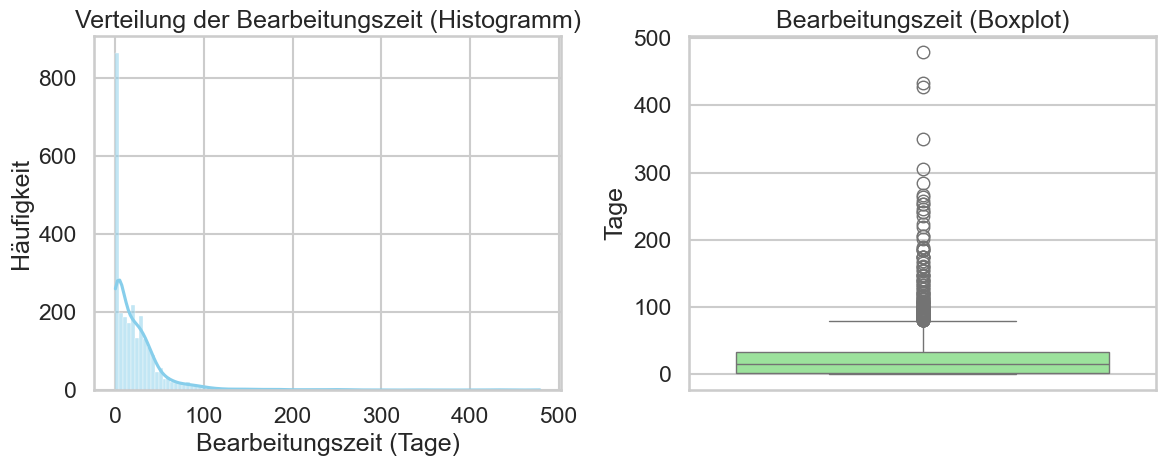

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1) Verteilung der Bearbeitungszeit
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(data=data, x="Bearbeitungszeit", kde=True, color="skyblue")
plt.title("Verteilung der Bearbeitungszeit (Histogramm)")
plt.xlabel("Bearbeitungszeit (Tage)")
plt.ylabel("Häufigkeit")

plt.subplot(1, 2, 2)
sns.boxplot(data=data, y="Bearbeitungszeit", color="lightgreen")
plt.title("Bearbeitungszeit (Boxplot)")
plt.ylabel("Tage")

plt.tight_layout()
plt.show()


C:\Users\Eugen Lieder\AppData\Local\Temp\ipykernel_38436\1025406118.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Termintreue", data=data, palette="Set2")


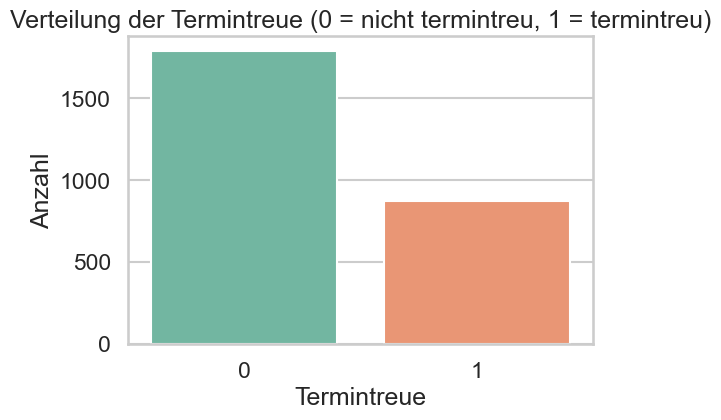

In [45]:
plt.figure(figsize=(6, 4))
sns.countplot(x="Termintreue", data=data, palette="Set2")
plt.title("Verteilung der Termintreue (0 = nicht termintreu, 1 = termintreu)")
plt.xlabel("Termintreue")
plt.ylabel("Anzahl")
plt.show()


C:\Users\Eugen Lieder\AppData\Local\Temp\ipykernel_38436\3948167973.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(rmse_values.keys()), y=list(rmse_values.values()), palette="Blues")


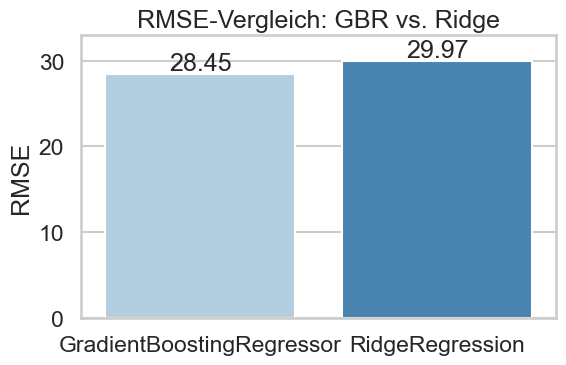

In [46]:
rmse_values = {
    "GradientBoostingRegressor": rmse_gbr,
    "RidgeRegression": rmse_ridge
}

plt.figure(figsize=(6, 4))
sns.barplot(x=list(rmse_values.keys()), y=list(rmse_values.values()), palette="Blues")
plt.title("RMSE-Vergleich: GBR vs. Ridge")
plt.ylabel("RMSE")
plt.ylim(0, max(list(rmse_values.values())) * 1.1)

for i, v in enumerate(list(rmse_values.values())):
    plt.text(i, v + 0.5, f"{v:.2f}", ha='center')

plt.tight_layout()
plt.show()


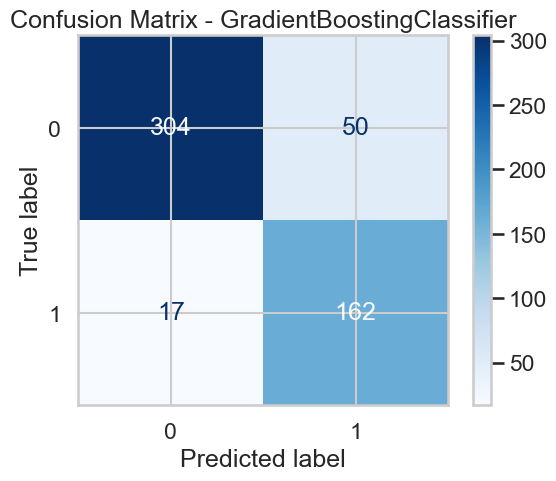

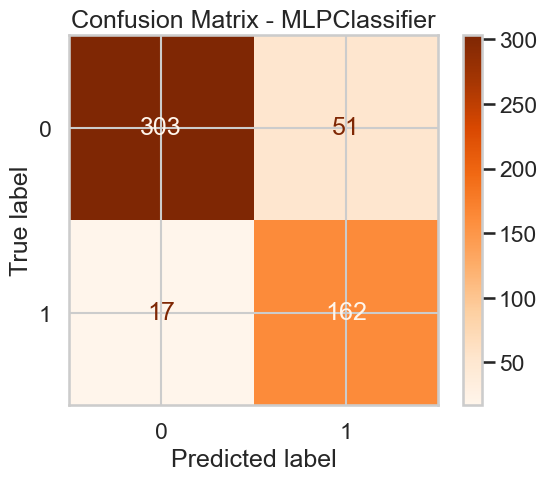

In [47]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 4) Confusion Matrix für GBC
cm_gbc = confusion_matrix(y_test_t, y_pred_term)
disp_gbc = ConfusionMatrixDisplay(confusion_matrix=cm_gbc, display_labels=[0, 1])
disp_gbc.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - GradientBoostingClassifier")
plt.show()

# 4b) Confusion Matrix für MLP
cm_mlp = confusion_matrix(y_test_t, y_pred_mlp)
disp_mlp = ConfusionMatrixDisplay(confusion_matrix=cm_mlp, display_labels=[0, 1])
disp_mlp.plot(cmap=plt.cm.Oranges)
plt.title("Confusion Matrix - MLPClassifier")
plt.show()


C:\Users\Eugen Lieder\AppData\Local\Temp\ipykernel_38436\618674498.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=feature_names, palette="viridis")


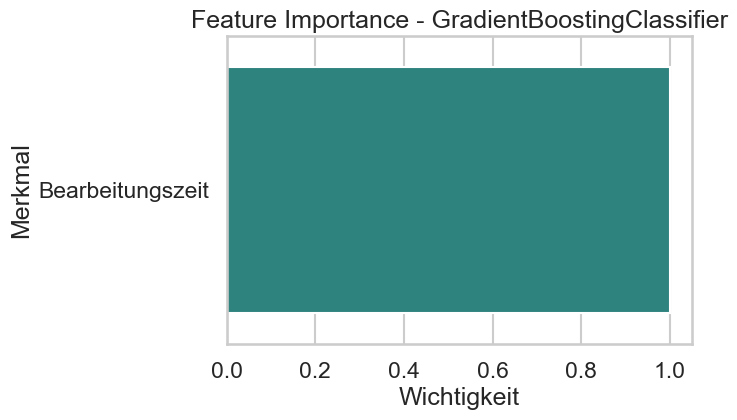

In [48]:
# Beispielhaft, wenn Sie in features_termintreue noch mehrere Spalten nutzen würden
if hasattr(best_gbc, "feature_importances_"):
    importances = best_gbc.feature_importances_
    feature_names = features_termintreue  # Falls Sie mehrere Features haben

    plt.figure(figsize=(6, 4))
    sns.barplot(x=importances, y=feature_names, palette="viridis")
    plt.title("Feature Importance - GradientBoostingClassifier")
    plt.xlabel("Wichtigkeit")
    plt.ylabel("Merkmal")
    plt.show()
else:
    print("Feature Importances sind für dieses Modell nicht verfügbar oder es wurde nur 1 Feature verwendet.")


C:\Users\MH\AppData\Local\Temp\ipykernel_35788\3208712813.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_new_term_pred, palette="coolwarm")


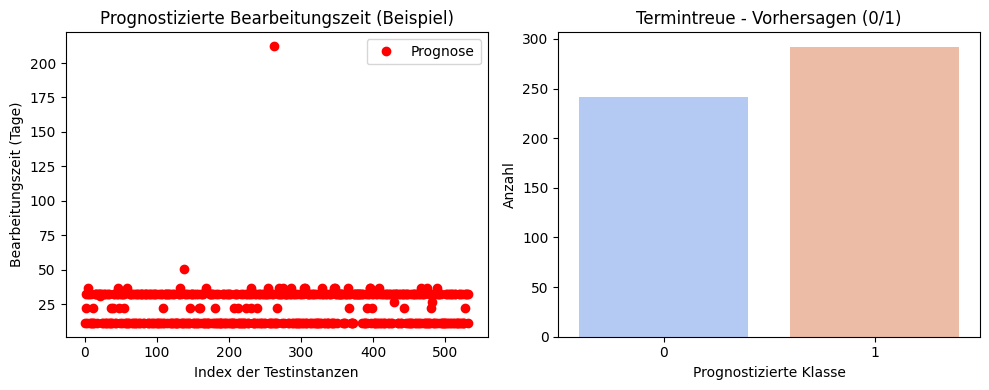

In [ ]:
# y_new_bearb_pred sind die vorhergesagten Bearbeitungszeiten
# y_new_term_pred sind die daraus abgeleiteten Termintreue-Klassen

plt.figure(figsize=(10, 4))

# (a) Scatter Plot: index vs. Bearbeitungszeit-Prognose
plt.subplot(1, 2, 1)
plt.plot(range(len(y_new_bearb_pred)), y_new_bearb_pred, 'ro', label='Prognose')
plt.title("Prognostizierte Bearbeitungszeit (Beispiel)")
plt.xlabel("Index der Testinstanzen")
plt.ylabel("Bearbeitungszeit (Tage)")
plt.legend()

# (b) Balkendiagramm: Termintreue Prognose
plt.subplot(1, 2, 2)
sns.countplot(x=y_new_term_pred, palette="coolwarm")
plt.title("Termintreue - Vorhersagen (0/1)")
plt.xlabel("Prognostizierte Klasse")
plt.ylabel("Anzahl")

plt.tight_layout()
plt.show()



=== 0) DATEN LADEN ===
Datensatz eingelesen: 8982 Zeilen, 25 Spalten.

=== 1) FILTERN NACH AUSFÜHRENDEABTEILUNGID ===
Filter auf AusführendeAbteilungID = 345
Nach Filter: 2899 Zeilen, 25 Spalten.

=== 2) DATENBEREINIGUNG / -VORBEREITUNG ===
Fehlende Werte entfernt: 234 Zeilen gelöscht.
Aktuelle Datenmenge: 2665 Zeilen, 25 Spalten.

=== 3) ERSTE STUFE (REGRESSION) -> BEARBEITUNGSZEIT ===
Trainingsset-Größe (Regression): 2132 | Testset-Größe: 533

--- 3a) GradientBoostingRegressor ---
GBR - Beste Parameter: {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
GBR - RMSE (Testset): 28.45

--- 3b) Ridge Regression ---
Ridge - Beste Parameter: {'alpha': 10.0}
Ridge - RMSE (Testset): 29.97

=== 4) ZWEITE STUFE (KLASSIFIKATION) -> TERMINTREUE ===
Trainingsset-Größe (Klassifikation): 2132 | Testset-Größe: 533

--- 4a) GradientBoostingClassifier ---
GBC - Beste Parameter: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 1, 'min_s

C:\Users\Eugen Lieder\AppData\Local\Temp\ipykernel_38436\4002639445.py:245: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_new_term_pred, palette="coolwarm")


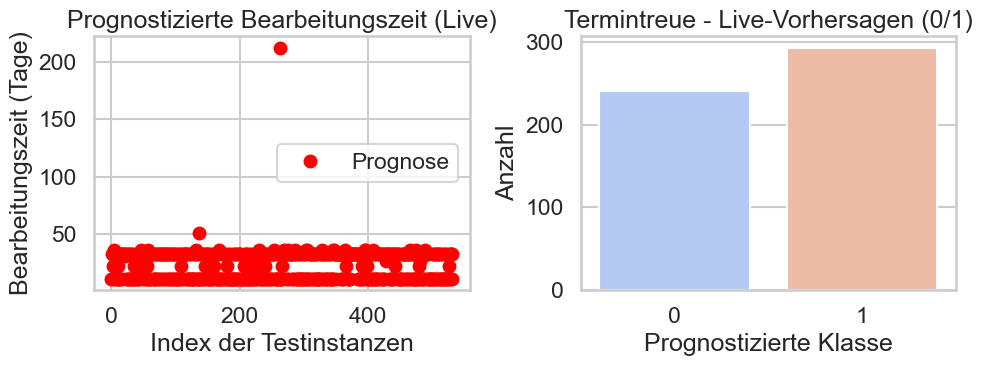

In [49]:
import pandas as pd
import numpy as np

# Neu hinzugefügt: Plot-Bibliotheken
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Ridge

# ------------------------------------------------------------
# 0) Datensatz laden
# ------------------------------------------------------------
print("\n=== 0) DATEN LADEN ===")
file_path = r"D:\CLOUD\MCS-Alles\SABI\Aufträge2.csv"  # <-- anpassen
data = pd.read_csv(file_path, sep=";")
print(f"Datensatz eingelesen: {data.shape[0]} Zeilen, {data.shape[1]} Spalten.")

# ------------------------------------------------------------
# 1) Filtern nach AusführendeAbteilungID
# ------------------------------------------------------------
print("\n=== 1) FILTERN NACH AUSFÜHRENDEABTEILUNGID ===")
selected_abteilung_id = 345  # Beispielwert
print(f"Filter auf AusführendeAbteilungID = {selected_abteilung_id}")
if "AusführendeAbteilungID" not in data.columns:
    raise ValueError("Spalte 'AusführendeAbteilungID' nicht vorhanden!")

data = data[data["AusführendeAbteilungID"] == selected_abteilung_id]
if data.empty:
    raise ValueError(f"Keine Daten für AusführendeAbteilungID = {selected_abteilung_id} vorhanden!")
print(f"Nach Filter: {data.shape[0]} Zeilen, {data.shape[1]} Spalten.")

# ------------------------------------------------------------
# 2) Datenbereinigung / -Vorbereitung
# ------------------------------------------------------------
print("\n=== 2) DATENBEREINIGUNG / -VORBEREITUNG ===")
# Beispielhafte Konvertierungen
if "MarktsegmentID" in data.columns:
    data['MarktsegmentID'] = pd.to_numeric(data['MarktsegmentID'], errors='coerce')
if "AnzahlSchichten" in data.columns:
    data['AnzahlSchichten'] = pd.to_numeric(data['AnzahlSchichten'], errors='coerce')

# Termintreue (Ja/Nein) in 0/1 kodieren
if "Termintreue" not in data.columns:
    raise ValueError("Spalte 'Termintreue' nicht vorhanden!")
data['Termintreue'] = data['Termintreue'].apply(
    lambda x: 1 if str(x).strip().lower() == 'ja' else 0
)

# Zeilen mit fehlenden Werten entfernen
before_drop = data.shape[0]
data = data.dropna()
after_drop = data.shape[0]
print(f"Fehlende Werte entfernt: {before_drop - after_drop} Zeilen gelöscht.")
print(f"Aktuelle Datenmenge: {after_drop} Zeilen, {data.shape[1]} Spalten.")

# ------------------------------------------------------------
# 3) Erste Stufe: Bearbeitungszeit vorhersagen (Regression)
# ------------------------------------------------------------
print("\n=== 3) ERSTE STUFE (REGRESSION) -> BEARBEITUNGSZEIT ===")

# Relevante Spalten (anpassen, wenn deine Spalten anders heißen)
features_bearb = ["VerwendungID", "WiederholauftragJa/Nein", "AuftragsgrundID"]
target_bearb = "Bearbeitungszeit"

# Check, ob Spalte vorhanden ist
if target_bearb not in data.columns:
    raise ValueError(f"Spalte '{target_bearb}' nicht im Datensatz gefunden!")

X_bearb = data[features_bearb]
y_bearb = data[target_bearb]

# Train-Test-Split
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(
    X_bearb, y_bearb, test_size=0.2, random_state=42
)
print(f"Trainingsset-Größe (Regression): {X_train_b.shape[0]} | Testset-Größe: {X_test_b.shape[0]}")

# 3a) GradientBoostingRegressor mit erweiterter Parameter-Suche
print("\n--- 3a) GradientBoostingRegressor ---")
gbr = GradientBoostingRegressor(random_state=42)
param_grid_gbr = {
    "learning_rate": [0.001, 0.01, 0.1],
    "n_estimators": [50, 100, 200, 300],
    "max_depth": [3, 5, 7],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2]
}
grid_search_gbr = GridSearchCV(
    estimator=gbr,
    param_grid=param_grid_gbr,
    cv=3,
    scoring="neg_mean_squared_error",
    n_jobs=-1
)
grid_search_gbr.fit(X_train_b, y_train_b)

best_gbr = grid_search_gbr.best_estimator_
y_pred_b = best_gbr.predict(X_test_b)

mse_gbr = mean_squared_error(y_test_b, y_pred_b)
rmse_gbr = np.sqrt(mse_gbr)

print("GBR - Beste Parameter:", grid_search_gbr.best_params_)
print(f"GBR - RMSE (Testset): {rmse_gbr:.2f}")

# 3b) Ridge (Vergleichsmodell)
print("\n--- 3b) Ridge Regression ---")
ridge = Ridge()
param_grid_ridge = {
    "alpha": [0.1, 1.0, 10.0, 50.0]
}
grid_search_ridge = GridSearchCV(
    estimator=ridge,
    param_grid=param_grid_ridge,
    cv=3,
    scoring="neg_mean_squared_error",
    n_jobs=-1
)
grid_search_ridge.fit(X_train_b, y_train_b)

best_ridge = grid_search_ridge.best_estimator_
y_pred_ridge = best_ridge.predict(X_test_b)
mse_ridge = mean_squared_error(y_test_b, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)

print("Ridge - Beste Parameter:", grid_search_ridge.best_params_)
print(f"Ridge - RMSE (Testset): {rmse_ridge:.2f}")

# ------------------------------------------------------------
# 4) Zweite Stufe: Termintreue vorhersagen (Klassifikation)
# ------------------------------------------------------------
print("\n=== 4) ZWEITE STUFE (KLASSIFIKATION) -> TERMINTREUE ===")

features_termintreue = ["Bearbeitungszeit"]  # hier nur die Spalte Bearbeitungszeit
target_termintreue = "Termintreue"

X_term = data[features_termintreue]
y_term = data[target_termintreue]

X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(
    X_term, y_term, test_size=0.2, random_state=42
)
print(f"Trainingsset-Größe (Klassifikation): {X_train_t.shape[0]} | Testset-Größe: {X_test_t.shape[0]}")

# 4a) GradientBoostingClassifier
print("\n--- 4a) GradientBoostingClassifier ---")
gbc = GradientBoostingClassifier(random_state=42)
param_grid_gbc = {
    "learning_rate": [0.001, 0.01, 0.1],
    "n_estimators": [50, 100, 200, 300],
    "max_depth": [3, 5, 7],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2]
}
grid_search_gbc = GridSearchCV(
    estimator=gbc,
    param_grid=param_grid_gbc,
    cv=3,
    scoring="accuracy",
    n_jobs=-1
)
grid_search_gbc.fit(X_train_t, y_train_t)

best_gbc = grid_search_gbc.best_estimator_
y_pred_term = best_gbc.predict(X_test_t)
acc_gbc = accuracy_score(y_test_t, y_pred_term)

print("GBC - Beste Parameter:", grid_search_gbc.best_params_)
print(f"GBC - Accuracy (Testset): {acc_gbc:.3f}")
print("GBC - Classification Report:")
print(classification_report(y_test_t, y_pred_term))

# 4b) MLPClassifier
print("\n--- 4b) MLPClassifier ---")
mlp = MLPClassifier(random_state=42, max_iter=300)
param_grid_mlp = {
    "hidden_layer_sizes": [(100,), (100, 50), (50, 50, 50)],
    "activation": ["relu", "tanh"],
    "solver": ["adam"],
    "alpha": [0.0001, 0.001, 0.01]
}
grid_search_mlp = GridSearchCV(
    estimator=mlp,
    param_grid=param_grid_mlp,
    cv=3,
    scoring="accuracy",
    n_jobs=-1
)
grid_search_mlp.fit(X_train_t, y_train_t)

best_mlp = grid_search_mlp.best_estimator_
y_pred_mlp = best_mlp.predict(X_test_t)
acc_mlp = accuracy_score(y_test_t, y_pred_mlp)

print("MLP - Beste Parameter:", grid_search_mlp.best_params_)
print(f"MLP - Accuracy (Testset): {acc_mlp:.3f}")
print("MLP - Classification Report:")
print(classification_report(y_test_t, y_pred_mlp))

# ------------------------------------------------------------
# 5) Beispielhafter "Live"-UseCase
# ------------------------------------------------------------
print("\n=== 5) 'LIVE'-VORHERSAGE ===")
print("1) Zuerst Bearbeitungszeit prognostizieren (bestes GBR)")
print("2) Dann Termintreue vorhersagen (bestes GBC)")

# Nehmen wir hier testweise X_test_b als „neue Daten“
X_new_bearb = X_test_b.copy()
y_new_bearb_pred = best_gbr.predict(X_new_bearb)  # Prognostizierte Bearbeitungszeit

# Jetzt die vorhergesagte Bearbeitungszeit ins Klassifikationsmodell
X_new_term = pd.DataFrame({"Bearbeitungszeit": y_new_bearb_pred})
y_new_term_pred = best_gbc.predict(X_new_term)

print("\nErste 10 'Live'-Vorhersagen der Termintreue:")
print(y_new_term_pred[:30])

# Optionaler Vergleich mit wahren Werten (sofern Index und Anzahl übereinstimmen)
if len(y_test_t) >= 30:
    print("\nWahre Termintreue der ersten 10 Testinstanzen:")
    print(y_test_t[:30].values)

print("\n=== Skript Ende ===")

# ------------------------------------------------------------
# 6) Darstellung der "Live"-Vorhersagen (Plots)
# ------------------------------------------------------------
print("\n=== 6) DARSTELLUNG DER 'LIVE'-VORHERSAGEN ===")
plt.figure(figsize=(10, 4))

# (a) Streudiagramm der prognostizierten Bearbeitungszeiten
plt.subplot(1, 2, 1)
plt.plot(range(len(y_new_bearb_pred)), y_new_bearb_pred, 'ro', label='Prognose')
plt.title("Prognostizierte Bearbeitungszeit (Live)")
plt.xlabel("Index der Testinstanzen")
plt.ylabel("Bearbeitungszeit (Tage)")
plt.legend()

# (b) Balkendiagramm der termintreuen / nicht termintreuen Vorhersagen
plt.subplot(1, 2, 2)
sns.countplot(x=y_new_term_pred, palette="coolwarm")
plt.title("Termintreue - Live-Vorhersagen (0/1)")
plt.xlabel("Prognostizierte Klasse")
plt.ylabel("Anzahl")

plt.tight_layout()
plt.show()



=== 0) DATEN LADEN ===
Datensatz eingelesen: 8982 Zeilen, 25 Spalten.

=== 1) FILTERN NACH AUSFÜHRENDEABTEILUNGID ===
Filter auf AusführendeAbteilungID = 345
Nach Filter: 2899 Zeilen, 25 Spalten.

=== 2) DATENBEREINIGUNG / -VORBEREITUNG ===
Fehlende Werte entfernt: 234 Zeilen gelöscht.
Aktuelle Datenmenge: 2665 Zeilen, 25 Spalten.

=== 3) ERSTE STUFE (REGRESSION) -> BEARBEITUNGSZEIT ===
Trainingsset-Größe (Regression): 2132 | Testset-Größe: 533

--- 3a) GradientBoostingRegressor ---
GBR - Beste Parameter: {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
GBR - RMSE (Testset): 31.62

--- 3b) Ridge Regression ---
Ridge - Beste Parameter: {'alpha': 10.0}
Ridge - RMSE (Testset): 32.58

=== 4) ZWEITE STUFE (KLASSIFIKATION) -> TERMINTREUE ===
Trainingsset-Größe (Klassifikation): 2132 | Testset-Größe: 533

--- 4a) GradientBoostingClassifier ---
GBC - Beste Parameter: {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_leaf': 1, 'min_

C:\Users\MH\AppData\Local\Temp\ipykernel_35788\1446152903.py:247: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=feature_names, palette="viridis")


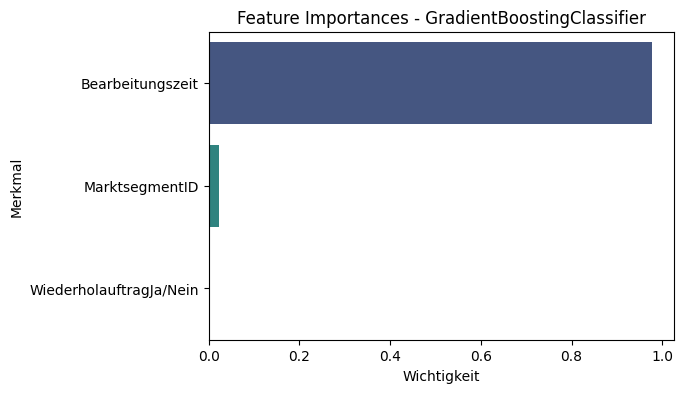


=== Skript Ende ===


In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Ridge

import matplotlib.pyplot as plt
import seaborn as sns

# ------------------------------------------------------------
# 0) Datensatz laden
# ------------------------------------------------------------
print("\n=== 0) DATEN LADEN ===")
file_path = r"D:\CLOUD\MCS-Alles\SABI\Aufträge2.csv"  # <-- anpassen
data = pd.read_csv(file_path, sep=";")
print(f"Datensatz eingelesen: {data.shape[0]} Zeilen, {data.shape[1]} Spalten.")

# ------------------------------------------------------------
# 1) Filtern nach AusführendeAbteilungID
# ------------------------------------------------------------
print("\n=== 1) FILTERN NACH AUSFÜHRENDEABTEILUNGID ===")
selected_abteilung_id = 345  # Beispielwert
print(f"Filter auf AusführendeAbteilungID = {selected_abteilung_id}")
if "AusführendeAbteilungID" not in data.columns:
    raise ValueError("Spalte 'AusführendeAbteilungID' nicht vorhanden!")

data = data[data["AusführendeAbteilungID"] == selected_abteilung_id]
if data.empty:
    raise ValueError(f"Keine Daten für AusführendeAbteilungID = {selected_abteilung_id} vorhanden!")
print(f"Nach Filter: {data.shape[0]} Zeilen, {data.shape[1]} Spalten.")

# ------------------------------------------------------------
# 2) Datenbereinigung / -Vorbereitung
# ------------------------------------------------------------
print("\n=== 2) DATENBEREINIGUNG / -VORBEREITUNG ===")
# Beispielhafte Konvertierungen
if "MarktsegmentID" in data.columns:
    data['MarktsegmentID'] = pd.to_numeric(data['MarktsegmentID'], errors='coerce')
if "AnzahlSchichten" in data.columns:
    data['AnzahlSchichten'] = pd.to_numeric(data['AnzahlSchichten'], errors='coerce')
if "WiederholauftragJa/Nein" in data.columns:
    # Falls "WiederholauftragJa/Nein" noch nicht numerisch ist, konvertieren wir es:
    # Annahme: "Ja" -> 1, "Nein" -> 0
    data['WiederholauftragJa/Nein'] = data['WiederholauftragJa/Nein'].apply(
        lambda x: 1 if str(x).strip().lower() == 'ja' else 0
    )

# Termintreue (Ja/Nein) in 0/1 kodieren
if "Termintreue" not in data.columns:
    raise ValueError("Spalte 'Termintreue' nicht vorhanden!")
data['Termintreue'] = data['Termintreue'].apply(
    lambda x: 1 if str(x).strip().lower() == 'ja' else 0
)

# Zeilen mit fehlenden Werten entfernen
before_drop = data.shape[0]
data = data.dropna()
after_drop = data.shape[0]
print(f"Fehlende Werte entfernt: {before_drop - after_drop} Zeilen gelöscht.")
print(f"Aktuelle Datenmenge: {after_drop} Zeilen, {data.shape[1]} Spalten.")

# ------------------------------------------------------------
# 3) Erste Stufe: Bearbeitungszeit (Regression)
# ------------------------------------------------------------
print("\n=== 3) ERSTE STUFE (REGRESSION) -> BEARBEITUNGSZEIT ===")

features_bearb = ["VerwendungID", "WiederholauftragJa/Nein", "AuftragsgrundID"]
target_bearb = "Bearbeitungszeit"

if target_bearb not in data.columns:
    raise ValueError(f"Spalte '{target_bearb}' nicht im Datensatz gefunden!")

X_bearb = data[features_bearb]
y_bearb = data[target_bearb]

X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(
    X_bearb, y_bearb, test_size=0.2, random_state=42
)
print(f"Trainingsset-Größe (Regression): {X_train_b.shape[0]} | Testset-Größe: {X_test_b.shape[0]}")

print("\n--- 3a) GradientBoostingRegressor ---")
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(random_state=42)
param_grid_gbr = {
    "learning_rate": [0.001, 0.01, 0.1],
    "n_estimators": [50, 100, 200, 300],
    "max_depth": [3, 5, 7],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2]
}
grid_search_gbr = GridSearchCV(
    estimator=gbr,
    param_grid=param_grid_gbr,
    cv=3,
    scoring="neg_mean_squared_error",
    n_jobs=-1
)
grid_search_gbr.fit(X_train_b, y_train_b)
best_gbr = grid_search_gbr.best_estimator_

y_pred_b = best_gbr.predict(X_test_b)
mse_gbr = mean_squared_error(y_test_b, y_pred_b)
rmse_gbr = np.sqrt(mse_gbr)
print("GBR - Beste Parameter:", grid_search_gbr.best_params_)
print(f"GBR - RMSE (Testset): {rmse_gbr:.2f}")

print("\n--- 3b) Ridge Regression ---")
from sklearn.linear_model import Ridge
ridge = Ridge()
param_grid_ridge = {
    "alpha": [0.1, 1.0, 10.0, 50.0]
}
grid_search_ridge = GridSearchCV(
    estimator=ridge,
    param_grid=param_grid_ridge,
    cv=3,
    scoring="neg_mean_squared_error",
    n_jobs=-1
)
grid_search_ridge.fit(X_train_b, y_train_b)
best_ridge = grid_search_ridge.best_estimator_
y_pred_ridge = best_ridge.predict(X_test_b)
mse_ridge = mean_squared_error(y_test_b, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
print("Ridge - Beste Parameter:", grid_search_ridge.best_params_)
print(f"Ridge - RMSE (Testset): {rmse_ridge:.2f}")

# ------------------------------------------------------------
# 4) Zweite Stufe: Termintreue (Klassifikation)
# ------------------------------------------------------------
print("\n=== 4) ZWEITE STUFE (KLASSIFIKATION) -> TERMINTREUE ===")

# ------------------------------------------------------------
# NEU: Wir verwenden mehr Features als nur 'Bearbeitungszeit'.
# Beispielhaft: 'MarktsegmentID' und 'WiederholauftragJa/Nein' zusätzlich.
# Achten Sie darauf, dass diese Spalten existieren und korrekt kodiert sind!
# ------------------------------------------------------------
features_termintreue = [
    "Bearbeitungszeit", 
    "MarktsegmentID", 
    "WiederholauftragJa/Nein"
]

target_termintreue = "Termintreue"

# Wir setzen hier voraus, dass all diese Spalten existieren und numerisch sind:
missing_cols = [col for col in features_termintreue if col not in data.columns]
if missing_cols:
    raise ValueError(f"Folgende Spalten fehlen in den Daten: {missing_cols}")

X_term = data[features_termintreue]
y_term = data[target_termintreue]

X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(
    X_term, y_term, test_size=0.2, random_state=42
)
print(f"Trainingsset-Größe (Klassifikation): {X_train_t.shape[0]} | Testset-Größe: {X_test_t.shape[0]}")

print("\n--- 4a) GradientBoostingClassifier ---")
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(random_state=42)
param_grid_gbc = {
    "learning_rate": [0.001, 0.01, 0.1],
    "n_estimators": [50, 100, 200, 300],
    "max_depth": [3, 5, 7],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2]
}
grid_search_gbc = GridSearchCV(
    estimator=gbc,
    param_grid=param_grid_gbc,
    cv=3,
    scoring="accuracy",
    n_jobs=-1
)
grid_search_gbc.fit(X_train_t, y_train_t)

best_gbc = grid_search_gbc.best_estimator_
y_pred_term = best_gbc.predict(X_test_t)
acc_gbc = accuracy_score(y_test_t, y_pred_term)

print("GBC - Beste Parameter:", grid_search_gbc.best_params_)
print(f"GBC - Accuracy (Testset): {acc_gbc:.3f}")
print("GBC - Classification Report:")
print(classification_report(y_test_t, y_pred_term))

print("\n--- 4b) MLPClassifier ---")
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state=42, max_iter=300)
param_grid_mlp = {
    "hidden_layer_sizes": [(100,), (100, 50), (50, 50, 50)],
    "activation": ["relu", "tanh"],
    "solver": ["adam"],
    "alpha": [0.0001, 0.001, 0.01]
}
grid_search_mlp = GridSearchCV(
    estimator=mlp,
    param_grid=param_grid_mlp,
    cv=3,
    scoring="accuracy",
    n_jobs=-1
)
grid_search_mlp.fit(X_train_t, y_train_t)

best_mlp = grid_search_mlp.best_estimator_
y_pred_mlp = best_mlp.predict(X_test_t)
acc_mlp = accuracy_score(y_test_t, y_pred_mlp)

print("MLP - Beste Parameter:", grid_search_mlp.best_params_)
print(f"MLP - Accuracy (Testset): {acc_mlp:.3f}")
print("MLP - Classification Report:")
print(classification_report(y_test_t, y_pred_mlp))

# ------------------------------------------------------------
# 5) "Live"-Vorhersage
# ------------------------------------------------------------
print("\n=== 5) 'LIVE'-VORHERSAGE ===")

# (a) Prognose der Bearbeitungszeit mit best_gbr
X_new_bearb = X_test_b.copy()  # hier nutzen wir denselben Testsplit wie oben
y_new_bearb_pred = best_gbr.predict(X_new_bearb)

# (b) Klassifikation (Termintreue)
# Wir legen fest, dass wir die 'Bearbeitungszeit' durch die neu prognostizierte ersetzen
# und die anderen Features wie 'MarktsegmentID' und 'WiederholauftragJa/Nein' aus X_test_t nehmen.
X_new_term = X_test_t.copy()
X_new_term["Bearbeitungszeit"] = y_new_bearb_pred  # Überschreibt die "echte" Bearbeitungszeit mit der Prognose

y_new_term_pred = best_gbc.predict(X_new_term)
print("\nErste 10 'Live'-Vorhersagen der Termintreue:", y_new_term_pred[:10])

# Optionaler Vergleich
if len(y_test_t) >= 10:
    print("Wahre Termintreue der ersten 10 Testinstanzen:", y_test_t[:10].values)

# ------------------------------------------------------------
# NEU: 6) Feature Importances Plot (GradientBoostingClassifier)
# ------------------------------------------------------------
print("\n=== 6) FEATURE-IMPORTANCES (GBC) ===")
if hasattr(best_gbc, "feature_importances_"):
    importances = best_gbc.feature_importances_
    feature_names = features_termintreue  # Unser erweiterter Feature-Array
    plt.figure(figsize=(6, 4))
    sns.barplot(x=importances, y=feature_names, palette="viridis")
    plt.title("Feature Importances - GradientBoostingClassifier")
    plt.xlabel("Wichtigkeit")
    plt.ylabel("Merkmal")
    plt.show()
else:
    print("Feature Importances sind für dieses Modell nicht verfügbar.")

print("\n=== Skript Ende ===")


C:\Users\MH\AppData\Local\Temp\ipykernel_35788\192332383.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=feature_names, palette="coolwarm")


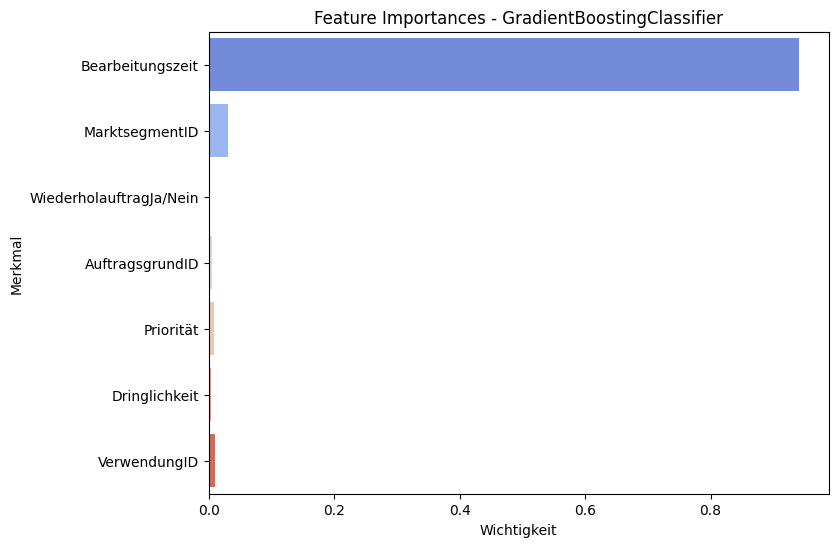

In [ ]:
# Neue Features einbinden
features_termintreue = [
    "Bearbeitungszeit", 
    "MarktsegmentID", 
    "WiederholauftragJa/Nein",
    "AuftragsgrundID", 
    "Priorität", 
    "Dringlichkeit",
    "VerwendungID"
]

# Überprüfen, ob alle neuen Features existieren
missing_cols = [col for col in features_termintreue if col not in data.columns]
if missing_cols:
    raise ValueError(f"Folgende Spalten fehlen in den Daten: {missing_cols}")

# Daten vorbereiten
X_term = data[features_termintreue]
y_term = data[target_termintreue]

X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(
    X_term, y_term, test_size=0.2, random_state=42
)

# Modelltraining bleibt gleich
grid_search_gbc.fit(X_train_t, y_train_t)
best_gbc = grid_search_gbc.best_estimator_

# Feature-Importance-Plot aktualisieren
if hasattr(best_gbc, "feature_importances_"):
    importances = best_gbc.feature_importances_
    feature_names = features_termintreue
    plt.figure(figsize=(8, 6))
    sns.barplot(x=importances, y=feature_names, palette="coolwarm")
    plt.title("Feature Importances - GradientBoostingClassifier")
    plt.xlabel("Wichtigkeit")
    plt.ylabel("Merkmal")
    plt.show()
else:
    print("Feature Importances sind für dieses Modell nicht verfügbar.")


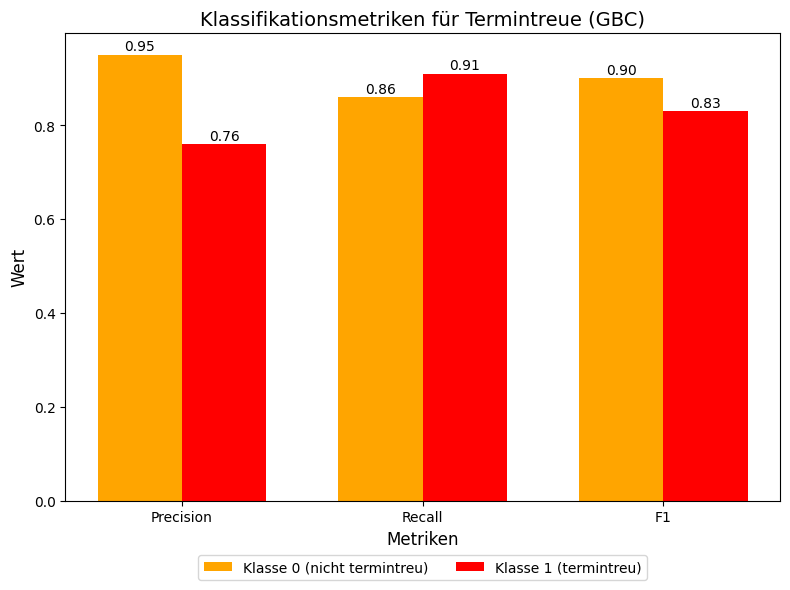

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Daten für den Balkenplot
metrics = ['Precision', 'Recall', 'F1']
klasse_0 = [0.95, 0.86, 0.90]  # Werte für Klasse 0 (nicht termintreu)
klasse_1 = [0.76, 0.91, 0.83]  # Werte für Klasse 1 (termintreu)

# Positionen der Balken auf der x-Achse
x = np.arange(len(metrics))

# Breite der Balken
width = 0.35

# Plot erstellen
fig, ax = plt.subplots(figsize=(8, 6))
bars_0 = ax.bar(x - width/2, klasse_0, width, label='Klasse 0 (nicht termintreu)', color='orange')
bars_1 = ax.bar(x + width/2, klasse_1, width, label='Klasse 1 (termintreu)', color='red')

# Titel und Achsenbeschriftungen
ax.set_title('Klassifikationsmetriken für Termintreue (GBC)', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.set_xlabel('Metriken', fontsize=12)
ax.set_ylabel('Wert', fontsize=12)

# Legende außerhalb des Plots platzieren
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2, fontsize=10)

# Werte oberhalb der Balken anzeigen
for bars in [bars_0, bars_1]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', fontsize=10)

# Layout anpassen
plt.tight_layout()
plt.show()


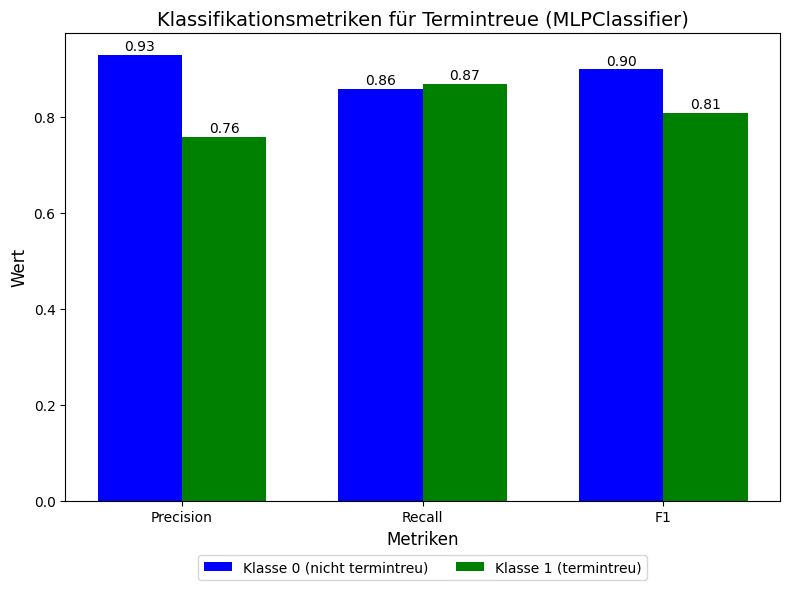

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Daten für den Balkenplot
metrics = ['Precision', 'Recall', 'F1']
klasse_0 = [0.93, 0.86, 0.90]  # Werte für Klasse 0 (nicht termintreu)
klasse_1 = [0.76, 0.87, 0.81]  # Werte für Klasse 1 (termintreu)

# Positionen der Balken auf der x-Achse
x = np.arange(len(metrics))

# Breite der Balken
width = 0.35

# Plot erstellen
fig, ax = plt.subplots(figsize=(8, 6))
bars_0 = ax.bar(x - width/2, klasse_0, width, label='Klasse 0 (nicht termintreu)', color='blue')
bars_1 = ax.bar(x + width/2, klasse_1, width, label='Klasse 1 (termintreu)', color='green')

# Titel und Achsenbeschriftungen
ax.set_title('Klassifikationsmetriken für Termintreue (MLPClassifier)', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.set_xlabel('Metriken', fontsize=12)
ax.set_ylabel('Wert', fontsize=12)

# Legende außerhalb des Plots platzieren
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2, fontsize=10)

# Werte oberhalb der Balken anzeigen
for bars in [bars_0, bars_1]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', fontsize=10)

# Layout anpassen
plt.tight_layout()
plt.show()
